# Original Code

In [1]:
# import tkinter as tk
# import random
# import math
# import time

# class Bird:
#     def __init__(self,name):
#         self.x = random.randrange(100,900)
#         self.y = random.randrange(100,900)
#         self.angle = random.uniform(0.0,2.0*math.pi)
#         self.name = name
#         self.color = "blue"

#     def draw(self,canvas):
#         size = 10
#         baseSize = 5
#         point1 = [self.x + size*math.cos(self.angle), self.y + size*math.sin(self.angle)]
#         point2 = [self.x - size*math.cos(self.angle) + baseSize*math.cos(self.angle+math.pi/2.0), \
#                   self.y - size*math.sin(self.angle) + baseSize*math.sin(self.angle+math.pi/2.0) ]
#         point3 = [self.x - size*math.cos(self.angle) - baseSize*math.cos(self.angle+math.pi/2.0), \
#                   self.y - size*math.sin(self.angle) - baseSize*math.sin(self.angle+math.pi/2.0) ]
#         canvas.create_polygon(point1+point2+point3,fill=self.color,tags=self.name)

#     def move(self,canvas):
#         distance = 5
#         self.x += distance*math.cos(self.angle)
#         self.y += distance*math.sin(self.angle)
#         self.x = self.x%1000.0
#         self.y = self.y%1000.0
#         canvas.delete(self.name)
#         self.draw(canvas)

#     def distance(self,otherBird):
#         return math.sqrt( (self.x-otherBird.x)*(self.x-otherBird.x) + \
#                           (self.y-otherBird.y)*(self.y-otherBird.y) )

# def initialise(window):
#     window.resizable(False,False)
#     canvas = tk.Canvas(window,width=1000,height=1000)
#     canvas.pack()
#     return canvas

# def addBirds(canvas):
#     birdList = []
#     noOfBirds = 50
#     for n in range(noOfBirds):
#         bird = Bird("bird"+str(n))
#         birdList.append(bird)
#         bird.draw(canvas)
#     return birdList

# def moveBirds(canvas,listOfBirds):
#     #find neighbours
#     for bird in listOfBirds:
#         nearbyBirds = []
#         for otherBird in listOfBirds:
#             if bird.distance(otherBird)<100 and (not bird.distance(otherBird)==0):
#                 nearbyBirds.append(otherBird)
#         nearestBird = None
#         if nearbyBirds:
#             shortestDistance = 1000000.0
#             for otherBird in nearbyBirds:
#                 d = bird.distance(otherBird)
#                 if d < shortestDistance:
#                     shortestDistance = d
#                     nearestBird = otherBird

#         #move 1: move away from nearest
#         if nearestBird is not None and bird.distance(nearestBird)<50 :
#             if nearestBird.x-bird.x==0.0:
#                 angle = math.atan( (nearestBird.y-bird.y)/0.0001 )
#             else:
#                 angle = math.atan( (nearestBird.y-bird.y)/(nearestBird.x-bird.x) )
#             bird.angle -= angle/2.0

#         #move 2: orient towards the neighbours
#         averageAngle = 0.0
#         if nearbyBirds:
#             for nb in nearbyBirds:
#                 averageAngle += nb.angle
#             averageAngle /= len(nearbyBirds)
#             #bird.angle -= (averageAngle-bird.angle)/100.0
#             bird.angle = averageAngle

#         #move 3: move together
#         if nearbyBirds:
#             avX = 0.0
#             avY = 0.0
#             for nb in nearbyBirds:
#                 avX += nb.x
#                 avY += nb.y
#             avX /= len(nearbyBirds)
#             avY /= len(nearbyBirds)
#             if avX-bird.x==0.0:
#                 angle = math.atan( (avY-bird.y)/0.0001 )
#             else:
#                 angle = math.atan( (avY-bird.y)/(avX-bird.x) )
#             bird.angle -= angle/20.0
            
#     for bird in listOfBirds:
#         bird.move(canvas)
#     canvas.after(100,moveBirds,canvas,listOfBirds)
        
# def main():
#     window = tk.Tk()
#     canvas = initialise(window)
#     birdList = addBirds(canvas)
#     moveBirds(canvas,birdList)
#     window.mainloop()

# main()


# My Code
## Boid Class (33% custom)

* Changed size (trivial)
* Modified distance calculation so it takes into account the fact they loop around the window
* Custom method for checking if the distance given is looped or not
* Custom method for killing the fish
* Made optional to give a start x, y, and angle, for giving birth

In [2]:
import numpy as np
import random
import tkinter as tk
import random
import math
import time
from treelib import Node, Tree
import matplotlib.pyplot as plt
import os 
import pickle
import pandas as pd
import seaborn as sns
from matplotlib.patches import Rectangle
from scipy.stats import ttest_ind

random.seed(32)

num_of_experiments_for_each = 100 # how many experiments for each behaviour type (swarm and solo) (total experiments = 2 * this)

In [3]:
# just used for the colour of print statements to make it easier to debug
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [4]:
class Fish:

    def __init__(self, name, x=None, y=None, angle=None):
        ######### CUSTOM MODIFIEd TO WORK WITH GIVING BIRTH #########
        if x == None:
            self.x = random.randrange(100,900)
        else:
            self.x = x
        if y == None:
            self.y = random.randrange(100,900)
        else:
            self.y = y
        if angle == None:
            self.angle = random.uniform(0.0,2.0*math.pi)
        else:
            self.angle = angle
        
        ###### END OF CUSTOM SEGMENT #######
        
        self.name = name
        self.color = "blue"
        self.size=5
        self.speed = 5
      
    ### Helper functions ###
    
    def draw(self, canvas):
        size = self.size
        baseSize = self.size/2
        point1 = [self.x + size*math.cos(self.angle), self.y + size*math.sin(self.angle)]
        point2 = [self.x - size*math.cos(self.angle) + baseSize*math.cos(self.angle+math.pi/2.0), \
                  self.y - size*math.sin(self.angle) + baseSize*math.sin(self.angle+math.pi/2.0) ]
        point3 = [self.x - size*math.cos(self.angle) - baseSize*math.cos(self.angle+math.pi/2.0), \
                  self.y - size*math.sin(self.angle) - baseSize*math.sin(self.angle+math.pi/2.0) ]
        canvas.create_polygon(point1+point2+point3,fill=self.color,tags=self.name)
        
    def move(self,canvas):
        distance = self.speed
        self.x += distance*math.cos(self.angle)
        self.y += distance*math.sin(self.angle)
#         self.x = max(0, min(self.x, 1000))
#         self.y = max(0, min(self.y, 1000))
        self.x = self.x%1000
        self.y = self.y%1000
        canvas.delete(self.name)
        self.draw(canvas)

    ### CUSTOM METHODS
    def distance(self, otherAgent):
        #distance calculated as looping around the map
        a_sqr = min(abs((self.x-otherAgent.x)),1000-abs(self.x-otherAgent.x))**2
        b_sqr = min(abs((self.y-otherAgent.y)),1000-abs(self.y-otherAgent.y))**2
        return math.sqrt(a_sqr + b_sqr)
    def distance_looped_bool(self, otherAgent):
        return (((abs(self.x-otherAgent.x))> 500) or ((abs(self.y-otherAgent.y))> 500))
    
    def killed(self, fishList,canvas):
        fishList.remove(self)
        canvas.delete(self.name)
        canvas.delete(self.name+"aversionLine")
    
    ### END OF CUSTOM METHODS

## The predator (shark) class (100% custom)

* Sharks have a perception radius which determines how close prey has to get for it to consider hunting it
    * What they can 'see'
* Sharks are driven by hunger and are always moving towards prey
* 3 types of prey a shark considers:
    1. fish: the boids agents
    2. carcass: all sharks are scavengers and if a carcass exists that it can see it'll always focus on that first regardless of the distance as it won't be able to swim away making it an easy catch
    3. smaller sharks: if a shark is 20% bigger than another shark it can eat it. Whether or not it will consider eating it will depend on how much energy it has left and it's gene determining how hungry it has to be to consider eating another shark.
    
* When targetting prey it calculates the potential difference in energy catching it pertains and chooses teh best
    * energy it will get on eating it - energy it will cost to reach it (based on speed of each and distance between)

* Sharks also have an aversion radius which determines how close a predator that's large enough to eat it has to get before it gets scared and swims away

In [5]:
#method for drawing the radius circles for the shark
def draw_radius_circle(canvas, x, y, r, colour, name, loop_around):
    #drawing perception radius 
    canvas.create_oval(x-r, y-r, x+r, y+r, fill="", outline=colour, tags=name)
    
    #drawing it looping around boundaries
    if(loop_around):
        if(x-r<0):
            x2 = x+1000
            canvas.create_oval(x2-r, y-r, x2+r, y+r, fill="", outline=colour, tags=name)
        if(x+r>1000):
            x2 = x-1000
            canvas.create_oval(x2-r, y-r, x2+r, y+r, fill="", outline=colour, tags=name)
        if(y-r<0):
            y2 = y+1000
            canvas.create_oval(x-r, y2-r, x+r, y2+r, fill="", outline=colour, tags=name)
        if(y+r>1000):
            y2 = y-1000
            canvas.create_oval(x-r, y2-r, x+r, y2+r, fill="", outline=colour, tags=name)

In [6]:
#this is the carcass of a predator that starved
class Carcass:
    def __init__(self, name, size, x, y, angle, canvas):
        self.x = x
        self.y = y
        self.angle = angle
        self.name = name
        self.size = size
        self.color = "silver"
        self.draw(canvas)
    def draw(self, canvas):
        size = self.size
        baseSize = size/2
        point1b = [self.x + size*math.cos(self.angle), self.y + size*math.sin(self.angle)]
        point2b = [self.x - size*math.cos(self.angle) + baseSize*math.cos(self.angle+math.pi/2.0), \
                  self.y - size*math.sin(self.angle) + baseSize*math.sin(self.angle+math.pi/2.0) ]
        point3b = [self.x - size*math.cos(self.angle) - baseSize*math.cos(self.angle+math.pi/2.0), \
                  self.y - size*math.sin(self.angle) - baseSize*math.sin(self.angle+math.pi/2.0) ]
        canvas.create_polygon(point1b+point2b+point3b,fill=self.color,tags=self.name)
    #if this predator has been killed
    def killed(self, carcassList,canvas):
        canvas.delete(self.name)
        carcassList.remove(self)

In [7]:
class Predator:
    def __init__(self, draw_radius, draw_lines, name, energy, max_speed, size, perception_radius, canibal_hunger_limit, aversion_radius, hunger_limit, x=None, y=None):
        if x == None:
            self.x = random.randrange(100,900)
        else:
            self.x = x
        if y == None:
            self.y = random.randrange(100,900)
        else:
            self.y = y

        self.angle = random.uniform(0.0,2.0*math.pi)

            
        self.draw_radius = draw_radius # determines if we draw radius or not
        self.draw_lines = draw_lines # determines if we want to draw target lines or not 
        self.name = name
        self.energy = energy #passing in energy
        self.color = "red"
        self.size = size # the size (if a certain % bigger than another predator it can canibalise it)
        self.perception_radius = perception_radius # radius in which we can see our prey
        self.hungerLimit = hunger_limit # we are hungry if we have less than this amount of energy
        self.max_speed = max_speed #hunting speed (faster)
        self.resting_speed = round(max_speed/2) #resting speed (slower) (eg sharks, continuously need to swim forwards)
        self.speed = self.resting_speed #default to resting speed
        self.canibal_hunger_limit = canibal_hunger_limit #how hunger do you need to be to consider eating a fellow shark?
        self.aversion_radius = aversion_radius # how close do we need to be to a shark that's big enough to eat us to get scared?
        
        self.canibal_size_limit = 1.2 #what % bigger must this shark be than other sharks to consider canibalising them? (20%) 
            
    ### Helper functions ###
    
    def draw(self, canvas):
        if(self.draw_radius):
            draw_radius_circle(canvas, self.x, self.y, self.perception_radius, "yellow",self.name, True) # drawing perception radius
            draw_radius_circle(canvas, self.x, self.y, self.aversion_radius, "red",self.name, True) # drawing aversion radius
        
        #fish fill
        size = self.size
        baseSize = size/2
        point1b = [self.x + size*math.cos(self.angle), self.y + size*math.sin(self.angle)]
        point2b = [self.x - size*math.cos(self.angle) + baseSize*math.cos(self.angle+math.pi/2.0), \
                  self.y - size*math.sin(self.angle) + baseSize*math.sin(self.angle+math.pi/2.0) ]
        point3b = [self.x - size*math.cos(self.angle) - baseSize*math.cos(self.angle+math.pi/2.0), \
                  self.y - size*math.sin(self.angle) - baseSize*math.sin(self.angle+math.pi/2.0) ]
        canvas.create_polygon(point1b+point2b+point3b,fill=self.color,tags=self.name)
        
        #if considdering canibalism write the hunger in red, if we are not hungry write it in green, else write it in white
        if self.canibal_hunger_limit>self.energy:
            canvas.create_text(self.x,self.y-self.size*1.5,text=str(round(self.energy)),tags=self.name, fill="red")
        elif self.hungerLimit<=self.energy:
            canvas.create_text(self.x,self.y-self.size*1.5,text=str(round(self.energy)),tags=self.name, fill="green")
        else:
            canvas.create_text(self.x,self.y-self.size*1.5,text=str(round(self.energy)),tags=self.name, fill="white")
        
    def move(self,canvas):
        distance = self.speed
        self.x += distance*math.cos(self.angle)
        self.y += distance*math.sin(self.angle)
#         self.x = max(0, min(self.x, 1000))
#         self.y = max(0, min(self.y, 1000))
        self.x = self.x%1000
        self.y = self.y%1000
        canvas.delete(self.name)
        self.draw(canvas)

        self.energy -= self.energy_per_step()

    def energy_per_step(self):
        #modified kinetic energy formula (KE = m/2 * v^2)
        area = (self.size*(self.size/2))/2 #2d sim so best approximation of mass will just be area of the triangle
        return (((area/2*self.speed**2)/10000 + self.perception_radius/1000 + self.aversion_radius/1000)*.66 + (float(self.hungerLimit)/250)**2)/4

        
    
    def distance(self, otherAgent):
        #distance calculated as looping around the map
        a_sqr = min(abs((self.x-otherAgent.x)),1000-abs(self.x-otherAgent.x))**2
        b_sqr = min(abs((self.y-otherAgent.y)),1000-abs(self.y-otherAgent.y))**2
        return math.sqrt(a_sqr + b_sqr)
    def distance_looped_bool(self, otherAgent):
        return (((abs(self.x-otherAgent.x))> 500) or ((abs(self.y-otherAgent.y))> 500))
    
    #if just eaten then change speed and colour until 
    def just_eaten(self, energy_value):
        #not hungry for 1 second
        self.rest_timer=time.time()+3 # not hungry for 3 seconds
        self.speed = self.resting_speed
        self.energy+=energy_value # increase our energy by that of what we've just eaten
        
    #if this predator has been killed
    def killed(self, predList,canvas):
        canvas.delete(self.name)
        canvas.delete(self.name+"energyLine")
        predList.remove(self)
        
    #if this predator has starved spawn a carcass in its place
    def starved(self, predList, carcassList, canvas):
        carcassList.append(Carcass(self.name+"_carcass", self.size, self.x, self.y, self.angle,canvas))
        self.killed(predList, canvas) #kill this predator

    #finding the closest prey
    def targetPrey(self, fishList, predList, carcassList, canvas):

        targetPrey = None # defaulted to None and will stay that way unless we find one in range we can eat
        
        canvas.delete(self.name+"energyLine")
        
        #finding the closest shark carcass
        nearestCarcass = None
        shortestCarcassDistance = 1000000.0
        #looking through the carcass
        for carcass in carcassList:
            d = self.distance(carcass)
            if d < self.perception_radius and d < shortestCarcassDistance:
                shortestCarcassDistance = d
                nearestCarcass = carcass
                
        #if a carcass exist we will prefer to eat this even if it is further as it cannot swim away 
        if nearestCarcass != None:
            targetPrey = nearestCarcass
        
        #else find the nearest fish and shark
        else:
                           
            #finding the closest fish
            bestFish = None
            greatestEnergyDifferenceToGetPreyFish = -99999999
            #looking through the fish
            for fish in fishList:
                d = self.distance(fish)
                #if the fish is in our perception radius
                if d < self.perception_radius:
                    #the predator must be larger than the fish
                    if(self.size>fish.size):
                        
                        #if the prey is faster or equal than us we will never catch it so set energy difference to a really small number
                        if self.max_speed-fish.speed <= 0:
                            energyDifferenceToGetPreyFish=-9999999
                        #else calculate energy difference to catch prey
                        else:
                            distanceNeededToCatchPreyFish = (d/(self.max_speed-fish.speed)) # calculating distance covered until we catch the prey
                            energyDifferenceToGetPreyFish = fish.size-(distanceNeededToCatchPreyFish*self.energy_per_step()/self.max_speed) #calculating energy that it will require to catch prey then subtracting that from its size to find the energy cost of hunting this prey
                        
                        #if this fish offers a greater energy difference; override the target
                        if energyDifferenceToGetPreyFish>greatestEnergyDifferenceToGetPreyFish:
                            greatestEnergyDifferenceToGetPreyFish = energyDifferenceToGetPreyFish
                            bestFish = fish
    
            #if we are hungry enough to consider canibalism
            bestSmallPredator = None
            greatestEnergyDifferenceToGetSmallPred = -99999999
            if self.canibal_hunger_limit>self.energy:
                #looking through the predators to find ones that are 20% smaller than us
                #looking through the fish
                for predator in predList:
                    #checking this predator is not us
                    if predator!=self:
                        d = self.distance(predator)
                        
                        #if the predator is in our perception radius
                        if d < self.perception_radius:
                            
                            #this predator must be canibal_size_limit (20%) larger than the prey predator
                            if(self.size>predator.size*self.canibal_size_limit):
                         
                                #if the prey is faster or equal than us we will never catch it so set energy difference to a really small number
                                if self.max_speed-predator.max_speed <= 0:
                                    energyDifferenceToGetSmallPred=-9999999
                                #else calculate energy difference to catch prey
                                else:
                                    distanceNeededToCatchSmallPred = (d/(self.max_speed-predator.max_speed)) # calculating distance covered until we catch the prey
                                    energyDifferenceToGetSmallPred = predator.size-(distanceNeededToCatchSmallPred*self.energy_per_step()/self.max_speed) #calculating energy that it will require to catch prey then subtracting that from its size to find the energy cost of hunting this prey

                                #if this predator offers a greater energy difference; override the target
                                if energyDifferenceToGetSmallPred>greatestEnergyDifferenceToGetSmallPred:
                                    greatestEnergyDifferenceToGetSmallPred = energyDifferenceToGetSmallPred
                                    bestSmallPredator = predator
                                
            #deciding whether to focus on the prey or the predator 

            #if neither exist return None
            if bestSmallPredator==None and bestFish ==None:
                return None

            #if one doesn't exist return the other
            if bestFish==None:
                targetPrey = bestSmallPredator
            elif bestSmallPredator==None:
                targetPrey = bestFish
            #if both exist return that which gives the best energy difference
            else:
                #picking the greatest
                # >= so if both are equal we prefer the eating fish to being a cannibal
                if(greatestEnergyDifferenceToGetPreyFish>=greatestEnergyDifferenceToGetSmallPred):
                    targetPrey = bestFish
                else:
                    targetPrey = bestSmallPredator
            
        if targetPrey != None:
            #drawing a line to the target prey
            colour="green"
            if(self.distance_looped_bool(targetPrey)):
                colour="lime"
            if(self.draw_lines):
                canvas.create_line(self.x, self.y, targetPrey.x, targetPrey.y, fill=colour,tags=self.name+"energyLine")
        
        return targetPrey
    
    def swimTowardsPrey(self, targetPrey):
        #angle to face prey
        angleTowards = math.atan2(targetPrey.y-self.y, targetPrey.x-self.x)
        
        #if we need to loop to target this prey, invert the angle
        if(self.distance_looped_bool(targetPrey)):
            angleTowards = math.radians((math.degrees(angleTowards) + 180)%360)

        ### if predators angle is within +/- certain number of degrees
        angle_range =15 # n degree range
        angle_difference = (math.degrees(self.angle) - math.degrees(angleTowards) + 180 + 360) % 360 - 180
        if (angle_difference <= angle_range and angle_difference>=-angle_range):
            self.angle = angleTowards

        #else increment the angle
        else:
            #### rotating in the shortest direction
            #if our current angle is lower than the angle we want to turn to
            if(math.degrees(self.angle)%360 < math.degrees(angleTowards)%360):
                #if turning counterclockwise results in an angle < 180 this is the shortest route so do so
                if(abs(math.degrees(self.angle)%360 - math.degrees(angleTowards)%360) < 180):
                    self.angle += 0.3
                #else turning clockwise is the shortest route
                else:
                    self.angle -= 0.3
            #else our angle is greater than the angle we want to turn to
            else:
                #if turning clockwise results in an angle < 180 this is the shortest route so do so
                if(abs(math.degrees(self.angle)%360 - math.degrees(angleTowards)%360) < 180):
                    self.angle -= 0.3
                #else turning counterclockwise is the shortest route
                else:
                    self.angle += 0.3

            self.angle*=random.randrange(85,115)/100 # adding some noise to the angle; between +/- 15%
    
    def eatPrey(self, targetPrey, populationList,canvas):
        #if we are hungry eat the prey if we get close enough
        if(self.hungerLimit>self.energy):
            self.speed = self.max_speed #we are hungry and we have a target so lets go full speed and chase it
            
            #if this prey is close enough we will eat it
            if (self.distance(targetPrey)<=self.size):

                #if this is a shark display a print message
                if(type(targetPrey)==Predator):
                    print(color.RED+self.name,"killed",targetPrey.name+color.END)
                elif(type(targetPrey)==Carcass):
                    print(color.YELLOW+self.name,"ate the carcass of",targetPrey.name+color.END)
                
                #prey just been killed
                energy_value=(targetPrey.size)
                targetPrey.killed(populationList,canvas)

                #predator just eaten
                self.just_eaten(energy_value)
                return True #just eaten
        return False #haven't just eaten

    def swimAwayFromBiggerSharks(self, predList):
        #finding the closest big shark above the cannibal size limit
        nearestBigShark = None
        nearestBigSharkDistance = 1000000
        for predator in predList:
            #if predator is within aversion radius and is lower than the nearestBigSharkDistance...
            this_predator_distance = self.distance(predator)
            if this_predator_distance<aversion_radius and this_predator_distance<nearestBigSharkDistance:
                #if this predator is big enough to eat us ...
                if(self.size*self.canibal_size_limit<=predator.size):
                    # update the neareast predator
                    nearestBigShark = predator
                    nearestBigSharkDistance = this_predator_distance
        #if nearestBigShark is not null then avoid it
        if(nearestBigShark!=None):
            #angle to face predator
            angleAway = math.atan2(nearestBigShark.y-self.y, nearestBigShark.x-self.x)
            #inverting angle to face away from predator
            if(not self.distance_looped_bool(nearestBigShark)):
                angleAway = math.radians((math.degrees(angleAway) + 180)%360)
                
                if(self.color!="magenta"):
                    self.color="coral"
            else:
                if(self.color!="magenta"):
                    self.color="orange"

            #updating the angle and speed
            self.speed = self.max_speed
            self.angle = angleAway 
            
            return True # return true, we are avoiding a predator
        else:
            self.speed = self.resting_speed
            return False #return false, we are not avoiding a predator


## Rendering the simulation

### Boid movement (half custom)
Default Rules:

1. Separation (avoid crowding other flockmates)
2. Alignment (move at same angle as other flockmates)
3. Cohesion (move towards other flockmates)

Custom Rules:

4. Aversion (move away from the predator class)
5. Noise (add realism by adding some noise to the above)

In [8]:
def moveFish(canvas,draw_aversion_lines_bool,listOfFish, perception_radius, minimum_radius, aversion_radius, predList, simulation_speed, number_of_fish, swarm_behaviour):
    
    #if listOfFish is empty then return message
    if len(listOfFish)<=0:
        print("no fish to move")
        return
    
    #find neighbours
    for fish in listOfFish:
        ############### CUSTOM RULES 4 (aversion) ##############
        
        # move 4 : aversion
        #check if any predators are within our aversion radius
        if(draw_aversion_lines_bool):
            canvas.delete(fish.name+"aversionLine")
        nearestPredator = None
        nearestPredatorDistance = 1000000
        for predator in predList:
            #if predator is within aversion radius and is lower than the nearestPredatorDistance...
            this_predator_distance = fish.distance(predator)
            if this_predator_distance<aversion_radius and this_predator_distance<nearestPredatorDistance:
                # update the neareast predator
                nearestPredator = predator
                nearestPredatorDistance = this_predator_distance
        #if nearestPredator is not null then avoid it
        if(nearestPredator!=None):
            #angle to face predator
            angleAway = math.atan2(nearestPredator.y-fish.y, nearestPredator.x-fish.x)
            #inverting angle to face away from predator
            if(not fish.distance_looped_bool(nearestPredator)):
                angleAway = math.radians((math.degrees(angleAway) + 180)%360)
                if(fish.color!="green"):
                    fish.color="mediumslateblue"
                if(draw_aversion_lines_bool):
                    canvas.create_line(fish.x, fish.y, nearestPredator.x, nearestPredator.y, fill="mediumslateblue",tags=fish.name+"aversionLine")
            else:
                if(fish.color!="green"):
                    fish.color="cyan"
                if(draw_aversion_lines_bool):
                    canvas.create_line(fish.x, fish.y, nearestPredator.x, nearestPredator.y, fill="cyan",tags=fish.name+"aversionLine")
            #updating the angle
            fish.angle = angleAway 
            

        ################# END OF CUSTOM SEGMENT ##################
        ###CUSTOM : PUT THIS IN AN IF STATEMENT SO CAN TEST WITHOUT THE SWARM BEHAVIOUR
        if swarm_behaviour:
            #finding the fish wihtin the perception_radius
            nearbyFish = []
            for otherFish in listOfFish:
                if fish.distance(otherFish)<perception_radius and (not fish.distance(otherFish)==0):
                    nearbyFish.append(otherFish)
            #finding the closest fish of these fish
            nearestFish = None
            if nearbyFish:
                shortestDistance = 1000000.0
                for otherFish in nearbyFish:
                    d = fish.distance(otherFish)
                    if d < shortestDistance:
                        shortestDistance = d
                        nearestFish = otherFish

            #move 1: move away from nearest
            if nearestFish is not None and fish.distance(nearestFish)<minimum_radius :
                if nearestFish.x-fish.x==0.0:
                    angle = math.atan( (nearestFish.y-fish.y)/0.0001 )
                else:
                    angle = math.atan( (nearestFish.y-fish.y)/(nearestFish.x-fish.x) )
                fish.angle -= angle/2.0

    #         #move 2: orient towards the neighbours

            ######## CUSTOM - MODIFIED THIS METHOD TO ONLY RUN IF WE ARE NOT AVOIDING PREDATOR #############

            if(nearestPredator == None): 

                averageAngle = 0.0
                if nearbyFish:
                    for nf in nearbyFish:
                        averageAngle += nf.angle
                    averageAngle /= len(nearbyFish)
                    fish.angle = averageAngle

                ##### CUSTOM - ROTATE TO ANGLE INSTEAD OF SNAPPING, CURRENTLY DISABLED AS NO NEED FOR FISH TO BE THIS ADVANCED
    #             averageAngle = 0.0
    #             if nearbyFish:
    #                 for nb in nearbyFish:
    #                     averageAngle += nb.angle
    #                 averageAngle /= len(nearbyFish)

    #                 ### if boids angle is within +/- certain range of degrees of average angle snap to it
    #                 angle_range = 45 # n degree range
    #                 angle_difference = (math.degrees(fish.angle) - math.degrees(averageAngle) + 180 + 360) % 360 - 180
    #                 if (angle_difference <= angle_range and angle_difference>=-angle_range):
    #                     fish.angle = averageAngle

    #                 #else increment the angle
    #                 else:
    #                     #### rotating in the shortest direction
    #                     #if our current angle is lower than the angle we want to turn to
    #                     if(math.degrees(fish.angle)%360 < math.degrees(averageAngle)%360):
    #                         #if turning counterclockwise results in an angle < 180 this is the shortest route so do so
    #                         if(abs(math.degrees(fish.angle)%360 - math.degrees(averageAngle)%360) < 180):
    #                             fish.angle += 0.5
    #                         #else turning clockwise is the shortest route
    #                         else:
    #                             fish.angle -= 0.5
    #                     #else our angle is greater than the angle we want to turn to
    #                     else:
    #                         #if turning clockwise results in an angle < 180 this is the shortest route so do so
    #                         if(abs(math.degrees(fish.angle)%360 - math.degrees(averageAngle)%360) < 180):
    #                             fish.angle -= 0.5
    #                         #else turning counterclockwise is the shortest route
    #                         else:
    #                             fish.angle += 0.5

            ################# END OF CUSTOM SEGMENT ##################

            #move 3: move together
            if nearbyFish:
                avX = 0.0
                avY = 0.0
                for nb in nearbyFish:
                    avX += nb.x
                    avY += nb.y
                avX /= len(nearbyFish)
                avY /= len(nearbyFish)
                if avX-fish.x==0.0:
                    angle = math.atan( (avY-fish.y)/0.0001 )
                else:
                    angle = math.atan( (avY-fish.y)/(avX-fish.x) )
                fish.angle -= angle/20.0
            
        ############### CUSTOM RULES 5 (noise) ##############
            
            
            
        # move 5 : noise
        fish.angle*=random.randrange(85,115)/100 # adding some noise to the angle; between +/- 15%
        
        
        
        
        ################# END OF CUSTOM SEGMENT ##################
        
        
        ############## CUSTOM SECTION : GIVE BIRTH ################
        
#         preventing exponential growth that will crash my comp by limiting to a max of x fish in the population
#         if len(listOfFish)<200:
#             #1 in n chance at every time step
#             if random.randint(0,300)==1:
#                 new_boid = Fish("fish_"+str(number_of_fish), fish.x, fish.y, fish.angle)
#                 listOfFish += [new_boid]
#                 number_of_fish+=1 # increment number_of_fish so the next fish will have a unique value
            
            
        #probability of giving birth exponentially increases as population size increases due to account for problems involving population density and disease, oxygen in water competition, etc.
        if random.randint(0,int(2*len(listOfFish)**1.4))==1:
            new_boid = Fish("fish_"+str(number_of_fish), fish.x, fish.y, fish.angle)
            listOfFish += [new_boid]
            number_of_fish+=1 # increment number_of_fish so the next fish will have a unique value
            
        ################# END OF CUSTOM SEGMENT ##################
            
    for fish in listOfFish:
        fish.move(canvas)
        fish.color="blue"
    canvas.after(simulation_speed,moveFish, canvas, draw_aversion_lines_bool,listOfFish, perception_radius, minimum_radius, aversion_radius, predList, simulation_speed, number_of_fish, swarm_behaviour)

### Predator movement (100% custom)



In [9]:
def movePredators(canvas,window,count,predList, fishList, carcassList, deadPreds, simulation_speed, number_of_preds, minMeanMax_speed, minMeanMax_size, minMeanMax_canibalHunger, minMeanMax_aversionRadius, minMeanMax_perceptionRadius, minMeanMax_hungerLimit, populationSizes, run_name, shark_extinct_timestep, fish_extinct_timestep):

    #checking if fish are now extinct then storing the timestep they went extinct
    if(len(fishList)<=0 and fish_extinct_timestep==None):
        fish_extinct_timestep=count.get_starting_moves()-count.get_remaining_moves()
    
    #if predList is empty then return message
    if len(predList)<=0:
        shark_extinct_timestep=count.get_starting_moves()-count.get_remaining_moves()
        saveResults(fishList, predList, deadPreds, "predators went extinct", window, count.get_starting_moves()-count.get_remaining_moves(), minMeanMax_speed, minMeanMax_size, minMeanMax_canibalHunger, minMeanMax_aversionRadius, minMeanMax_perceptionRadius, minMeanMax_hungerLimit, populationSizes, run_name, shark_extinct_timestep, fish_extinct_timestep)
        return
    
    #holding the genes we can inspect
    max_speeds = []
    sizes = []
    canibalHungerLimits = []
    aversionRads = []
    perceptionRads = []
    hungerLimits = []
    
    #for each predator
    for predator in predList:
        
        #getting the genes which we can inspect
        max_speeds+=[predator.max_speed]
        sizes+=[predator.size]
        canibalHungerLimits+=[predator.canibal_hunger_limit]
        aversionRads+=[predator.aversion_radius]
        perceptionRads+=[predator.perception_radius]
        hungerLimits+=[predator.hungerLimit]
        
        #first priority behaviour is to swim away from bigger sharks to avoid being eaten
        swimming_away = predator.swimAwayFromBiggerSharks(predList)
        
        #if we are not swimming away scared of another shark; go back to normal behaviour
        if not swimming_away:

            targetPrey = predator.targetPrey(fishList, predList, carcassList, canvas)

            #calculate the angle towards the nearest prey
            #if targetPrey is not null then attack it
            if(targetPrey!=None):

                #eat prey if we are close enough
                if(type(targetPrey)==Predator):
                    if(predator.eatPrey(targetPrey,predList,canvas)):
                        deadPreds.append(("was cannibalised",targetPrey)) # keeping track of dead preds so we can inspect them at end of run
                        continue # continue if we have just eaten
                elif(type(targetPrey)==Fish):
                     if(predator.eatPrey(targetPrey,fishList,canvas)):
                        continue # continue if we have just eaten
                else:
                    if(predator.eatPrey(targetPrey,carcassList, canvas)):
                        continue # continue if we've just eaten

                #highlight the prey we are attacking (different colours for predator vs fish)
                if(type(targetPrey)==Predator):
                    targetPrey.color="magenta"
                else:
                    targetPrey.color="green"

                #swim towards our prey
                predator.swimTowardsPrey(targetPrey)
            #else we are just wondering aimlessly so do so at our resting speed
            else:
                predator.speed = predator.resting_speed
                
                
            #giving birth
            #1 in n chance at every time step
            if random.randint(0,1000)==1:
                #giving birth and applying random mutation of +/- up to 20% to each parameter
                new_pred = Predator(predator.draw_radius, predator.draw_lines, "predator_"+str(number_of_preds),predator.energy,predator.max_speed*(random.randrange(80,120)/100), predator.size*(random.randrange(80,120)/100), predator.perception_radius*(random.randrange(80,120)/100),predator.canibal_hunger_limit*(random.randrange(80,120)/100), predator.aversion_radius*(random.randrange(80,120)/100), predator.hungerLimit*(random.randrange(80,120)/100), predator.x, predator.y)
                
                #giving child and parent 50% of energy that the parent had prior to birth so we don't have extra energy appear out of nowhere
                new_pred.energy= max(new_pred.energy/2,1)
                predator.energy= max(predator.energy/2,1)
                
                print(color.GREEN+predator.name+" just gave birth to "+new_pred.name+color.END)
                predList += [new_pred]
                number_of_preds+=1 # increment number_of_fish so the next fish will have a unique value
                
    #appending population sizes for this timestep
    populationSizes[0].append(len(predList))
    populationSizes[1].append(len(fishList))
    
    #appending the gene min, mean and max values
    minMeanMax_speed[0].append(min(max_speeds))
    minMeanMax_speed[1].append(np.mean(max_speeds))
    minMeanMax_speed[2].append(max(max_speeds))
    
    minMeanMax_size[0].append(min(sizes))
    minMeanMax_size[1].append(np.mean(sizes))
    minMeanMax_size[2].append(max(sizes))
    
    minMeanMax_canibalHunger[0].append(min(canibalHungerLimits))
    minMeanMax_canibalHunger[1].append(np.mean(canibalHungerLimits))
    minMeanMax_canibalHunger[2].append(max(canibalHungerLimits))
    
    minMeanMax_aversionRadius[0].append(min(aversionRads))
    minMeanMax_aversionRadius[1].append(np.mean(aversionRads))
    minMeanMax_aversionRadius[2].append(max(aversionRads))
    
    minMeanMax_perceptionRadius[0].append(min(perceptionRads))
    minMeanMax_perceptionRadius[1].append(np.mean(perceptionRads))
    minMeanMax_perceptionRadius[2].append(max(perceptionRads))
    
    minMeanMax_hungerLimit[0].append(min(hungerLimits))
    minMeanMax_hungerLimit[1].append(np.mean(hungerLimits))
    minMeanMax_hungerLimit[2].append(max(hungerLimits))

    #move each predator
    for predator in predList:
        predator.move(canvas)
        predator.color="red"
        #if this predator is out of energy, kill it
        if(predator.energy<=0):
            print(predator.name,"starved to death") # keeping track of dead preds so we can inspect them at end of run
            deadPreds.append(("starved to death",predator))
            predator.starved(predList, carcassList, canvas)
                 
    #if we have run out of time then exit the function
    if not count.predator_timestep(): # tell the counter another time step has passed
        saveResults(fishList, predList, deadPreds, "time ran out", window, count.get_starting_moves()-count.get_remaining_moves(), minMeanMax_speed, minMeanMax_size, minMeanMax_canibalHunger, minMeanMax_aversionRadius, minMeanMax_perceptionRadius, minMeanMax_hungerLimit, populationSizes, run_name, shark_extinct_timestep, fish_extinct_timestep)
        return
        
    #run next iteration of the canvas
    canvas.after(simulation_speed,movePredators,canvas,window, count, predList,fishList, carcassList, deadPreds, simulation_speed, number_of_preds, minMeanMax_speed, minMeanMax_size, minMeanMax_canibalHunger, minMeanMax_aversionRadius, minMeanMax_perceptionRadius, minMeanMax_hungerLimit, populationSizes, run_name, shark_extinct_timestep, fish_extinct_timestep)


In [10]:
def saveResults(fishList, predList, deadPreds, reason, window, timesteps, minMeanMax_speed, minMeanMax_size, minMeanMax_canibalHunger, minMeanMax_aversionRadius, minMeanMax_perceptionRadius, minMeanMax_hungerLimit, populationSizes, run_name, shark_extinct_timestep, fish_extinct_timestep):
    #if the counter returned False it means the counter has ended so finish this
    print(color.BOLD+color.BLUE+"\n\nfinished this run because "+reason+color.END)
    print("Fish left: "+str(len(fishList)))#+" ("+str(round(len(fishList)/num_boids*100))+"%)")
    print("Sharks left: "+str(len(predList)))#+" ("+str(round(len(predList)/num_preds*100))+"%)\n")
    print("Dead sharks: "+str(len(deadPreds)))
    print("Timesteps passed: "+str(timesteps))
    print(f"Fish went extinct at timestep {fish_extinct_timestep}" if fish_extinct_timestep!=None else "Fish did not go extinct")
    print(f"Sharks went extinct at timestep {shark_extinct_timestep}" if shark_extinct_timestep!=None else "Sharks did not go extinct")
    
#         print(color.BOLD+color.BLUE+"\nSharks that survived"+color.END)
#         for p in predList:
#             print(p.name+" survived with "+str(round(p.energy))+" energy\nsize:"+str(p.size)+"\nperception_radius:"+str(p.perception_radius)+"\nmax_speed:"+str(p.max_speed)+"\ncanibal_hunger_limit:"+str(p.canibal_hunger_limit)+"\naversion_radius:"+str(p.aversion_radius)+"\nhunger_limit:"+str(p.hungerLimit)+"\n")
#         print(color.BOLD+color.BLUE+"\nSharks that died"+color.END)
#         for d in deadPreds:
#             print(d[1].name+" "+d[0]+"\nsize:"+str(d[1].size)+"\nperception_radius:"+str(d[1].perception_radius)+"\nmax_speed:"+str(d[1].max_speed)+"\ncanibal_hunger_limit:"+str(d[1].canibal_hunger_limit)+"\naversion_radius:"+str(d[1].aversion_radius)+"\nhunger_limit:"+str(d[1].hungerLimit)+"\n")
    
    #destorying the tkinter window
    window.destroy()
    
    #making the directory if it doesn't already exist
    if not os.path.exists(f'./{run_name}/plots'):
        os.makedirs(f'./{run_name}/plots')
    
    #saving the stats so we can manipulate total stats for each type we are experimenting with at the end
    with open(f'./{run_name}/populationSizes.pickle', 'wb') as handle:
        pickle.dump(populationSizes, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open(f'./{run_name}/timesteps_passed.pickle', 'wb') as handle:
        pickle.dump(timesteps, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open(f'./{run_name}/minMeanMax_speed.pickle', 'wb') as handle:
        pickle.dump(minMeanMax_speed, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open(f'./{run_name}/minMeanMax_size.pickle', 'wb') as handle:
        pickle.dump(minMeanMax_size, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open(f'./{run_name}/minMeanMax_canibalHunger.pickle', 'wb') as handle:
        pickle.dump(minMeanMax_canibalHunger, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open(f'./{run_name}/minMeanMax_aversionRadius.pickle', 'wb') as handle:
        pickle.dump(minMeanMax_aversionRadius, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open(f'./{run_name}/minMeanMax_perceptionRadius.pickle', 'wb') as handle:
        pickle.dump(minMeanMax_perceptionRadius, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open(f'./{run_name}/minMeanMax_hungerLimit.pickle', 'wb') as handle:
        pickle.dump(minMeanMax_hungerLimit, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open(f'./{run_name}/shark_extinct_timestep.pickle', 'wb') as handle:
        pickle.dump(shark_extinct_timestep, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open(f'./{run_name}/fish_extinct_timestep.pickle', 'wb') as handle:
        pickle.dump(fish_extinct_timestep, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    #plotting populations
    fig = plt.figure()
    ax = plt.axes()
    plt.title(f"{run_name} population sizes over time")
    plt.xlabel("Timesteps")
    plt.ylabel("Population size")
    plt.plot(populationSizes[0], '-r', label='shark population size')
    plt.plot(populationSizes[1], '-b', label='fish population size')
    plt.legend()
    plt.show()
    fig.savefig(f'./{run_name}/plots/_populations.png')
    plt.close()

    #plotting genes

    #plotting speed genes
    fig = plt.figure()
    ax = plt.axes()
    plt.title(f"{run_name} speed gene distribution over time")
    plt.xlabel("Timesteps")
    plt.ylabel("Speed value")
    plt.plot(minMeanMax_speed[2], ':r', label='max')
    plt.plot(minMeanMax_speed[1], '-g', label='mean')
    plt.plot(minMeanMax_speed[0], ':b', label='min')
    plt.legend()
    plt.show()
    fig.savefig(f'./{run_name}/plots/speed.png')
    plt.close()

    #plotting size genes
    fig = plt.figure()
    ax = plt.axes()
    plt.title(f"{run_name} size gene distribution over time")
    plt.xlabel("Timesteps")
    plt.ylabel("Size value")
    plt.plot(minMeanMax_size[2], ':r', label='max')
    plt.plot(minMeanMax_size[1], '-g', label='mean')
    plt.plot(minMeanMax_size[0], ':b', label='min')
    plt.legend()
    plt.show()
    fig.savefig(f'./{run_name}/plots/size.png')
    plt.close()

    #plotting cannibal hunger limit genes
    fig = plt.figure()
    ax = plt.axes()
    plt.title(f"{run_name} cannibal hunger limit gene distribution over time")
    plt.xlabel("Timesteps")
    plt.ylabel("Cannibal hunger limit value")
    plt.plot(minMeanMax_canibalHunger[2], ':r', label='max')
    plt.plot(minMeanMax_canibalHunger[1], '-g', label='mean')
    plt.plot(minMeanMax_canibalHunger[0], ':b', label='min')
    plt.legend()
    plt.show()
    fig.savefig(f'./{run_name}/plots/cannibal_hunger.png')
    plt.close()

    #plotting aversionRadius genes
    fig = plt.figure()
    ax = plt.axes()
    plt.title(f"{run_name} aversion Radius gene distribution over time")
    plt.xlabel("Timesteps")
    plt.ylabel("Size value")
    plt.plot(minMeanMax_aversionRadius[2], ':r', label='max')
    plt.plot(minMeanMax_aversionRadius[1], '-g', label='mean')
    plt.plot(minMeanMax_aversionRadius[0], ':b', label='min')
    plt.legend()
    plt.show()
    fig.savefig(f'./{run_name}/plots/aversion_radius.png')
    plt.close()

    #plotting PerceptionRadius genes
    fig = plt.figure()
    ax = plt.axes()
    plt.title(f"{run_name} perceptionRadius gene distribution over time")
    plt.xlabel("Timesteps")
    plt.ylabel("Size value")
    plt.plot(minMeanMax_perceptionRadius[2], ':r', label='max')
    plt.plot(minMeanMax_perceptionRadius[1], '-g', label='mean')
    plt.plot(minMeanMax_perceptionRadius[0], ':b', label='min')
    plt.legend()
    plt.show()
    fig.savefig(f'./{run_name}/plots/perception_radius.png')
    plt.close()

    #plotting hungerLimit genes
    fig = plt.figure()
    ax = plt.axes()
    plt.title(f"{run_name} hungerLimit gene distribution over time")
    plt.xlabel("Timesteps")
    plt.ylabel("Size value")
    plt.plot(minMeanMax_hungerLimit[2], ':r', label='max')
    plt.plot(minMeanMax_hungerLimit[1], '-g', label='mean')
    plt.plot(minMeanMax_hungerLimit[0], ':b', label='min')
    plt.legend()
    plt.show()
    fig.savefig(f'./{run_name}/plots/hunger_limit.png')
    plt.close()


### Main Controller (100% custom)

Explanation of what is seen:
* Fish colours:
    * Blue : normal boids behaviour
    * Slate : fleeing a shark that is within x amount of distance
    * Cyan : fleeing a shark that is within x amount of distance looping around the edge
    * Green: being targeted by a shark
* Fish aversion line colours (optional):
    * Slate : point at the shark this is fleeing from
    * Cyan : point at the shark this is fleeing from looping around the edge
    
    
* Shark colours:
    * Red : normal shark behaviour
    * Coral : fleeing a shark that's big enough to eat it
    * Orange : fleeing a shark that's big enough to eat it looped around the edge
    * Pink : being targetted by a shark that wants to eat it
    * Silver : shark starved to death as it ran out of energy, carcass is still present ready to be scavenged by another shark

* Shark text:
    * White : shark is hungry
    * Green : shark is full (energy > hunger_limit) (moving at rest speed and won't eat again until hungry again)
    * Red : shark is hungry enough to consider eating another shark
    
* Shark target line colours (optional):
    * Green : shark is targetting this prey
    * Lime : shark is targetting this prey and it must loop around the edge
    
* Shark radius colours (optional):
    * Yellow : perception radius (how close does prey need to be for it to see it)
    * Red : aversion radius (how close must another shark get before it becomes scared enough to run away)
    


In [11]:
class Counter:
    def __init__(self,remaining_moves):
        self.starting_moves = remaining_moves
        self.remaining_moves = remaining_moves # how many moves there are in a generation
    def predator_timestep(self):
        self.remaining_moves-=1#decrement remaining moves
        if self.remaining_moves>0:
            return True # return True to continue running
        return False # return False to terminate the program
    def get_remaining_moves(self):
        return self.remaining_moves
    def get_starting_moves(self):
        return self.starting_moves

In [12]:

def addFish(canvas, num_boids):
    #creating the boids based on num_boids
    number_of_fish = 0 # used to give each fish a unique id
    all_fish = []
    for i in range(num_boids):
        new_boid = Fish("fish_"+str(number_of_fish))
        all_fish += [new_boid]
        number_of_fish+=1 # increment number_of_fish so the next fish will have a unique value
#         print(new_boid.name,": x="+str(new_boid.x)+", y="+str(new_boid.y))
    return all_fish

def addPredators(canvas, num_predators):
    #creating the predators based on num_predators
    all_preds = []
    for i in range(num_predators):
        perception_radius = random.randrange(50,300)
        aversion_radius = random.randrange(50,300)
        hunger_limit = random.randrange(100,200)
        new_pred = Predator(False, False, "predator_"+str(len(all_preds)),hunger_limit,random.randrange(5,12), random.randrange(6,20), perception_radius,random.randrange(0,hunger_limit), aversion_radius, hunger_limit)
        all_preds += [new_pred]
#         print(new_pred.name,": x="+str(new_pred.x)+", y="+str(new_pred.y))
    return all_preds
        
def initialise(window):
    window.resizable(False,False)
    canvas = tk.Canvas(window,width=1000,height=1000, bg="black")
    canvas.pack()
    return canvas

def writeTrackers(canvas, fishList, predList, count):
    canvas.delete("tracker")
    canvas.create_text(40,10,text="Fish left: "+str(len(fishList)),tags="tracker", fill="white")
    canvas.create_text(46,30,text="Sharks left: "+str(len(predList)),tags="tracker", fill="white")
#     canvas.create_text(58,10,text="Fish left: "+str(len(fishList))+" ("+str(round(len(fishList)/num_boids*100))+"%)",tags="tracker", fill="white")
#     canvas.create_text(62,30,text="Sharks left: "+str(len(predList))+" ("+str(round(len(predList)/num_preds*100))+"%)",tags="tracker", fill="white")
    canvas.create_text(58,50,text="Timesteps left: "+str(count.remaining_moves),tags="tracker", fill="white")
    canvas.after(1,writeTrackers,canvas,fishList, predList, count)
    







						BOIDS_0

predator_5 just gave birth to predator_10
predator_9 just gave birth to predator_11
predator_5 just gave birth to predator_12
predator_6 just gave birth to predator_13
predator_5 starved to death
predator_12 starved to death
predator_9 ate the carcass of predator_12_carcass
predator_13 ate the carcass of predator_5_carcass
predator_6 starved to death
predator_9 ate the carcass of predator_6_carcass
predator_10 starved to death
predator_7 ate the carcass of predator_10_carcass
predator_11 starved to death
predator_13 ate the carcass of predator_11_carcass
predator_13 starved to death
predator_7 just gave birth to predator_14
predator_2 just gave birth to predator_15
predator_7 just gave birth to predator_16
predator_7 starved to death
predator_14 ate the carcass of predator_7_carcass
predator_16 starved to death
predator_14 just gave birth to predator_17
predator_0 ate the carcass of predator_13_carcass
predator_15 just gave birth to predator_18
predator_9 starved to 

predator_64 ate the carcass of predator_63_carcass
predator_64 just gave birth to predator_65
predator_64 starved to death
predator_65 starved to death
predator_60 ate the carcass of predator_65_carcass
predator_60 ate the carcass of predator_64_carcass
predator_60 just gave birth to predator_66
predator_60 starved to death
predator_66 ate the carcass of predator_60_carcass
predator_48 starved to death
predator_58 ate the carcass of predator_48_carcass
predator_66 just gave birth to predator_67
predator_58 just gave birth to predator_68
predator_67 starved to death
predator_66 starved to death
predator_58 ate the carcass of predator_66_carcass
predator_58 ate the carcass of predator_67_carcass
predator_58 just gave birth to predator_69
predator_58 just gave birth to predator_70
predator_70 just gave birth to predator_71
predator_68 starved to death
predator_70 ate the carcass of predator_68_carcass
predator_70 just gave birth to predator_72
predator_69 just gave birth to predator_73
pr

predator_122 starved to death
predator_105 starved to death
predator_110 ate the carcass of predator_122_carcass
predator_110 ate the carcass of predator_105_carcass
predator_110 just gave birth to predator_123
predator_112 just gave birth to predator_124
predator_112 just gave birth to predator_125
predator_117 just gave birth to predator_126
predator_112 just gave birth to predator_127
predator_125 just gave birth to predator_128
predator_112 just gave birth to predator_129
predator_129 starved to death
predator_112 ate the carcass of predator_129_carcass
predator_112 starved to death
predator_125 ate the carcass of predator_112_carcass
predator_127 starved to death
predator_125 ate the carcass of predator_127_carcass
predator_126 just gave birth to predator_130
predator_128 starved to death
predator_126 just gave birth to predator_131
predator_126 starved to death
predator_131 starved to death
predator_124 just gave birth to predator_132
predator_117 ate the carcass of predator_128_

predator_159 just gave birth to predator_178
predator_159 just gave birth to predator_179
predator_159 starved to death
predator_178 just gave birth to predator_180
predator_179 starved to death
predator_178 starved to death
predator_180 starved to death


finished this run because predators went extinct
Fish left: 0
Sharks left: 0
Dead sharks: 181
Timesteps passed: 36819
Fish went extinct at timestep 35379
Sharks went extinct at timestep 36819


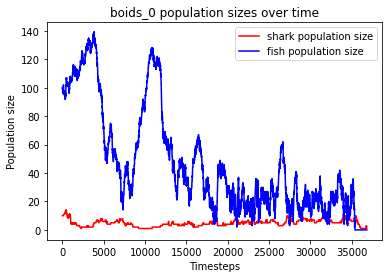

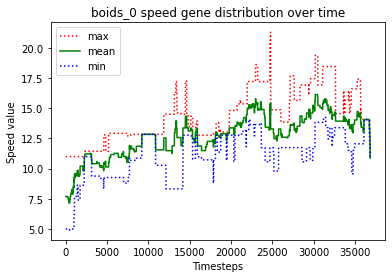

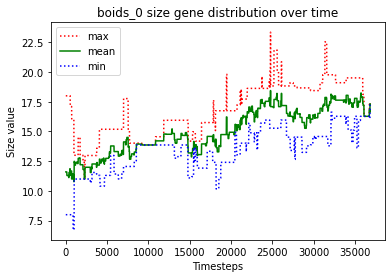

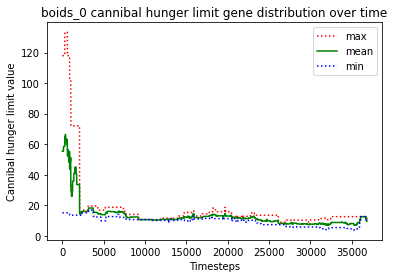

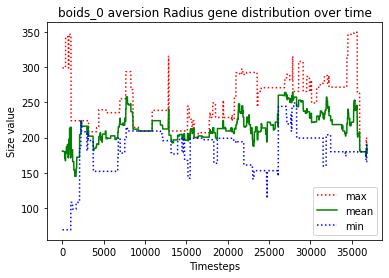

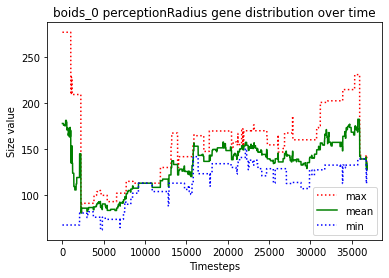

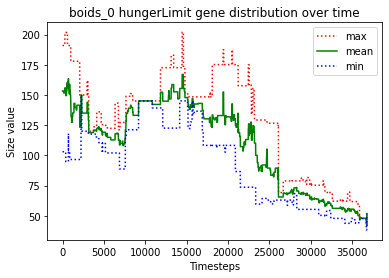





						BOIDS_1

predator_9 just gave birth to predator_10
predator_1 just gave birth to predator_11
predator_10 just gave birth to predator_12
predator_12 starved to death
predator_10 starved to death
predator_9 ate the carcass of predator_10_carcass
predator_6 ate the carcass of predator_12_carcass
predator_1 just gave birth to predator_13
predator_4 just gave birth to predator_14
predator_9 starved to death
predator_3 just gave birth to predator_15
predator_3 ate the carcass of predator_9_carcass
predator_6 just gave birth to predator_16
predator_15 starved to death
predator_3 ate the carcass of predator_15_carcass
predator_1 starved to death
predator_13 ate the carcass of predator_1_carcass
predator_0 just gave birth to predator_17
predator_7 starved to death
predator_3 ate the carcass of predator_7_carcass
predator_14 starved to death
predator_16 ate the carcass of predator_14_carcass
predator_3 starved to death
predator_4 starved to death
predator_17 ate the carcass of predator

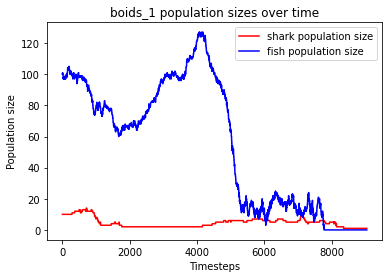

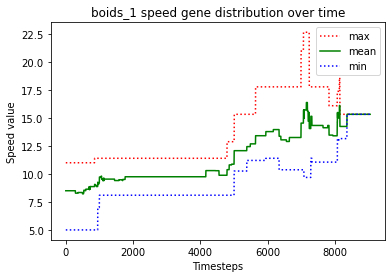

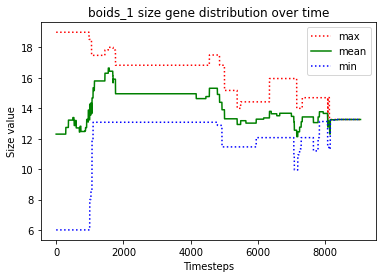

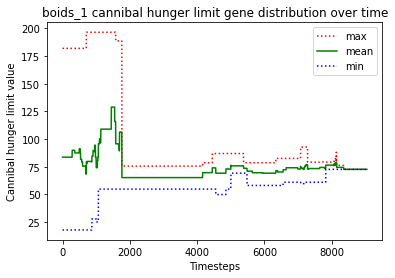

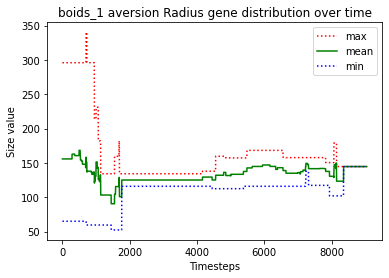

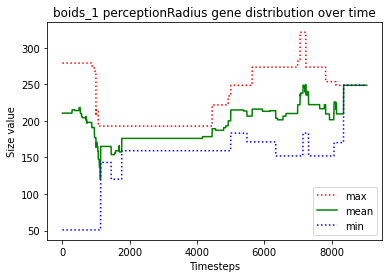

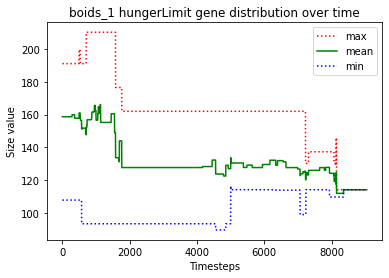





						BOIDS_2

predator_2 just gave birth to predator_10
predator_3 just gave birth to predator_11
predator_7 just gave birth to predator_12
predator_2 killed predator_9
predator_11 just gave birth to predator_13
predator_12 just gave birth to predator_14
predator_4 just gave birth to predator_15
predator_10 killed predator_15
predator_13 just gave birth to predator_16
predator_13 starved to death
predator_16 starved to death
predator_3 ate the carcass of predator_13_carcass
predator_11 ate the carcass of predator_16_carcass
predator_7 just gave birth to predator_17
predator_3 just gave birth to predator_18
predator_7 starved to death
predator_14 ate the carcass of predator_7_carcass
predator_18 starved to death
predator_3 starved to death
predator_17 starved to death
predator_11 ate the carcass of predator_17_carcass
predator_1 ate the carcass of predator_3_carcass
predator_1 ate the carcass of predator_18_carcass
predator_4 starved to death
predator_11 starved to death
predator_1

predator_64 ate the carcass of predator_65_carcass
predator_64 just gave birth to predator_67
predator_50 starved to death
predator_64 ate the carcass of predator_62_carcass
predator_66 just gave birth to predator_68
predator_68 killed predator_64
predator_67 just gave birth to predator_69
predator_68 ate the carcass of predator_50_carcass
predator_67 starved to death
predator_66 ate the carcass of predator_67_carcass
predator_66 just gave birth to predator_70
predator_69 starved to death
predator_68 starved to death
predator_66 ate the carcass of predator_69_carcass
predator_70 ate the carcass of predator_68_carcass
predator_70 just gave birth to predator_71
predator_66 starved to death
predator_30 just gave birth to predator_72
predator_30 just gave birth to predator_73
predator_73 ate the carcass of predator_66_carcass
predator_30 just gave birth to predator_74
predator_74 starved to death
predator_30 starved to death
predator_73 starved to death
predator_70 ate the carcass of preda

predator_119 starved to death
predator_105 ate the carcass of predator_119_carcass
predator_115 just gave birth to predator_126
predator_118 just gave birth to predator_127
predator_118 just gave birth to predator_128
predator_128 just gave birth to predator_129
predator_110 just gave birth to predator_130
predator_110 killed predator_130
predator_126 just gave birth to predator_131
predator_129 starved to death
predator_115 ate the carcass of predator_129_carcass
predator_118 just gave birth to predator_132
predator_127 starved to death
predator_115 just gave birth to predator_133
predator_115 ate the carcass of predator_127_carcass
no fish to move
predator_128 starved to death
predator_126 starved to death
predator_132 ate the carcass of predator_128_carcass
predator_118 just gave birth to predator_134
predator_131 ate the carcass of predator_126_carcass
predator_105 just gave birth to predator_135
predator_134 starved to death
predator_115 killed predator_133
predator_118 starved to

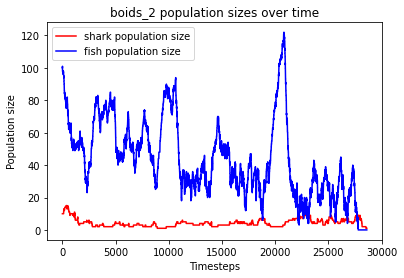

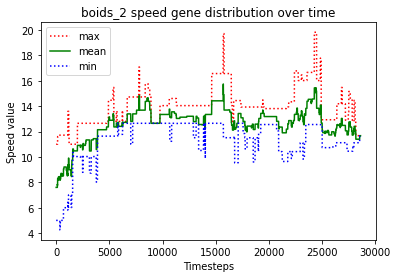

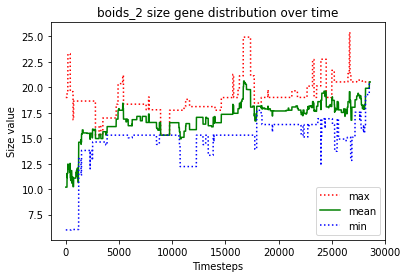

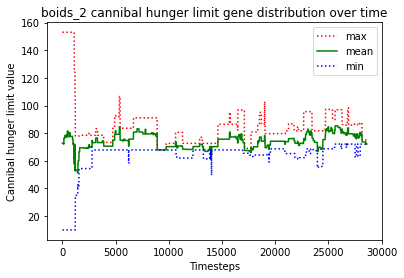

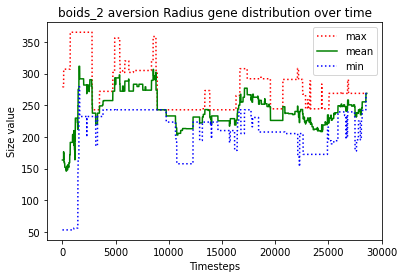

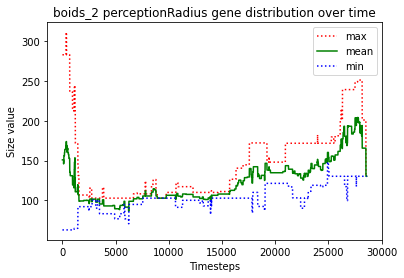

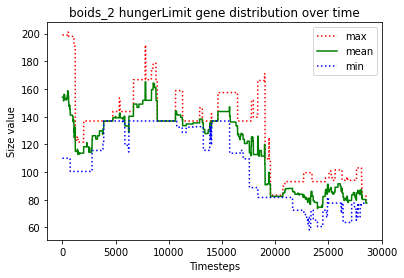





						BOIDS_3

predator_9 just gave birth to predator_10
predator_3 just gave birth to predator_11
predator_9 just gave birth to predator_12
predator_1 just gave birth to predator_13
predator_11 just gave birth to predator_14
predator_9 just gave birth to predator_15
predator_9 starved to death
predator_15 starved to death
predator_12 starved to death
predator_2 ate the carcass of predator_12_carcass
predator_1 just gave birth to predator_16
predator_7 ate the carcass of predator_15_carcass
predator_7 ate the carcass of predator_9_carcass
predator_8 just gave birth to predator_17
predator_1 starved to death
predator_16 starved to death
predator_11 starved to death
predator_4 ate the carcass of predator_16_carcass
predator_14 ate the carcass of predator_11_carcass
predator_13 starved to death
predator_10 ate the carcass of predator_1_carcass
predator_7 just gave birth to predator_18
predator_4 ate the carcass of predator_13_carcass
predator_14 starved to death
predator_3 starved to 

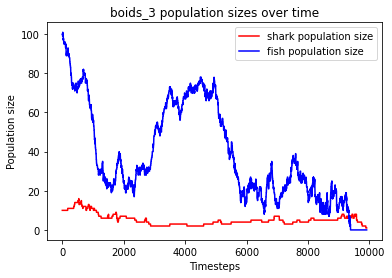

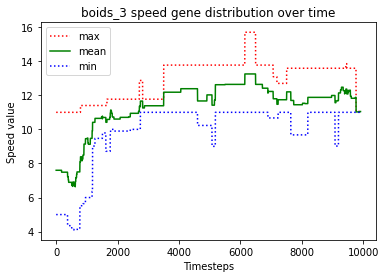

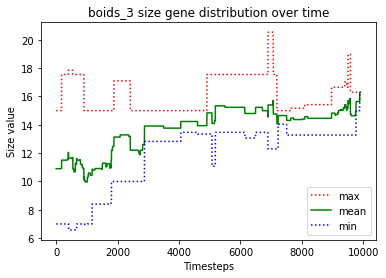

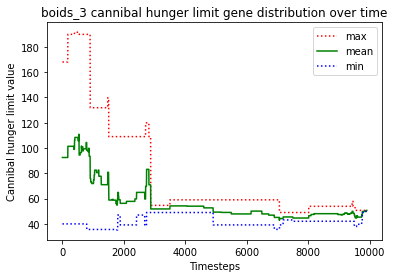

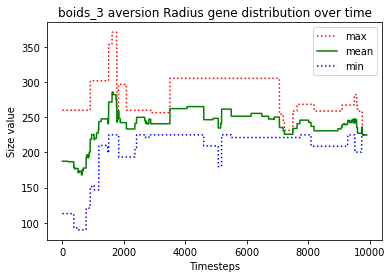

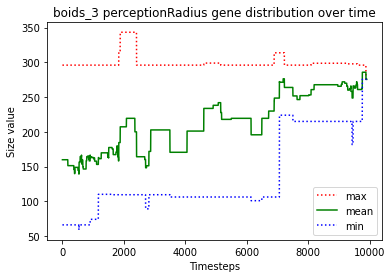

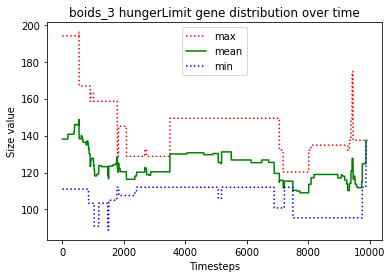





						BOIDS_4

predator_5 just gave birth to predator_10
predator_10 just gave birth to predator_11
predator_10 starved to death
predator_11 starved to death
predator_8 just gave birth to predator_12
predator_0 just gave birth to predator_13
predator_5 ate the carcass of predator_10_carcass
predator_2 ate the carcass of predator_11_carcass
predator_8 just gave birth to predator_14
predator_5 starved to death
predator_2 ate the carcass of predator_5_carcass
predator_14 starved to death
predator_7 ate the carcass of predator_14_carcass
predator_8 starved to death
predator_4 ate the carcass of predator_8_carcass
predator_9 starved to death
predator_2 ate the carcass of predator_9_carcass
predator_12 starved to death
predator_4 ate the carcass of predator_12_carcass
predator_7 starved to death
predator_1 ate the carcass of predator_7_carcass
predator_2 just gave birth to predator_15
predator_3 just gave birth to predator_16
predator_1 killed predator_15
predator_6 starved to death
pred

predator_66 starved to death
predator_65 just gave birth to predator_67
predator_58 starved to death
predator_67 ate the carcass of predator_66_carcass
predator_65 just gave birth to predator_68
predator_62 starved to death
predator_68 starved to death
predator_48 ate the carcass of predator_58_carcass
predator_48 ate the carcass of predator_62_carcass
predator_48 ate the carcass of predator_68_carcass
predator_67 just gave birth to predator_69
predator_67 killed predator_69
predator_48 starved to death
predator_67 ate the carcass of predator_48_carcass
predator_65 just gave birth to predator_70
predator_70 just gave birth to predator_71
predator_65 just gave birth to predator_72
predator_72 just gave birth to predator_73
predator_73 just gave birth to predator_74
predator_74 starved to death
predator_73 starved to death
predator_71 just gave birth to predator_75
predator_72 ate the carcass of predator_73_carcass
predator_72 just gave birth to predator_76
predator_71 ate the carcass of

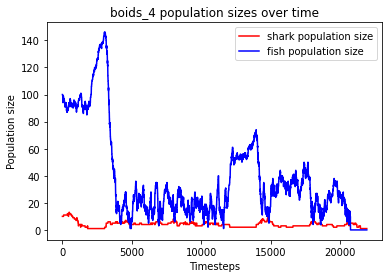

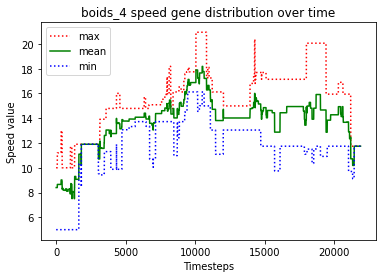

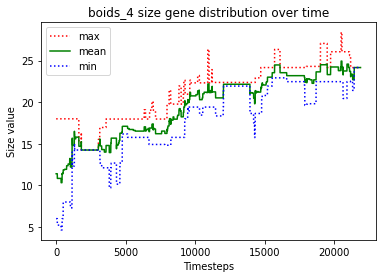

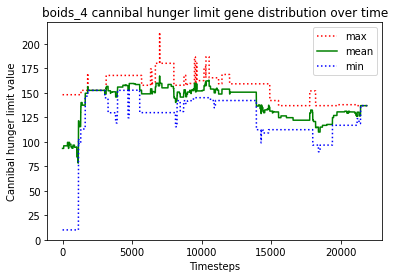

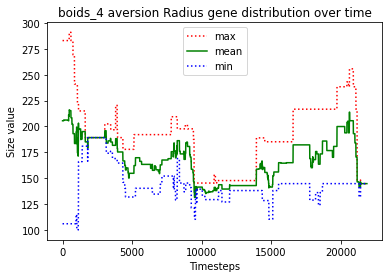

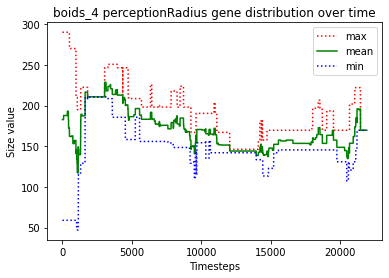

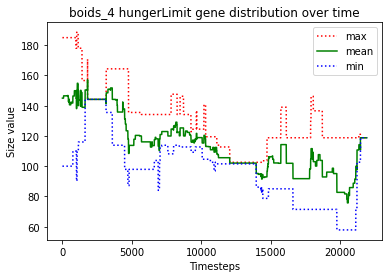





						BOIDS_5

predator_3 just gave birth to predator_10
predator_0 just gave birth to predator_11
predator_1 killed predator_10
predator_5 just gave birth to predator_12
predator_8 just gave birth to predator_13
predator_7 just gave birth to predator_14
predator_3 just gave birth to predator_15
predator_3 starved to death
predator_15 starved to death
predator_4 ate the carcass of predator_3_carcass
predator_4 ate the carcass of predator_15_carcass
predator_1 just gave birth to predator_16
predator_0 killed predator_12
predator_7 just gave birth to predator_17
predator_17 starved to death
predator_7 starved to death
predator_14 ate the carcass of predator_7_carcass
predator_5 ate the carcass of predator_17_carcass
predator_0 just gave birth to predator_18
predator_0 starved to death
predator_18 starved to death
predator_13 ate the carcass of predator_18_carcass
predator_6 starved to death
predator_14 ate the carcass of predator_0_carcass
predator_2 ate the carcass of predator_6_car

predator_66 starved to death
predator_62 ate the carcass of predator_66_carcass
predator_55 ate the carcass of predator_61_carcass
predator_31 ate the carcass of predator_67_carcass
predator_68 starved to death
predator_57 ate the carcass of predator_68_carcass
predator_57 just gave birth to predator_69
predator_69 just gave birth to predator_70
predator_55 starved to death
predator_69 starved to death
predator_62 starved to death
predator_60 ate the carcass of predator_69_carcass
predator_60 ate the carcass of predator_55_carcass
predator_47 ate the carcass of predator_62_carcass
predator_57 starved to death
predator_31 just gave birth to predator_71
predator_47 ate the carcass of predator_57_carcass
predator_31 just gave birth to predator_72
predator_31 just gave birth to predator_73
predator_73 just gave birth to predator_74
predator_72 starved to death
predator_70 just gave birth to predator_75
predator_70 killed predator_75
predator_74 just gave birth to predator_76
predator_47 at

predator_129 just gave birth to predator_130
predator_116 ate the carcass of predator_83_carcass
predator_129 starved to death
predator_127 just gave birth to predator_131
predator_131 ate the carcass of predator_129_carcass
predator_130 starved to death
predator_122 just gave birth to predator_132
predator_127 starved to death
predator_116 ate the carcass of predator_127_carcass
predator_76 ate the carcass of predator_130_carcass
predator_125 just gave birth to predator_133
predator_131 starved to death
predator_76 ate the carcass of predator_131_carcass
predator_132 starved to death
predator_101 ate the carcass of predator_132_carcass
predator_122 starved to death
predator_116 just gave birth to predator_134
predator_120 ate the carcass of predator_122_carcass
predator_76 just gave birth to predator_135
predator_116 just gave birth to predator_136
predator_101 just gave birth to predator_137
predator_133 just gave birth to predator_138
predator_137 just gave birth to predator_139
pre

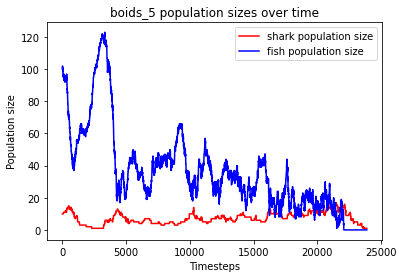

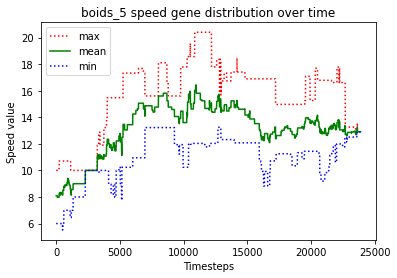

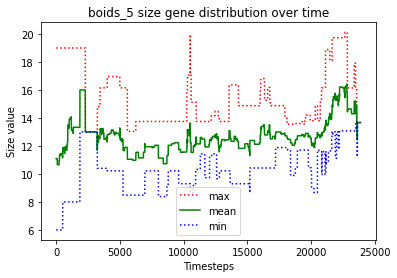

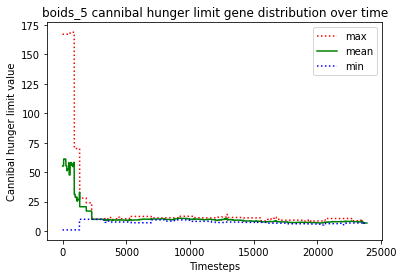

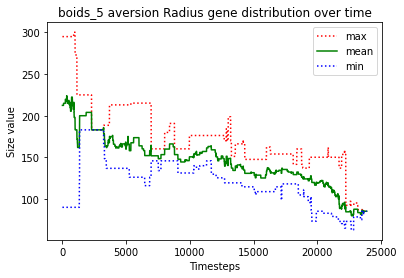

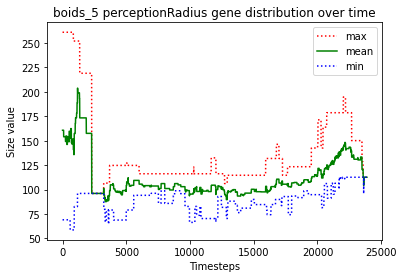

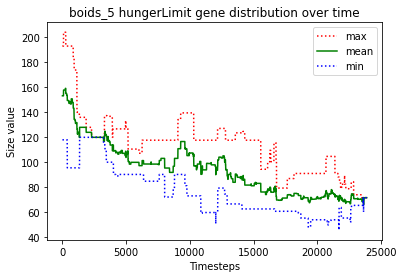





						BOIDS_6

predator_2 just gave birth to predator_10
predator_4 just gave birth to predator_11
predator_3 just gave birth to predator_12
predator_8 just gave birth to predator_13
predator_0 just gave birth to predator_14
predator_11 just gave birth to predator_15
predator_2 just gave birth to predator_16
predator_2 starved to death
predator_16 starved to death
predator_5 ate the carcass of predator_2_carcass
predator_5 ate the carcass of predator_16_carcass
predator_11 starved to death
predator_8 starved to death
predator_5 ate the carcass of predator_11_carcass
predator_5 ate the carcass of predator_8_carcass
predator_10 starved to death
predator_14 ate the carcass of predator_10_carcass
predator_15 starved to death
predator_5 ate the carcass of predator_15_carcass
predator_7 just gave birth to predator_17
predator_3 starved to death
predator_0 starved to death
predator_14 ate the carcass of predator_3_carcass
predator_5 ate the carcass of predator_0_carcass
predator_13 starve

predator_65 just gave birth to predator_66
predator_66 killed predator_54
predator_66 starved to death
predator_53 ate the carcass of predator_66_carcass
predator_64 just gave birth to predator_67
predator_48 just gave birth to predator_68
predator_65 starved to death
predator_67 ate the carcass of predator_65_carcass
predator_64 starved to death
no fish to move
predator_53 ate the carcass of predator_64_carcass
predator_53 just gave birth to predator_69
predator_69 just gave birth to predator_70
predator_53 just gave birth to predator_71
predator_69 just gave birth to predator_72
predator_53 just gave birth to predator_73
predator_72 starved to death
predator_69 starved to death
predator_70 ate the carcass of predator_72_carcass
predator_53 starved to death
predator_71 just gave birth to predator_74
predator_73 starved to death
predator_71 starved to death
predator_70 ate the carcass of predator_69_carcass
predator_74 starved to death
predator_70 ate the carcass of predator_71_carcass

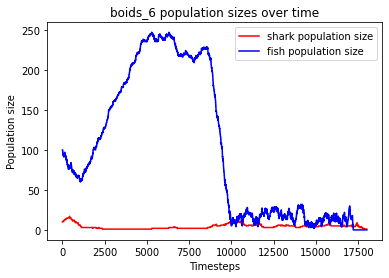

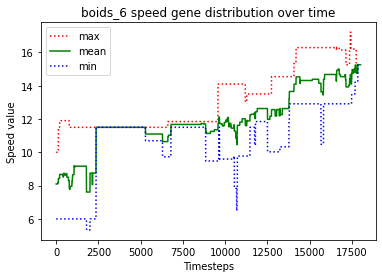

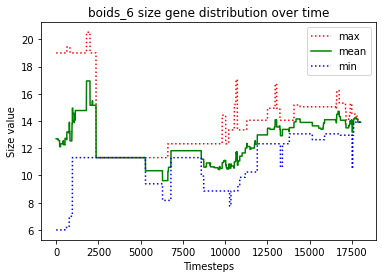

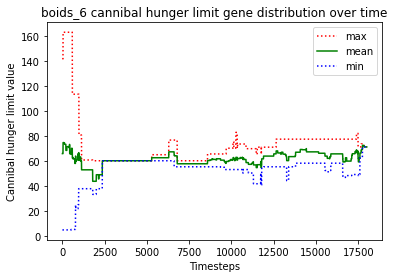

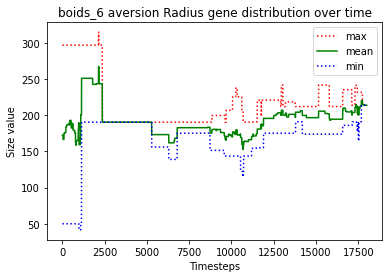

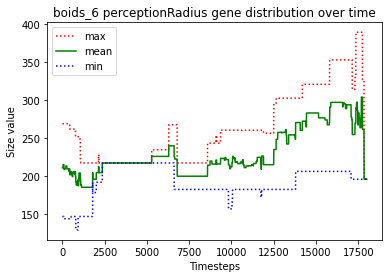

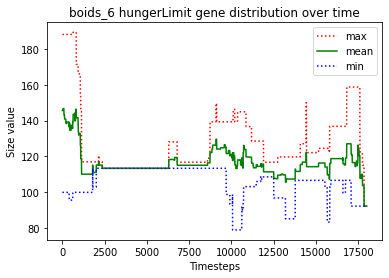





						BOIDS_7

predator_6 just gave birth to predator_10
predator_2 just gave birth to predator_11
predator_4 just gave birth to predator_12
predator_12 just gave birth to predator_13
predator_2 starved to death
predator_6 starved to death
predator_0 ate the carcass of predator_2_carcass
predator_1 ate the carcass of predator_6_carcass
predator_11 starved to death
predator_3 ate the carcass of predator_11_carcass
predator_10 starved to death
predator_1 just gave birth to predator_14
predator_14 just gave birth to predator_15
predator_8 ate the carcass of predator_10_carcass
predator_15 starved to death
predator_1 ate the carcass of predator_15_carcass
predator_1 just gave birth to predator_16
predator_14 starved to death
predator_16 ate the carcass of predator_14_carcass
predator_13 starved to death
predator_5 ate the carcass of predator_13_carcass
predator_3 just gave birth to predator_17
predator_5 just gave birth to predator_18
predator_1 starved to death
predator_0 ate the carc

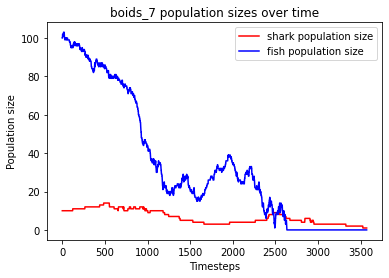

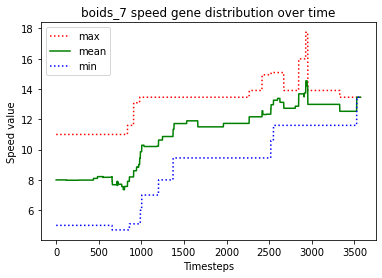

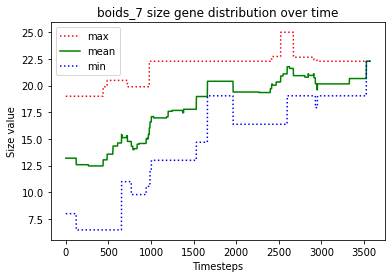

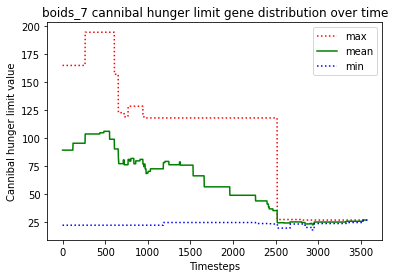

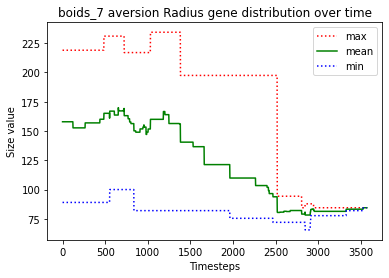

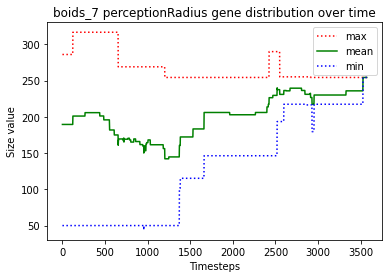

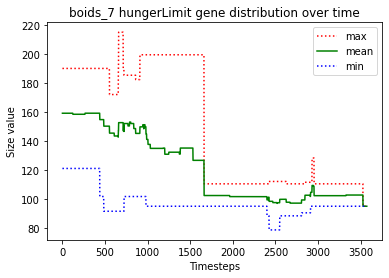





						BOIDS_8

predator_7 just gave birth to predator_10
predator_2 just gave birth to predator_11
predator_8 just gave birth to predator_12
predator_3 just gave birth to predator_13
predator_10 starved to death
predator_11 killed predator_13
predator_5 just gave birth to predator_14
predator_8 ate the carcass of predator_10_carcass
predator_5 just gave birth to predator_15
predator_7 starved to death
predator_5 starved to death
predator_15 starved to death
predator_14 ate the carcass of predator_15_carcass
predator_3 ate the carcass of predator_7_carcass
predator_14 ate the carcass of predator_5_carcass
predator_12 just gave birth to predator_16
predator_8 starved to death
predator_12 starved to death
predator_11 ate the carcass of predator_8_carcass
predator_6 ate the carcass of predator_12_carcass
predator_4 just gave birth to predator_17
predator_4 killed predator_1
predator_3 starved to death
predator_2 ate the carcass of predator_3_carcass
predator_11 starved to death
predato

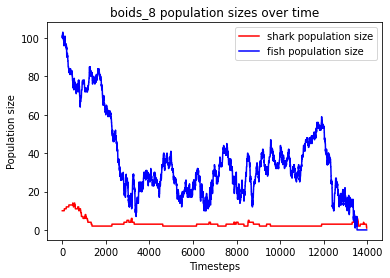

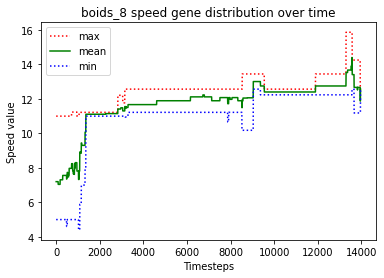

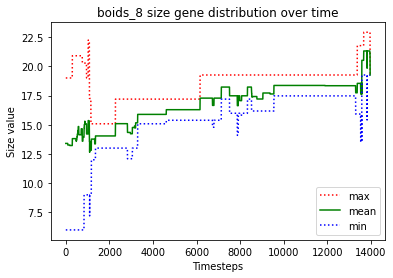

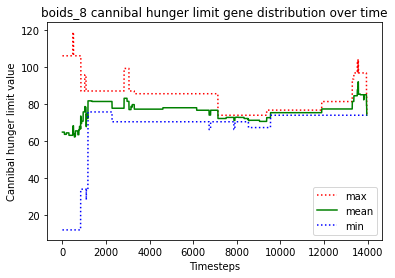

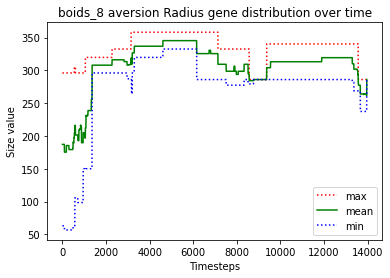

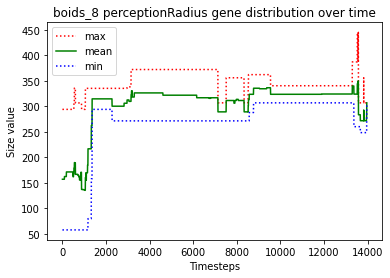

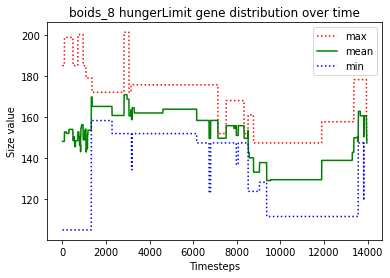





						BOIDS_9

predator_0 just gave birth to predator_10
predator_2 just gave birth to predator_11
predator_4 just gave birth to predator_12
predator_2 just gave birth to predator_13
predator_7 just gave birth to predator_14
predator_14 just gave birth to predator_15
predator_11 just gave birth to predator_16
predator_9 just gave birth to predator_17
predator_0 starved to death
predator_13 ate the carcass of predator_0_carcass
predator_10 just gave birth to predator_18
predator_18 starved to death
predator_10 starved to death
predator_7 ate the carcass of predator_10_carcass
predator_15 ate the carcass of predator_18_carcass
predator_6 just gave birth to predator_19
predator_14 starved to death
predator_17 starved to death
predator_13 ate the carcass of predator_17_carcass
predator_9 just gave birth to predator_20
predator_15 starved to death
predator_19 ate the carcass of predator_14_carcass
predator_9 starved to death
predator_20 starved to death
predator_7 ate the carcass of pre

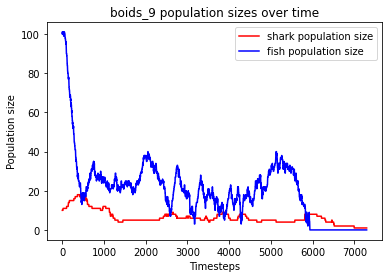

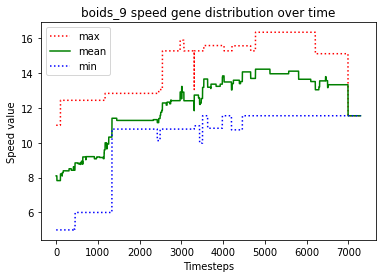

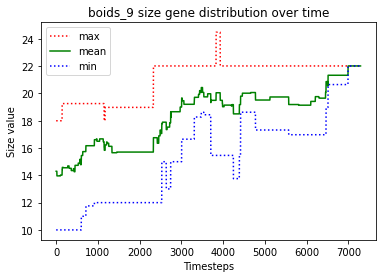

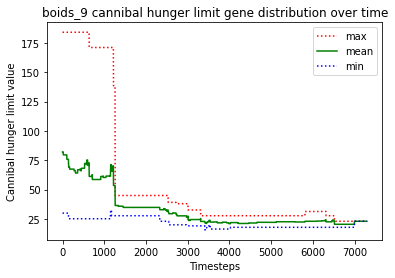

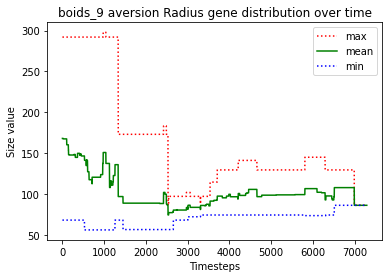

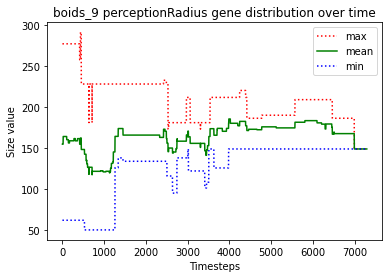

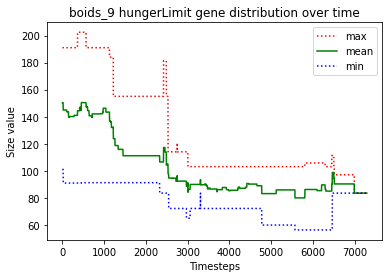





						BOIDS_10

predator_6 just gave birth to predator_10
predator_9 just gave birth to predator_11
predator_1 just gave birth to predator_12
predator_11 just gave birth to predator_13
predator_1 just gave birth to predator_14
predator_1 just gave birth to predator_15
predator_6 just gave birth to predator_16
predator_15 just gave birth to predator_17
predator_15 starved to death
predator_17 ate the carcass of predator_15_carcass
predator_1 starved to death
predator_13 ate the carcass of predator_1_carcass
predator_17 starved to death
predator_6 starved to death
predator_16 starved to death
predator_5 ate the carcass of predator_6_carcass
predator_10 just gave birth to predator_18
predator_11 ate the carcass of predator_17_carcass
predator_5 ate the carcass of predator_16_carcass
predator_13 starved to death
predator_11 ate the carcass of predator_13_carcass
predator_9 starved to death
predator_14 starved to death
predator_5 ate the carcass of predator_9_carcass
predator_18 starved

predator_60 just gave birth to predator_66
predator_63 just gave birth to predator_67
predator_65 starved to death
predator_60 just gave birth to predator_68
predator_7 ate the carcass of predator_65_carcass
predator_68 starved to death
predator_60 starved to death
predator_63 ate the carcass of predator_60_carcass
predator_67 just gave birth to predator_69
predator_7 ate the carcass of predator_68_carcass
predator_69 starved to death
predator_64 just gave birth to predator_70
predator_64 ate the carcass of predator_69_carcass
predator_67 starved to death
predator_70 ate the carcass of predator_67_carcass
predator_66 starved to death
predator_52 just gave birth to predator_71
predator_63 ate the carcass of predator_66_carcass
predator_70 starved to death
predator_64 ate the carcass of predator_70_carcass
predator_64 starved to death
predator_63 just gave birth to predator_72
predator_72 starved to death
predator_63 ate the carcass of predator_72_carcass
predator_7 ate the carcass of pr

predator_122 just gave birth to predator_124
predator_113 just gave birth to predator_125
predator_7 just gave birth to predator_126
predator_122 just gave birth to predator_127
predator_122 starved to death
predator_7 ate the carcass of predator_122_carcass
predator_123 starved to death
predator_126 ate the carcass of predator_123_carcass
predator_125 starved to death
predator_126 ate the carcass of predator_125_carcass
predator_113 starved to death
predator_127 just gave birth to predator_128
predator_127 ate the carcass of predator_113_carcass
predator_7 starved to death
predator_124 ate the carcass of predator_7_carcass
predator_128 just gave birth to predator_129
predator_126 starved to death
predator_128 just gave birth to predator_130
predator_129 ate the carcass of predator_126_carcass
predator_130 starved to death
predator_124 just gave birth to predator_131
predator_128 ate the carcass of predator_130_carcass
predator_124 just gave birth to predator_132
predator_129 just gave

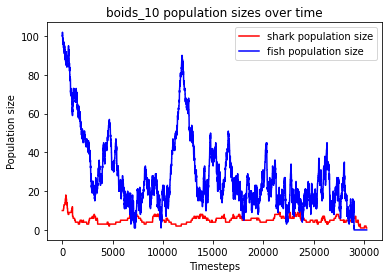

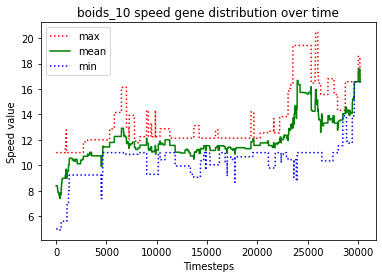

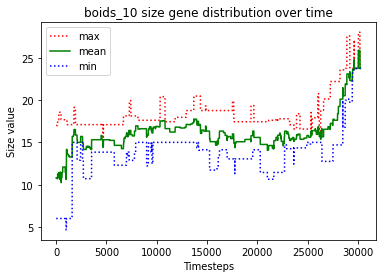

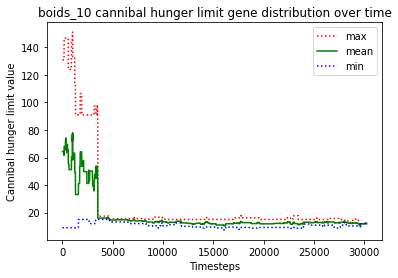

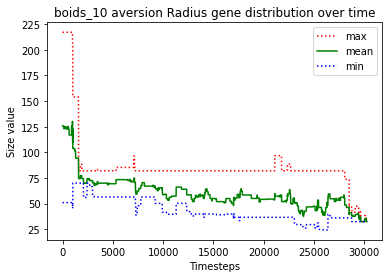

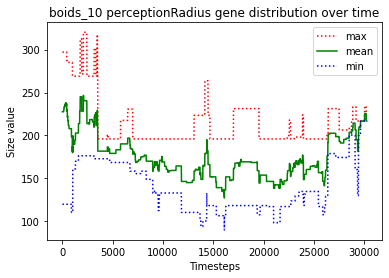

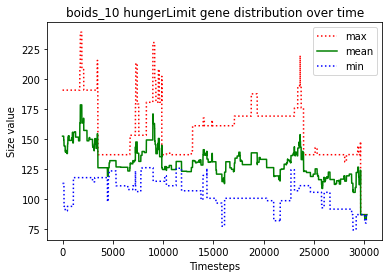





						BOIDS_11

predator_5 just gave birth to predator_10
predator_8 just gave birth to predator_11
predator_9 just gave birth to predator_12
predator_6 just gave birth to predator_13
predator_10 just gave birth to predator_14
predator_5 starved to death
predator_14 ate the carcass of predator_5_carcass
predator_10 starved to death
predator_14 ate the carcass of predator_10_carcass
predator_11 starved to death
predator_0 ate the carcass of predator_11_carcass
predator_9 starved to death
predator_12 ate the carcass of predator_9_carcass
predator_8 just gave birth to predator_15
predator_12 starved to death
predator_6 starved to death
predator_15 starved to death
predator_8 starved to death
predator_13 ate the carcass of predator_12_carcass
predator_0 ate the carcass of predator_6_carcass
predator_3 just gave birth to predator_16
predator_2 ate the carcass of predator_15_carcass
predator_14 starved to death
predator_3 ate the carcass of predator_14_carcass
predator_2 ate the carcass 

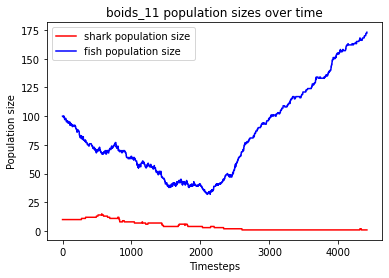

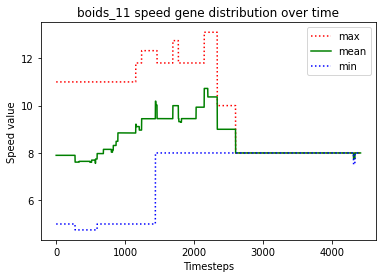

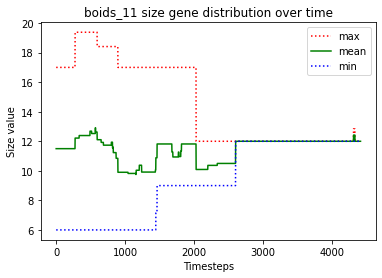

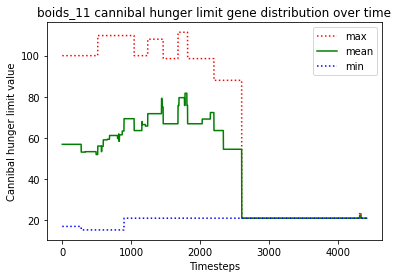

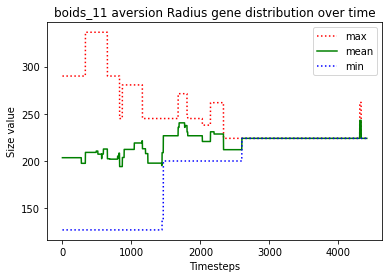

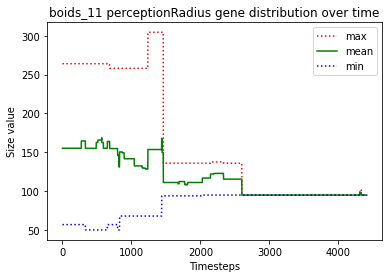

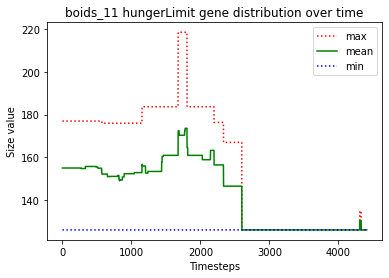





						BOIDS_12

predator_8 just gave birth to predator_10
predator_10 just gave birth to predator_11
predator_11 starved to death
predator_10 starved to death
predator_0 ate the carcass of predator_10_carcass
predator_0 ate the carcass of predator_11_carcass
predator_0 just gave birth to predator_12
predator_8 starved to death
predator_4 ate the carcass of predator_8_carcass
predator_5 just gave birth to predator_13
predator_3 just gave birth to predator_14
predator_9 just gave birth to predator_15
predator_12 starved to death
predator_1 ate the carcass of predator_12_carcass
predator_4 starved to death
predator_7 starved to death
predator_0 ate the carcass of predator_4_carcass
predator_0 ate the carcass of predator_7_carcass
predator_14 just gave birth to predator_16
predator_9 starved to death
predator_15 ate the carcass of predator_9_carcass
predator_0 starved to death
predator_5 ate the carcass of predator_0_carcass
predator_1 starved to death
predator_6 starved to death
preda

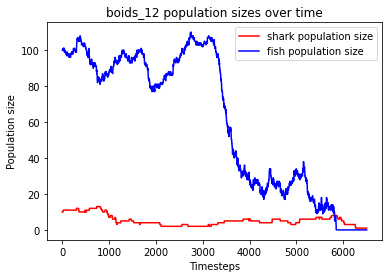

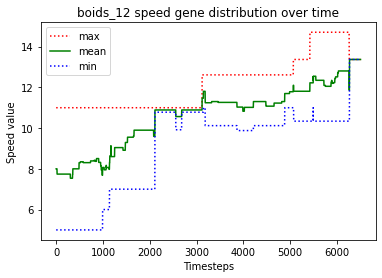

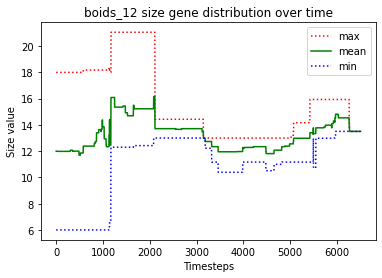

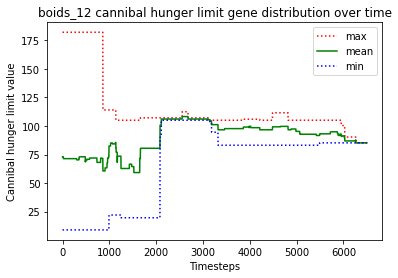

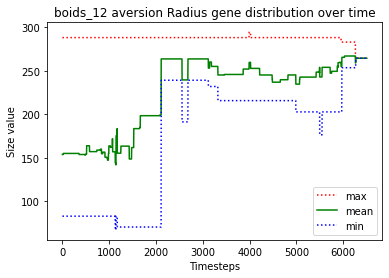

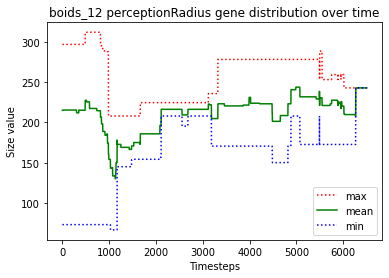

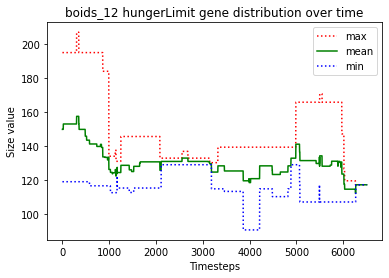





						BOIDS_13

predator_1 just gave birth to predator_10
predator_6 just gave birth to predator_11
predator_9 just gave birth to predator_12
predator_9 just gave birth to predator_13
predator_1 just gave birth to predator_14
predator_11 just gave birth to predator_15
predator_14 starved to death
predator_1 ate the carcass of predator_14_carcass
predator_15 starved to death
predator_11 ate the carcass of predator_15_carcass
predator_10 starved to death
predator_1 ate the carcass of predator_10_carcass
predator_8 just gave birth to predator_16
predator_0 just gave birth to predator_17
predator_0 just gave birth to predator_18
predator_13 starved to death
predator_11 ate the carcass of predator_13_carcass
predator_17 just gave birth to predator_19
predator_1 starved to death
predator_0 just gave birth to predator_20
predator_20 starved to death
predator_0 starved to death
predator_6 ate the carcass of predator_1_carcass
predator_16 just gave birth to predator_21
predator_12 ate the c

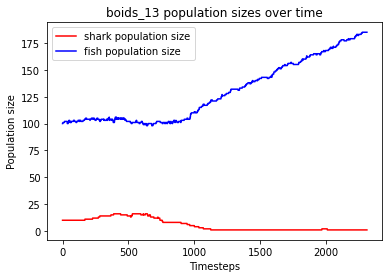

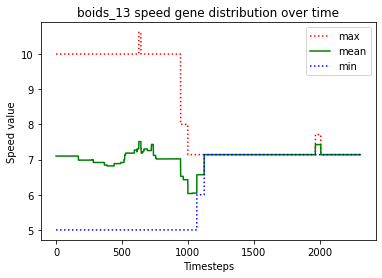

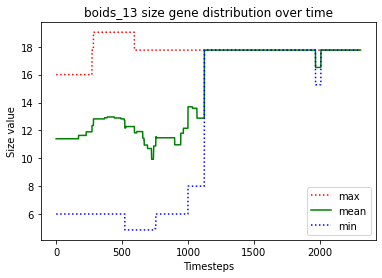

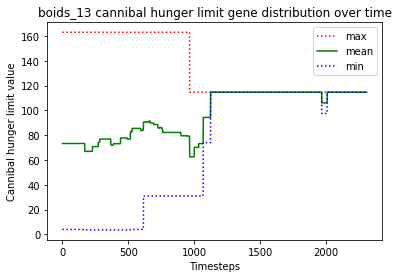

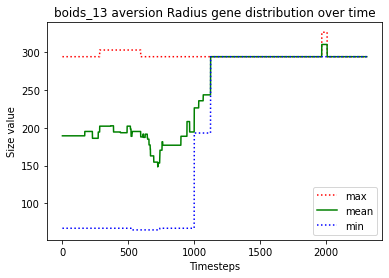

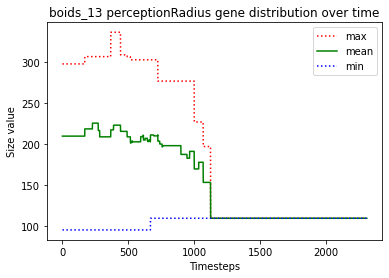

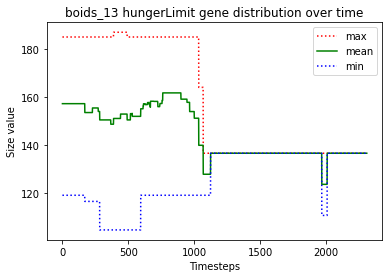





						BOIDS_14

predator_5 just gave birth to predator_10
predator_10 just gave birth to predator_11
predator_10 just gave birth to predator_12
predator_10 starved to death
predator_5 ate the carcass of predator_10_carcass
predator_12 starved to death
predator_4 ate the carcass of predator_12_carcass
predator_4 just gave birth to predator_13
predator_9 just gave birth to predator_14
predator_7 just gave birth to predator_15
predator_13 just gave birth to predator_16
predator_11 starved to death
predator_14 ate the carcass of predator_11_carcass
predator_16 starved to death
predator_13 ate the carcass of predator_16_carcass
predator_9 starved to death
predator_14 ate the carcass of predator_9_carcass
predator_15 just gave birth to predator_17
predator_3 just gave birth to predator_18
predator_14 starved to death
predator_5 ate the carcass of predator_14_carcass
predator_13 starved to death
predator_6 ate the carcass of predator_13_carcass
predator_7 killed predator_2
predator_4 star

predator_65 just gave birth to predator_66
predator_66 starved to death
predator_65 starved to death
predator_46 just gave birth to predator_67
predator_46 starved to death
predator_60 ate the carcass of predator_66_carcass
predator_63 ate the carcass of predator_65_carcass
predator_67 ate the carcass of predator_46_carcass
predator_60 just gave birth to predator_68
predator_67 just gave birth to predator_69
predator_69 starved to death
predator_63 just gave birth to predator_70
predator_63 ate the carcass of predator_69_carcass
predator_67 starved to death
predator_68 ate the carcass of predator_67_carcass
predator_68 just gave birth to predator_71
predator_68 just gave birth to predator_72
predator_72 starved to death
predator_68 ate the carcass of predator_72_carcass
predator_68 just gave birth to predator_73
predator_71 just gave birth to predator_74
predator_74 starved to death
predator_70 starved to death
predator_60 ate the carcass of predator_70_carcass
predator_71 starved to d

predator_108 starved to death
predator_121 ate the carcass of predator_108_carcass
predator_123 starved to death
predator_114 ate the carcass of predator_123_carcass
predator_121 starved to death
predator_114 ate the carcass of predator_115_carcass
predator_114 ate the carcass of predator_124_carcass
predator_114 starved to death


finished this run because predators went extinct
Fish left: 0
Sharks left: 0
Dead sharks: 126
Timesteps passed: 24687
Fish went extinct at timestep 23560
Sharks went extinct at timestep 24687


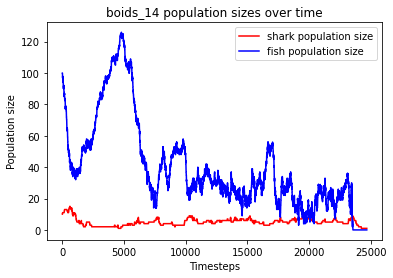

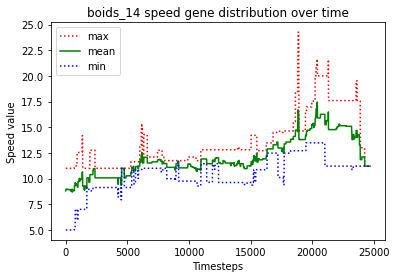

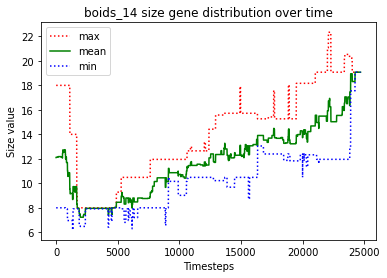

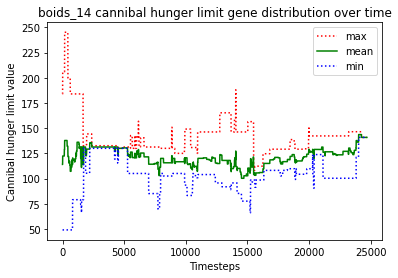

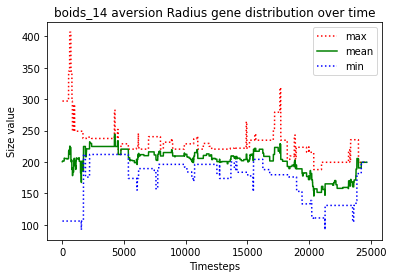

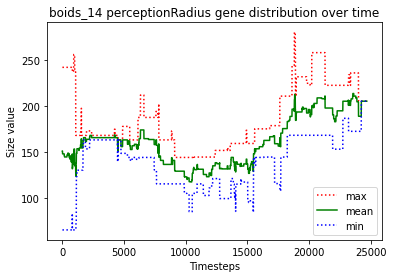

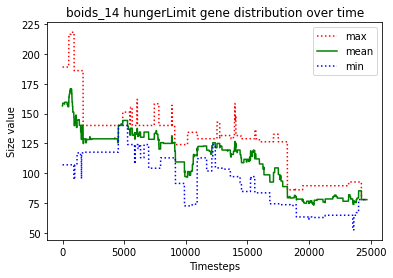





						BOIDS_15

predator_6 just gave birth to predator_10
predator_6 just gave birth to predator_11
predator_3 just gave birth to predator_12
predator_6 just gave birth to predator_13
predator_5 just gave birth to predator_14
predator_5 killed predator_14
predator_13 starved to death
predator_6 starved to death
predator_10 ate the carcass of predator_6_carcass
predator_4 ate the carcass of predator_13_carcass
predator_11 starved to death
predator_4 ate the carcass of predator_11_carcass
predator_1 just gave birth to predator_15
predator_1 just gave birth to predator_16
predator_15 just gave birth to predator_17
predator_16 starved to death
predator_17 starved to death
predator_1 starved to death
predator_7 ate the carcass of predator_17_carcass
predator_9 just gave birth to predator_18
predator_4 ate the carcass of predator_1_carcass
predator_2 ate the carcass of predator_16_carcass
predator_18 just gave birth to predator_19
predator_0 just gave birth to predator_20
predator_10 sta

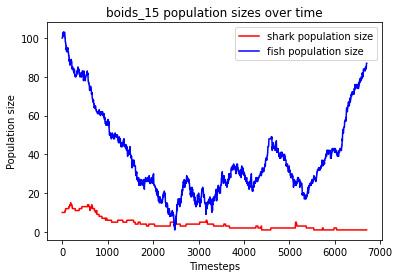

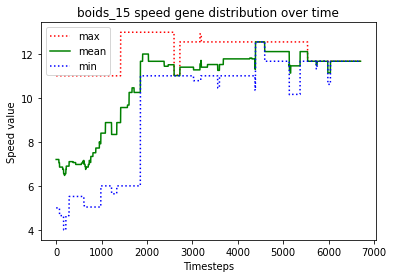

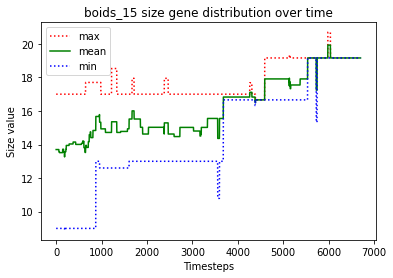

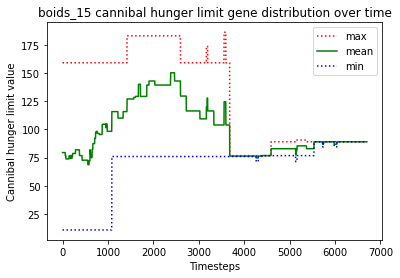

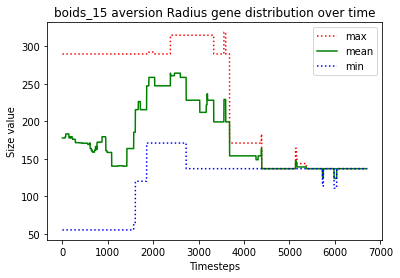

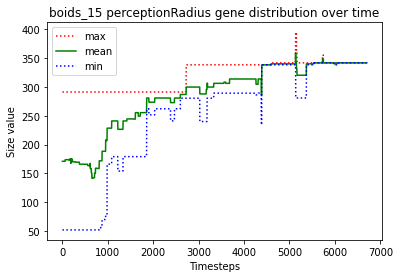

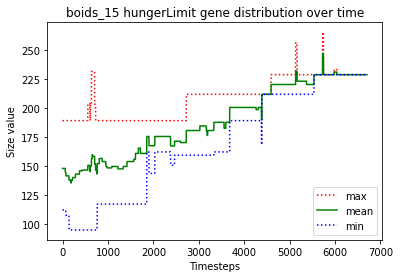





						BOIDS_16

predator_4 just gave birth to predator_10
predator_7 just gave birth to predator_11
predator_3 just gave birth to predator_12
predator_8 killed predator_12
predator_3 just gave birth to predator_13
predator_4 starved to death
predator_10 ate the carcass of predator_4_carcass
predator_13 starved to death
predator_10 ate the carcass of predator_13_carcass
predator_11 starved to death
predator_3 starved to death
predator_10 ate the carcass of predator_3_carcass
predator_10 ate the carcass of predator_11_carcass
predator_2 just gave birth to predator_14
predator_2 just gave birth to predator_15
predator_2 just gave birth to predator_16
predator_16 starved to death
predator_9 ate the carcass of predator_16_carcass
predator_2 starved to death
predator_9 ate the carcass of predator_2_carcass
predator_14 starved to death
predator_6 ate the carcass of predator_14_carcass
predator_15 starved to death
predator_9 ate the carcass of predator_15_carcass
predator_0 just gave birth

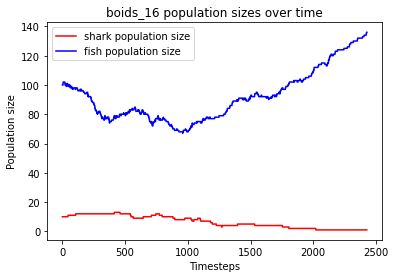

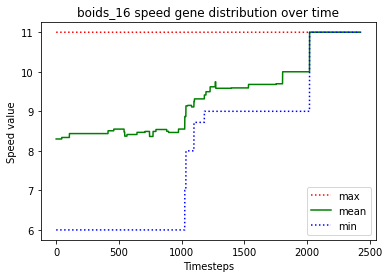

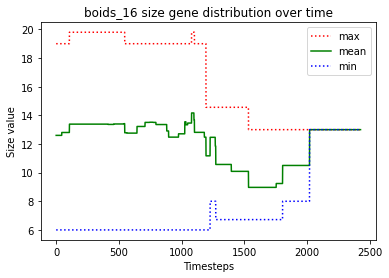

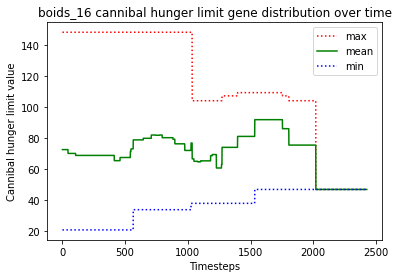

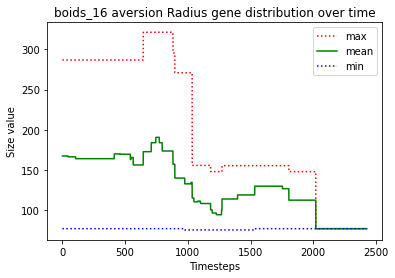

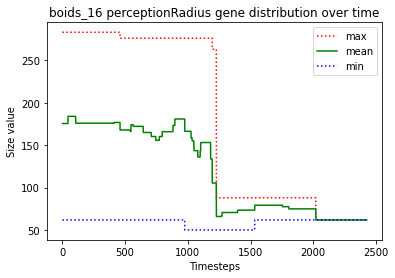

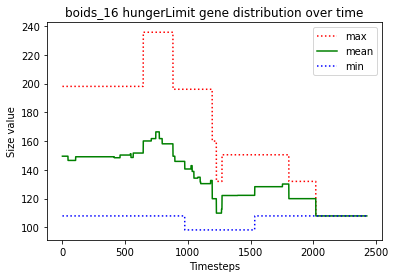





						BOIDS_17

predator_0 just gave birth to predator_10
predator_10 just gave birth to predator_11
predator_6 just gave birth to predator_12
predator_9 just gave birth to predator_13
predator_13 just gave birth to predator_14
predator_6 just gave birth to predator_15
predator_4 just gave birth to predator_16
predator_5 just gave birth to predator_17
predator_10 starved to death
predator_0 ate the carcass of predator_10_carcass
predator_11 starved to death
predator_0 ate the carcass of predator_11_carcass
predator_2 just gave birth to predator_18
predator_2 just gave birth to predator_19
predator_15 starved to death
predator_6 starved to death
predator_2 ate the carcass of predator_6_carcass
predator_2 ate the carcass of predator_15_carcass
predator_7 just gave birth to predator_20
predator_4 just gave birth to predator_21
predator_16 just gave birth to predator_22
predator_14 starved to death
predator_16 ate the carcass of predator_14_carcass
predator_0 starved to death
predator_

predator_56 ate the carcass of predator_63_carcass
predator_62 starved to death
predator_56 ate the carcass of predator_46_carcass
predator_56 ate the carcass of predator_62_carcass
predator_56 just gave birth to predator_65
predator_56 just gave birth to predator_66
predator_56 just gave birth to predator_67
predator_66 just gave birth to predator_68
predator_68 starved to death
predator_56 ate the carcass of predator_68_carcass
predator_56 just gave birth to predator_69
predator_69 just gave birth to predator_70
predator_70 starved to death
predator_56 ate the carcass of predator_70_carcass
predator_56 starved to death
predator_66 ate the carcass of predator_56_carcass
predator_69 starved to death
predator_67 ate the carcass of predator_69_carcass
predator_65 just gave birth to predator_71
predator_71 just gave birth to predator_72
predator_71 just gave birth to predator_73
predator_73 just gave birth to predator_74
predator_67 just gave birth to predator_75
predator_73 just gave bir

predator_93 ate the carcass of predator_125_carcass
predator_93 ate the carcass of predator_127_carcass
predator_122 just gave birth to predator_128
predator_120 just gave birth to predator_129
predator_123 starved to death
predator_114 starved to death
predator_93 just gave birth to predator_130
predator_128 ate the carcass of predator_114_carcass
predator_93 starved to death
predator_130 starved to death
predator_122 ate the carcass of predator_93_carcass
predator_129 ate the carcass of predator_123_carcass
predator_122 just gave birth to predator_131
predator_129 ate the carcass of predator_130_carcass
predator_128 starved to death
predator_129 ate the carcass of predator_128_carcass
predator_129 just gave birth to predator_132
predator_131 just gave birth to predator_133
predator_105 just gave birth to predator_134
predator_120 starved to death
predator_133 starved to death
predator_122 ate the carcass of predator_120_carcass
predator_122 just gave birth to predator_135
predator_13

predator_172 starved to death
predator_186 just gave birth to predator_187
predator_186 starved to death
predator_187 starved to death
predator_183 starved to death
predator_178 just gave birth to predator_188
predator_188 ate the carcass of predator_172_carcass
predator_188 ate the carcass of predator_187_carcass
predator_188 ate the carcass of predator_186_carcass
predator_173 starved to death
predator_185 starved to death
predator_178 ate the carcass of predator_173_carcass
predator_148 ate the carcass of predator_185_carcass
predator_163 ate the carcass of predator_183_carcass
predator_188 just gave birth to predator_189
predator_163 just gave birth to predator_190
predator_181 starved to death
predator_190 ate the carcass of predator_181_carcass
predator_163 just gave birth to predator_191
predator_190 just gave birth to predator_192
predator_192 just gave birth to predator_193
predator_189 just gave birth to predator_194
predator_192 starved to death
predator_193 starved to death

predator_243 starved to death
predator_242 starved to death
predator_241 ate the carcass of predator_243_carcass
predator_235 ate the carcass of predator_242_carcass
predator_240 starved to death
predator_238 ate the carcass of predator_240_carcass
predator_237 just gave birth to predator_245
predator_237 killed predator_245
predator_244 starved to death
predator_238 ate the carcass of predator_244_carcass
predator_237 starved to death
predator_220 ate the carcass of predator_237_carcass
predator_238 just gave birth to predator_246
predator_246 just gave birth to predator_247
predator_247 starved to death
predator_212 ate the carcass of predator_247_carcass
predator_241 starved to death
predator_238 starved to death
predator_227 just gave birth to predator_248
predator_227 just gave birth to predator_249
predator_249 ate the carcass of predator_241_carcass
predator_249 ate the carcass of predator_238_carcass
predator_246 just gave birth to predator_250
predator_248 killed predator_212


predator_298 starved to death
predator_300 starved to death
predator_299 ate the carcass of predator_298_carcass
predator_301 starved to death
predator_279 just gave birth to predator_302
predator_299 ate the carcass of predator_300_carcass
predator_254 just gave birth to predator_303
predator_268 just gave birth to predator_304
predator_286 ate the carcass of predator_301_carcass
predator_287 just gave birth to predator_305
predator_304 just gave birth to predator_306
predator_304 killed predator_306
predator_268 just gave birth to predator_307
predator_254 starved to death
predator_302 ate the carcass of predator_254_carcass
predator_305 just gave birth to predator_308
predator_305 killed predator_308
predator_307 just gave birth to predator_309
predator_307 starved to death
predator_309 starved to death
predator_268 starved to death
predator_305 ate the carcass of predator_307_carcass
predator_305 ate the carcass of predator_309_carcass
predator_279 ate the carcass of predator_268_c

predator_352 starved to death
predator_359 just gave birth to predator_361
predator_358 ate the carcass of predator_352_carcass
predator_359 starved to death
predator_361 starved to death
predator_347 ate the carcass of predator_361_carcass
predator_310 starved to death
predator_356 ate the carcass of predator_359_carcass
predator_337 ate the carcass of predator_310_carcass
predator_337 just gave birth to predator_362
predator_360 starved to death
predator_337 just gave birth to predator_363
predator_337 killed predator_363
predator_357 starved to death
predator_355 ate the carcass of predator_357_carcass
predator_362 ate the carcass of predator_360_carcass
predator_356 just gave birth to predator_364
predator_350 starved to death
predator_362 ate the carcass of predator_350_carcass
predator_364 just gave birth to predator_365
predator_362 just gave birth to predator_366
predator_364 killed predator_345
predator_362 killed predator_347
predator_362 just gave birth to predator_367
preda

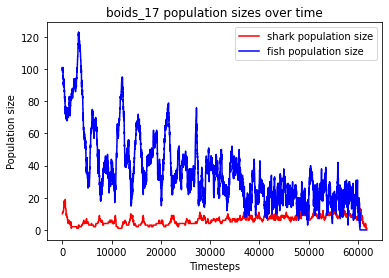

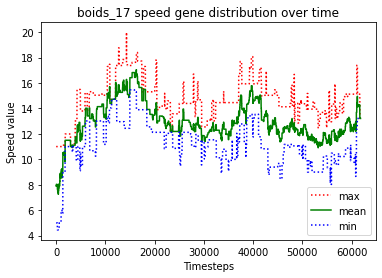

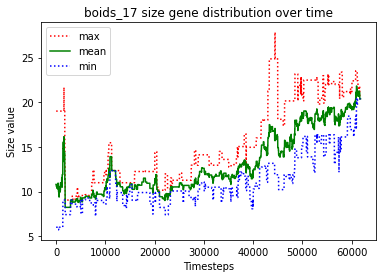

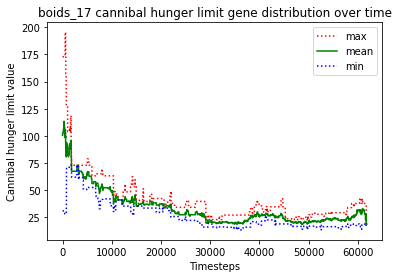

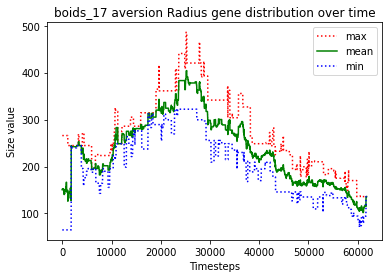

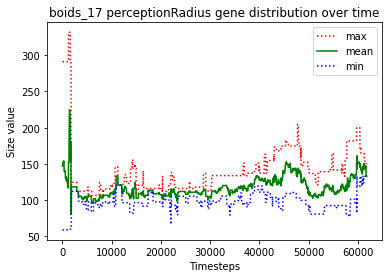

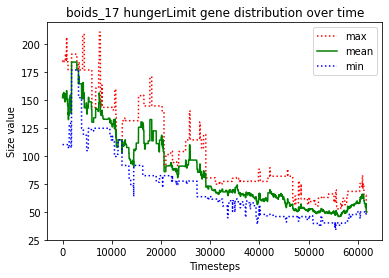





						BOIDS_18

predator_7 just gave birth to predator_10
predator_5 just gave birth to predator_11
predator_6 just gave birth to predator_12
predator_10 just gave birth to predator_13
predator_5 just gave birth to predator_14
predator_5 just gave birth to predator_15
predator_14 starved to death
predator_12 ate the carcass of predator_14_carcass
predator_5 starved to death
predator_15 starved to death
predator_12 ate the carcass of predator_5_carcass
predator_12 ate the carcass of predator_15_carcass
predator_10 starved to death
predator_0 ate the carcass of predator_10_carcass
predator_6 starved to death
predator_1 ate the carcass of predator_6_carcass
predator_12 just gave birth to predator_16
predator_11 starved to death
predator_13 just gave birth to predator_17
predator_17 starved to death
predator_13 starved to death
predator_8 ate the carcass of predator_11_carcass
predator_0 ate the carcass of predator_13_carcass
predator_16 just gave birth to predator_18
predator_16 starv

predator_52 just gave birth to predator_68
predator_52 just gave birth to predator_69
predator_69 starved to death
predator_52 starved to death
predator_64 just gave birth to predator_70
predator_58 just gave birth to predator_71
predator_64 ate the carcass of predator_52_carcass
predator_68 starved to death
predator_58 ate the carcass of predator_68_carcass
predator_64 ate the carcass of predator_69_carcass
predator_70 just gave birth to predator_72
predator_58 just gave birth to predator_73
predator_73 starved to death
predator_58 starved to death
predator_72 ate the carcass of predator_73_carcass
predator_67 ate the carcass of predator_58_carcass
predator_55 just gave birth to predator_74
predator_72 just gave birth to predator_75
predator_71 just gave birth to predator_76
predator_71 just gave birth to predator_77
predator_72 just gave birth to predator_78
predator_55 just gave birth to predator_79
predator_78 killed predator_67
predator_79 just gave birth to predator_80
predator_7

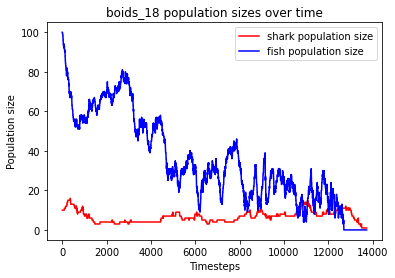

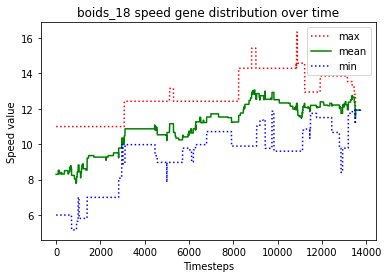

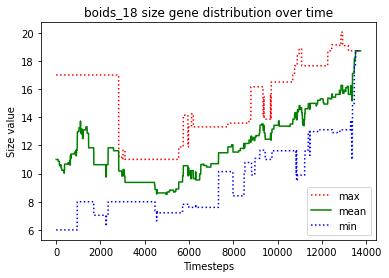

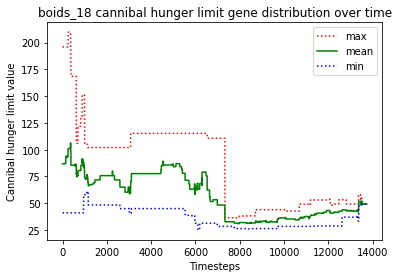

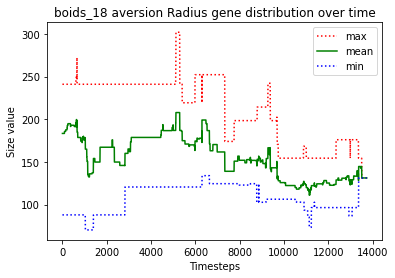

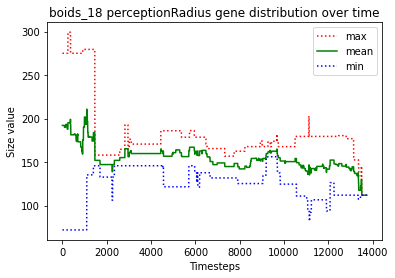

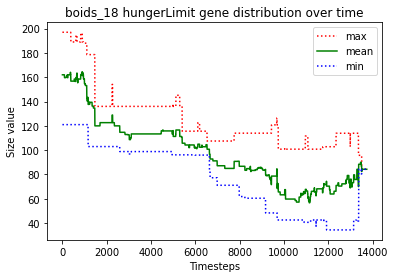





						BOIDS_19

predator_4 just gave birth to predator_10
predator_0 just gave birth to predator_11
predator_4 just gave birth to predator_12
predator_4 just gave birth to predator_13
predator_5 just gave birth to predator_14
predator_1 just gave birth to predator_15
predator_13 starved to death
predator_4 starved to death
predator_2 ate the carcass of predator_13_carcass
predator_2 ate the carcass of predator_4_carcass
predator_11 just gave birth to predator_16
predator_10 just gave birth to predator_17
predator_16 just gave birth to predator_18
predator_6 just gave birth to predator_19
predator_19 killed predator_7
predator_18 just gave birth to predator_20
predator_19 just gave birth to predator_21
predator_17 starved to death
predator_20 starved to death
predator_12 starved to death
predator_18 ate the carcass of predator_20_carcass
predator_10 starved to death
predator_16 killed predator_8
predator_5 ate the carcass of predator_12_carcass
predator_21 just gave birth to predato

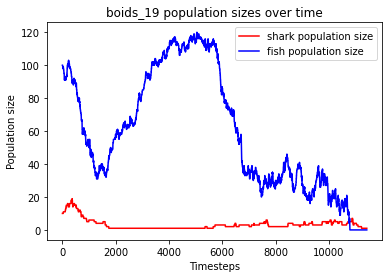

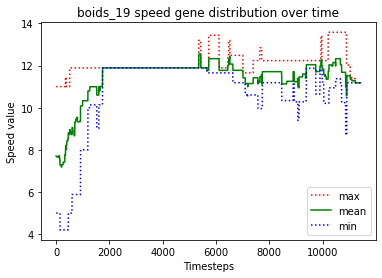

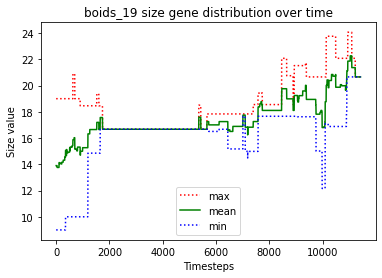

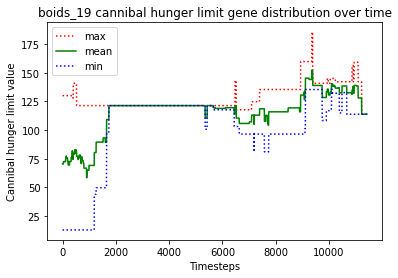

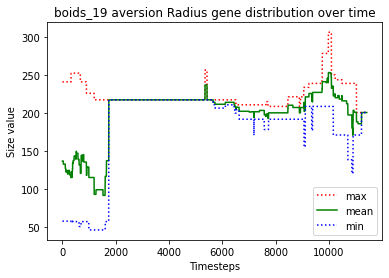

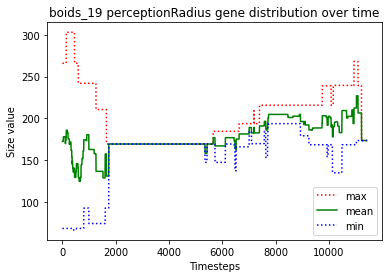

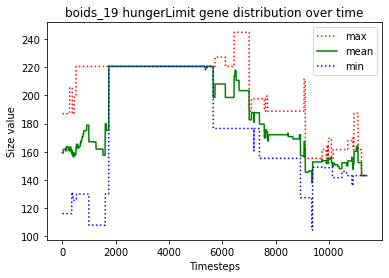





						BOIDS_20

predator_2 just gave birth to predator_10
predator_4 just gave birth to predator_11
predator_4 just gave birth to predator_12
predator_12 just gave birth to predator_13
predator_3 just gave birth to predator_14
predator_13 starved to death
predator_12 starved to death
predator_4 ate the carcass of predator_12_carcass
predator_4 ate the carcass of predator_13_carcass
predator_1 just gave birth to predator_15
predator_14 just gave birth to predator_16
predator_11 starved to death
predator_14 starved to death
predator_16 starved to death
predator_10 ate the carcass of predator_14_carcass
predator_1 ate the carcass of predator_16_carcass
predator_4 ate the carcass of predator_11_carcass
predator_0 just gave birth to predator_17
predator_5 just gave birth to predator_18
predator_17 starved to death
predator_0 starved to death
predator_6 starved to death
predator_5 ate the carcass of predator_6_carcass
predator_10 ate the carcass of predator_17_carcass
predator_1 starved 

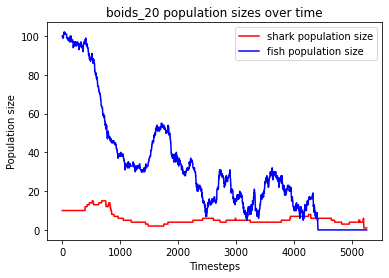

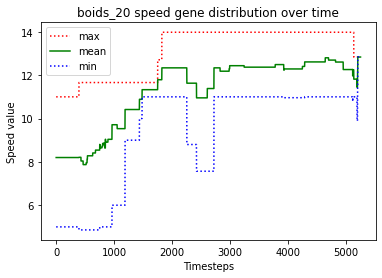

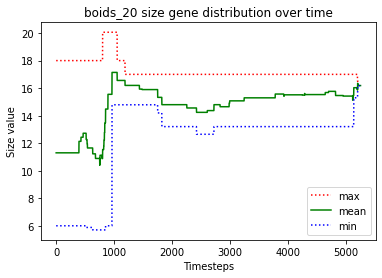

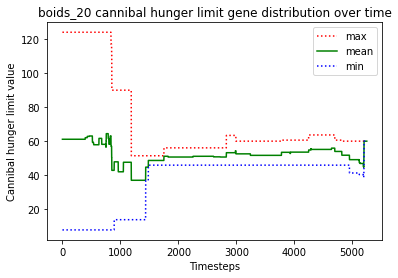

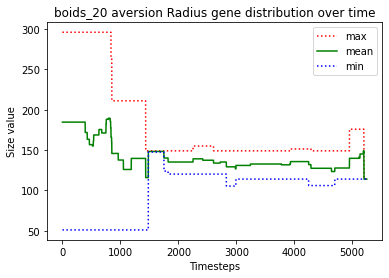

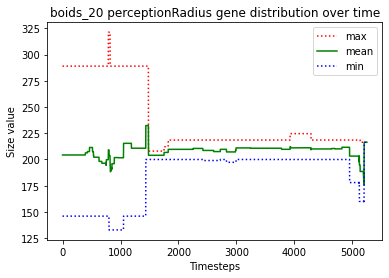

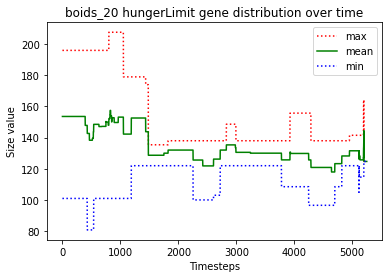





						BOIDS_21

predator_0 just gave birth to predator_10
predator_6 just gave birth to predator_11
predator_2 just gave birth to predator_12
predator_11 just gave birth to predator_13
predator_13 starved to death
predator_11 starved to death
predator_2 ate the carcass of predator_13_carcass
predator_0 ate the carcass of predator_11_carcass
predator_4 just gave birth to predator_14
predator_6 starved to death
predator_1 ate the carcass of predator_6_carcass
predator_7 just gave birth to predator_15
predator_12 starved to death
predator_0 ate the carcass of predator_12_carcass
predator_10 starved to death
predator_1 ate the carcass of predator_10_carcass
predator_0 starved to death
predator_2 just gave birth to predator_16
predator_15 starved to death
predator_16 just gave birth to predator_17
predator_4 ate the carcass of predator_0_carcass
predator_9 ate the carcass of predator_15_carcass
predator_14 starved to death
predator_16 ate the carcass of predator_14_carcass
predator_17 s

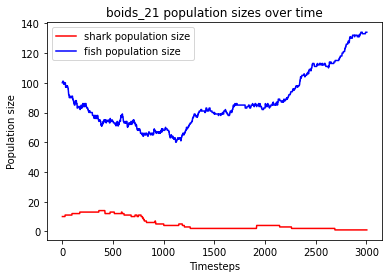

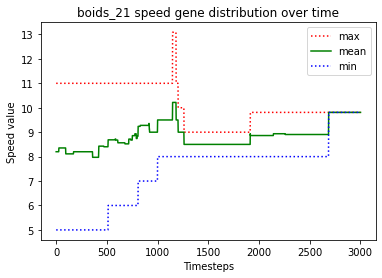

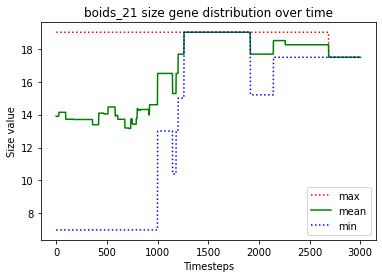

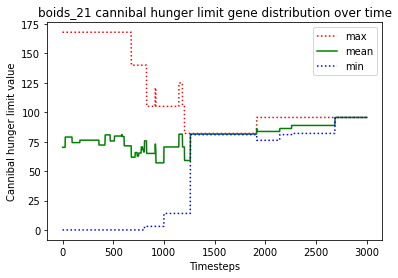

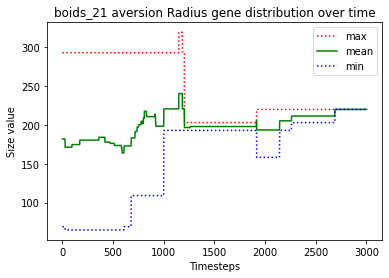

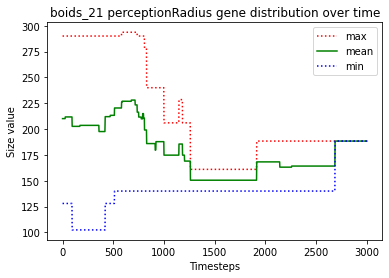

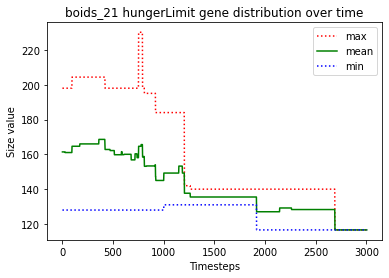





						BOIDS_22

predator_7 just gave birth to predator_10
predator_1 just gave birth to predator_11
predator_5 just gave birth to predator_12
predator_12 just gave birth to predator_13
predator_13 killed predator_10
predator_12 killed predator_7
predator_11 just gave birth to predator_14
predator_6 just gave birth to predator_15
predator_8 just gave birth to predator_16
predator_13 just gave birth to predator_17
predator_13 starved to death
predator_17 starved to death
predator_9 ate the carcass of predator_17_carcass
predator_12 ate the carcass of predator_13_carcass
predator_9 just gave birth to predator_18
predator_14 starved to death
predator_2 killed predator_3
predator_5 ate the carcass of predator_14_carcass
predator_11 starved to death
predator_16 ate the carcass of predator_11_carcass
predator_18 killed predator_0
predator_8 starved to death
predator_12 ate the carcass of predator_8_carcass
predator_16 starved to death
predator_12 ate the carcass of predator_16_carcass
pre

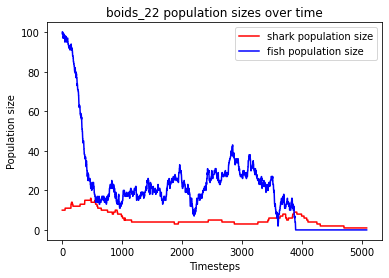

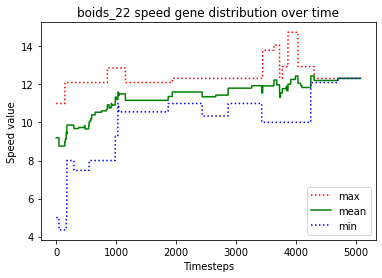

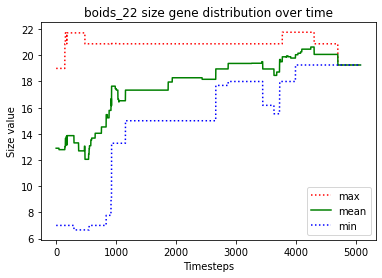

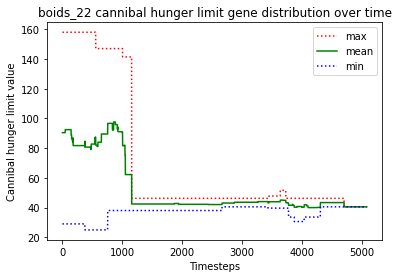

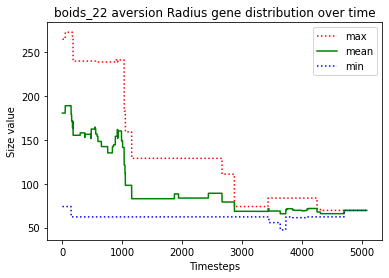

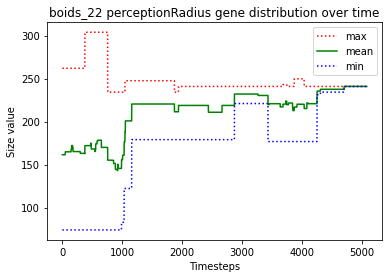

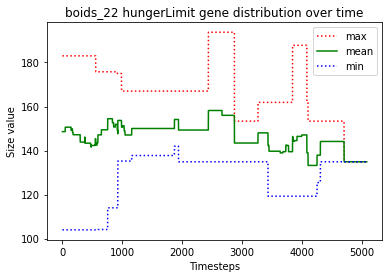





						BOIDS_23

predator_4 just gave birth to predator_10
predator_2 just gave birth to predator_11
predator_7 just gave birth to predator_12
predator_10 just gave birth to predator_13
predator_1 just gave birth to predator_14
predator_12 just gave birth to predator_15
predator_13 starved to death
predator_4 ate the carcass of predator_13_carcass
predator_15 killed predator_4
predator_15 killed predator_2
predator_10 starved to death
predator_3 ate the carcass of predator_10_carcass
predator_12 just gave birth to predator_16
predator_9 just gave birth to predator_17
predator_15 just gave birth to predator_18
predator_16 killed predator_11
predator_18 killed predator_1
predator_18 killed predator_14
predator_12 starved to death
predator_15 ate the carcass of predator_12_carcass
predator_3 just gave birth to predator_19
predator_18 killed predator_8
predator_6 just gave birth to predator_20
predator_18 killed predator_17
predator_20 just gave birth to predator_21
predator_6 just gave

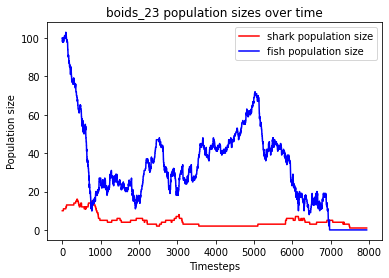

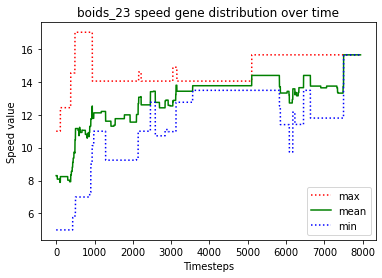

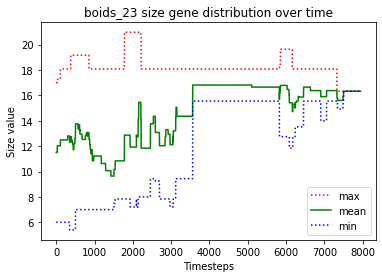

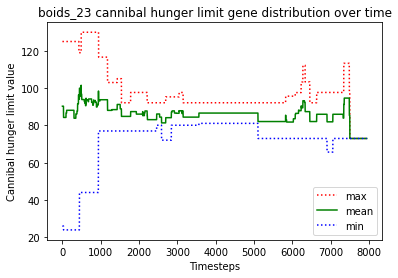

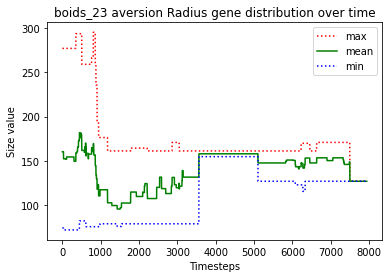

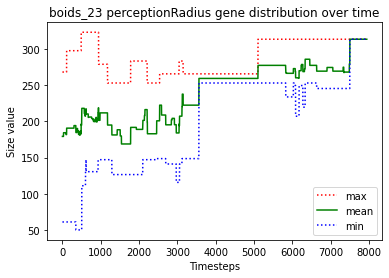

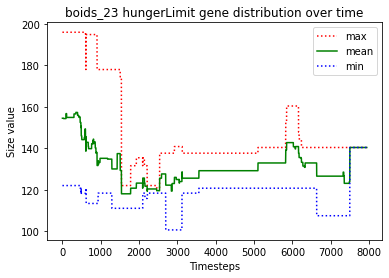





						BOIDS_24

predator_5 just gave birth to predator_10
predator_5 just gave birth to predator_11
predator_7 just gave birth to predator_12
predator_8 just gave birth to predator_13
predator_2 just gave birth to predator_14
predator_3 just gave birth to predator_15
predator_13 just gave birth to predator_16
predator_11 starved to death
predator_5 ate the carcass of predator_11_carcass
predator_16 starved to death
predator_13 ate the carcass of predator_16_carcass
predator_5 starved to death
predator_8 ate the carcass of predator_5_carcass
predator_13 starved to death
predator_4 ate the carcass of predator_13_carcass
predator_10 just gave birth to predator_17
predator_3 starved to death
predator_17 starved to death
predator_15 starved to death
predator_8 ate the carcass of predator_3_carcass
predator_10 starved to death
predator_7 ate the carcass of predator_15_carcass
predator_9 ate the carcass of predator_10_carcass
predator_6 ate the carcass of predator_17_carcass
predator_8 st

predator_63 starved to death
predator_62 ate the carcass of predator_63_carcass
predator_66 just gave birth to predator_67
predator_64 starved to death
predator_67 ate the carcass of predator_64_carcass
predator_9 starved to death
predator_67 ate the carcass of predator_9_carcass
predator_66 starved to death
predator_62 starved to death
predator_65 ate the carcass of predator_66_carcass
predator_67 ate the carcass of predator_62_carcass
predator_55 starved to death
predator_65 just gave birth to predator_68
predator_65 just gave birth to predator_69
predator_68 killed predator_69
predator_67 ate the carcass of predator_55_carcass
predator_65 starved to death
predator_67 ate the carcass of predator_65_carcass
predator_67 just gave birth to predator_70
predator_68 just gave birth to predator_71
predator_67 just gave birth to predator_72
predator_68 just gave birth to predator_73
predator_68 starved to death
predator_73 just gave birth to predator_74
predator_73 ate the carcass of predato

predator_119 just gave birth to predator_127
predator_125 killed predator_127
no fish to move
predator_125 starved to death
predator_114 starved to death
predator_115 starved to death
predator_126 ate the carcass of predator_125_carcass
predator_126 just gave birth to predator_128
predator_128 starved to death
predator_126 starved to death
predator_119 ate the carcass of predator_126_carcass
predator_119 just gave birth to predator_129
predator_119 ate the carcass of predator_114_carcass
predator_129 starved to death
predator_119 starved to death


finished this run because predators went extinct
Fish left: 0
Sharks left: 0
Dead sharks: 130
Timesteps passed: 36279
Fish went extinct at timestep 35354
Sharks went extinct at timestep 36279


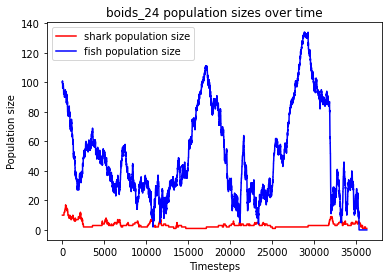

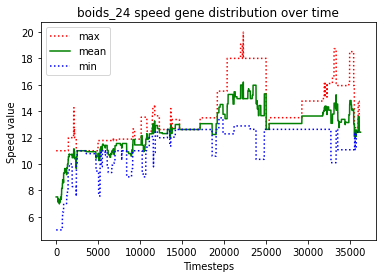

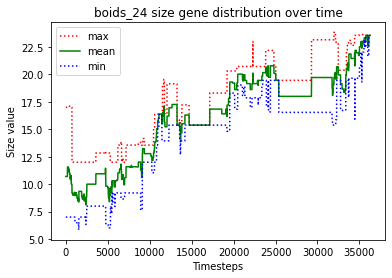

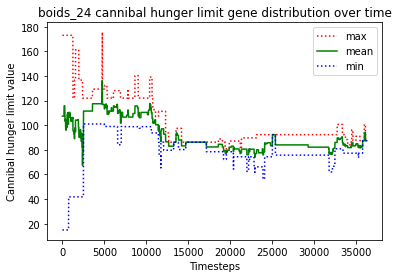

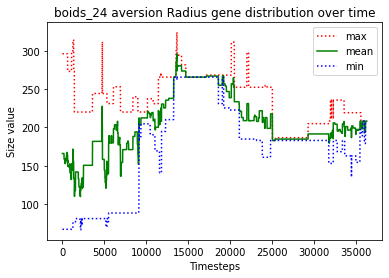

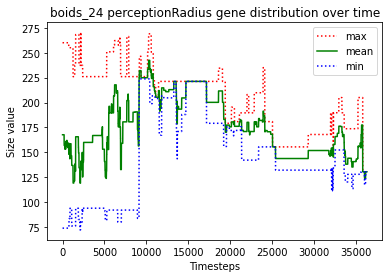

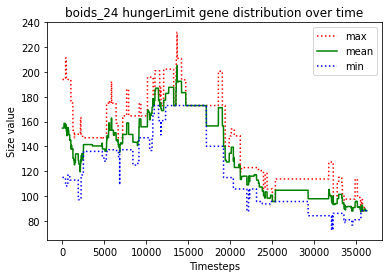





						BOIDS_25

predator_9 just gave birth to predator_10
predator_9 just gave birth to predator_11
predator_6 just gave birth to predator_12
predator_3 just gave birth to predator_13
predator_6 just gave birth to predator_14
predator_9 starved to death
predator_12 ate the carcass of predator_9_carcass
predator_5 just gave birth to predator_15
predator_2 just gave birth to predator_16
predator_2 just gave birth to predator_17
predator_13 just gave birth to predator_18
predator_11 starved to death
predator_13 killed predator_2
predator_1 ate the carcass of predator_11_carcass
predator_17 just gave birth to predator_19
predator_10 starved to death
predator_19 starved to death
predator_17 starved to death
predator_6 ate the carcass of predator_10_carcass
predator_0 ate the carcass of predator_19_carcass
predator_0 ate the carcass of predator_17_carcass
predator_15 starved to death
predator_13 ate the carcass of predator_15_carcass
predator_14 starved to death
predator_5 starved to dea

predator_59 ate the carcass of predator_63_carcass
predator_39 just gave birth to predator_65
predator_65 just gave birth to predator_66
predator_58 just gave birth to predator_67
predator_67 just gave birth to predator_68
predator_68 killed predator_65
predator_59 just gave birth to predator_69
predator_68 killed predator_66
predator_67 killed predator_39
no fish to move
predator_68 just gave birth to predator_70
predator_67 starved to death
predator_58 starved to death
predator_68 starved to death
predator_59 ate the carcass of predator_68_carcass
predator_70 starved to death
predator_59 ate the carcass of predator_58_carcass
predator_59 ate the carcass of predator_67_carcass
predator_69 just gave birth to predator_71
predator_71 starved to death
predator_69 starved to death
predator_59 ate the carcass of predator_71_carcass
predator_59 ate the carcass of predator_69_carcass
predator_59 ate the carcass of predator_70_carcass
predator_59 starved to death


finished this run because pr

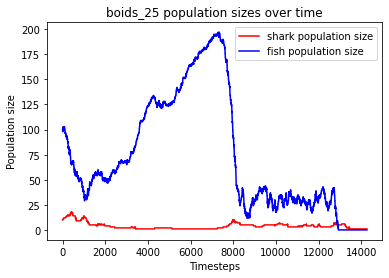

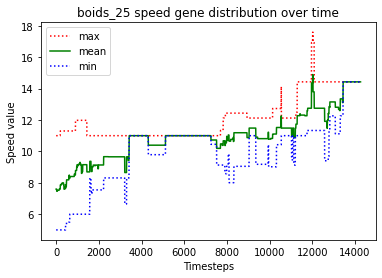

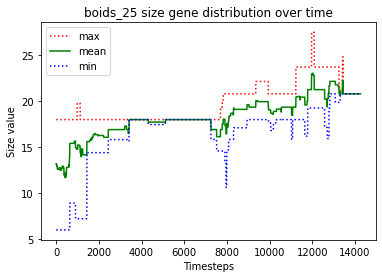

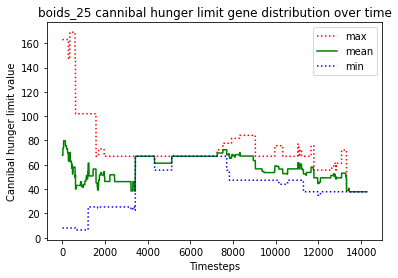

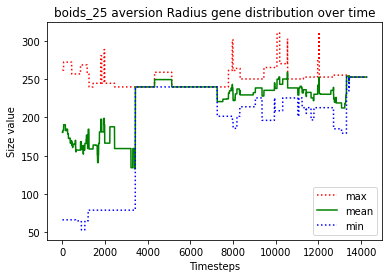

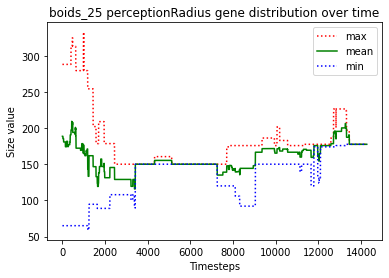

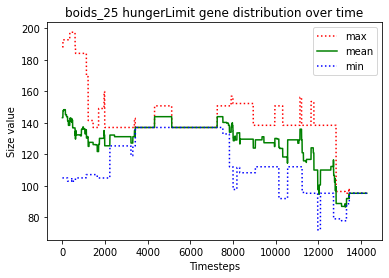





						BOIDS_26

predator_5 just gave birth to predator_10
predator_1 just gave birth to predator_11
predator_2 just gave birth to predator_12
predator_8 just gave birth to predator_13
predator_4 just gave birth to predator_14
predator_1 just gave birth to predator_15
predator_10 starved to death
predator_1 starved to death
predator_12 ate the carcass of predator_10_carcass
predator_15 starved to death
predator_0 ate the carcass of predator_1_carcass
predator_0 ate the carcass of predator_15_carcass
predator_11 just gave birth to predator_16
predator_5 starved to death
predator_16 starved to death
predator_11 starved to death
predator_0 ate the carcass of predator_16_carcass
predator_0 ate the carcass of predator_11_carcass
predator_8 ate the carcass of predator_5_carcass
predator_12 starved to death
predator_2 starved to death
predator_0 ate the carcass of predator_2_carcass
predator_14 starved to death
predator_6 starved to death
predator_9 just gave birth to predator_17
predator_

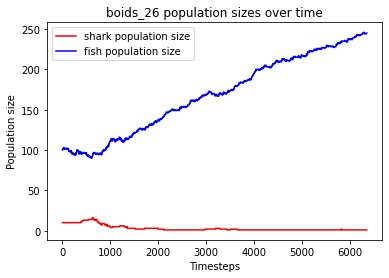

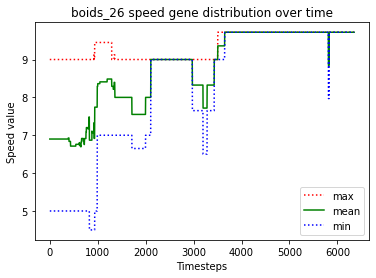

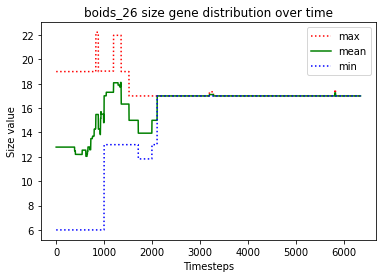

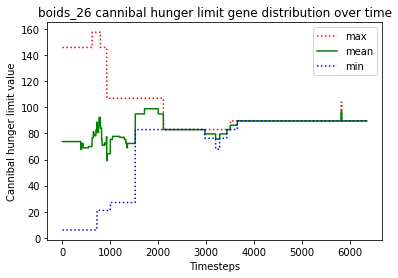

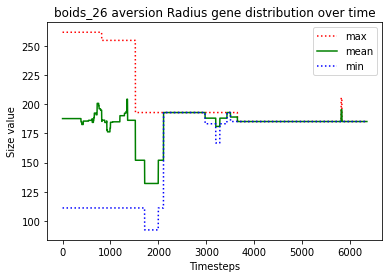

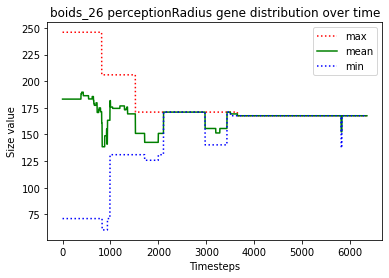

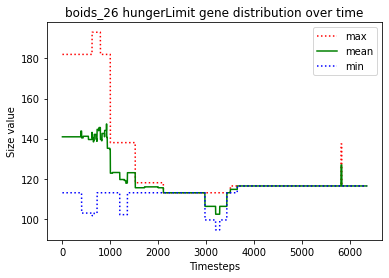





						BOIDS_27

predator_2 just gave birth to predator_10
predator_0 just gave birth to predator_11
predator_11 just gave birth to predator_12
predator_11 just gave birth to predator_13
predator_13 just gave birth to predator_14
predator_13 starved to death
predator_11 ate the carcass of predator_13_carcass
predator_14 starved to death
predator_0 ate the carcass of predator_14_carcass
predator_12 starved to death
predator_9 ate the carcass of predator_12_carcass
predator_11 starved to death
predator_0 ate the carcass of predator_11_carcass
predator_1 just gave birth to predator_15
predator_2 starved to death
predator_9 ate the carcass of predator_2_carcass
predator_10 starved to death
predator_6 just gave birth to predator_16
predator_7 just gave birth to predator_17
predator_0 ate the carcass of predator_10_carcass
predator_7 just gave birth to predator_18
predator_18 just gave birth to predator_19
predator_15 starved to death
predator_8 just gave birth to predator_20
predator_0 a

predator_64 starved to death
predator_62 ate the carcass of predator_64_carcass
predator_63 just gave birth to predator_65
predator_62 just gave birth to predator_66
predator_62 just gave birth to predator_67
predator_65 killed predator_66
predator_62 starved to death
predator_67 starved to death
predator_63 ate the carcass of predator_67_carcass
predator_63 just gave birth to predator_68
predator_68 starved to death
predator_63 ate the carcass of predator_62_carcass
predator_63 starved to death
predator_65 ate the carcass of predator_63_carcass
predator_65 just gave birth to predator_69
predator_65 ate the carcass of predator_68_carcass
predator_65 starved to death
predator_69 ate the carcass of predator_65_carcass
predator_69 just gave birth to predator_70
predator_70 just gave birth to predator_71
predator_69 just gave birth to predator_72
predator_69 just gave birth to predator_73
predator_72 just gave birth to predator_74
predator_74 just gave birth to predator_75
predator_70 star

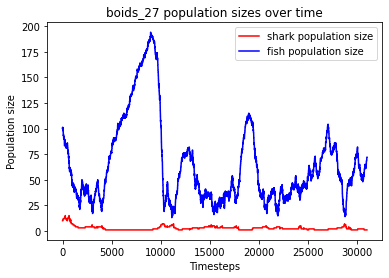

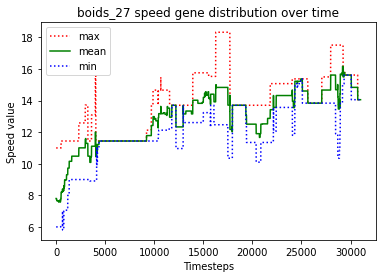

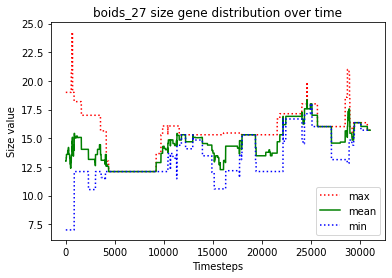

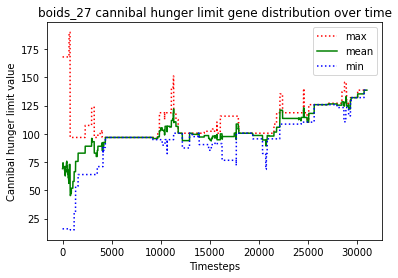

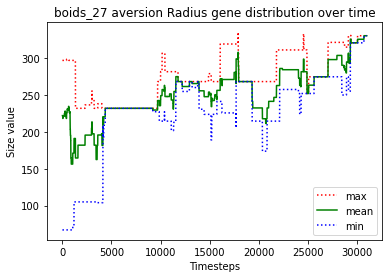

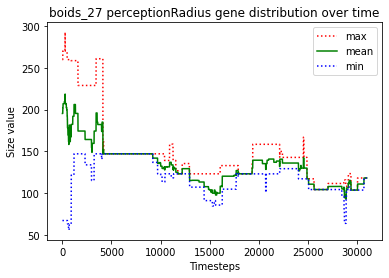

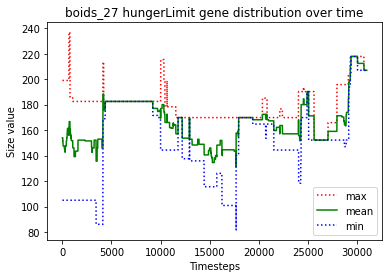





						BOIDS_28

predator_6 just gave birth to predator_10
predator_0 just gave birth to predator_11
predator_1 just gave birth to predator_12
predator_3 just gave birth to predator_13
predator_13 just gave birth to predator_14
predator_12 just gave birth to predator_15
predator_0 just gave birth to predator_16
predator_13 starved to death
predator_14 starved to death
predator_12 ate the carcass of predator_13_carcass
predator_7 ate the carcass of predator_14_carcass
predator_10 just gave birth to predator_17
predator_12 killed predator_3
predator_10 starved to death
predator_4 ate the carcass of predator_10_carcass
predator_17 starved to death
predator_6 starved to death
predator_16 ate the carcass of predator_17_carcass
predator_2 ate the carcass of predator_6_carcass
predator_1 just gave birth to predator_18
predator_11 killed predator_9
predator_15 starved to death
predator_16 just gave birth to predator_19
predator_4 starved to death
predator_1 ate the carcass of predator_4_car

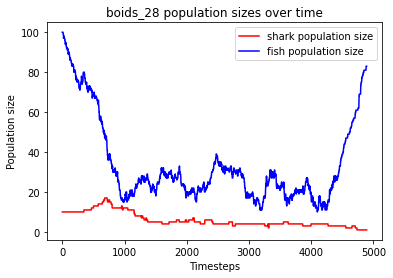

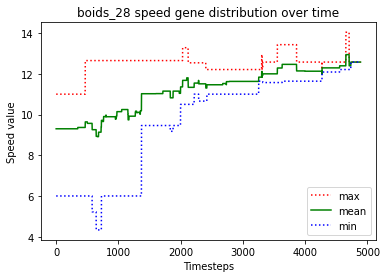

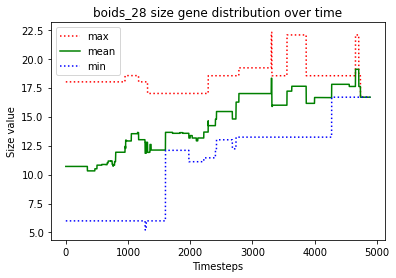

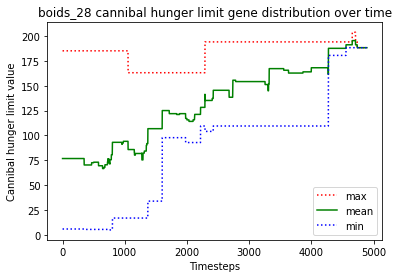

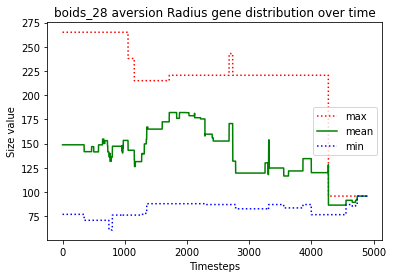

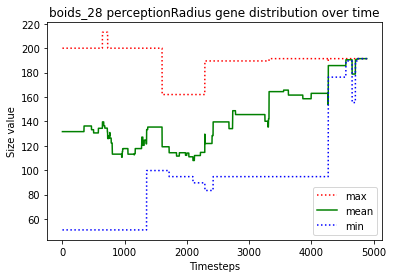

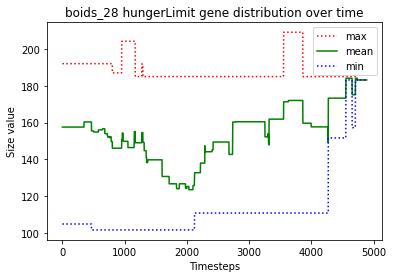





						BOIDS_29

predator_2 just gave birth to predator_10
predator_10 just gave birth to predator_11
predator_7 just gave birth to predator_12
predator_12 just gave birth to predator_13
predator_8 just gave birth to predator_14
predator_10 starved to death
predator_9 ate the carcass of predator_10_carcass
predator_13 starved to death
predator_4 ate the carcass of predator_13_carcass
predator_11 starved to death
predator_9 ate the carcass of predator_11_carcass
predator_12 starved to death
predator_7 ate the carcass of predator_12_carcass
predator_2 starved to death
predator_4 ate the carcass of predator_2_carcass
predator_7 just gave birth to predator_15
predator_7 starved to death
predator_15 starved to death
predator_3 ate the carcass of predator_7_carcass
predator_0 ate the carcass of predator_15_carcass
predator_0 just gave birth to predator_16
predator_9 just gave birth to predator_17
predator_17 just gave birth to predator_18
predator_4 just gave birth to predator_19
predator

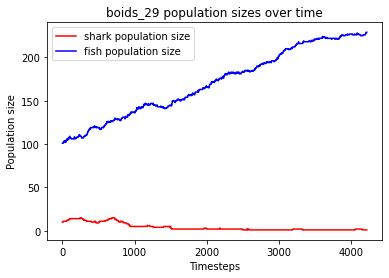

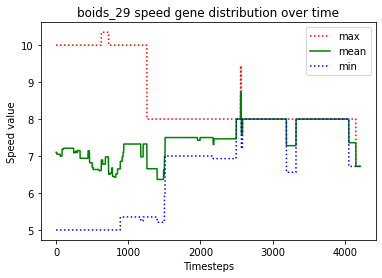

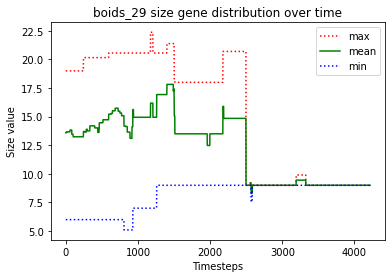

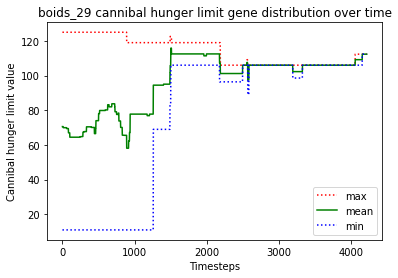

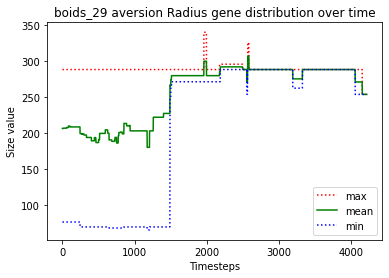

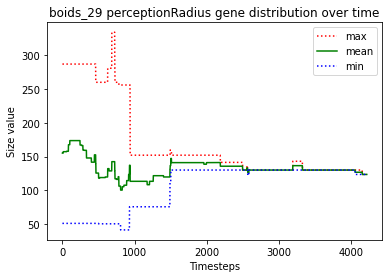

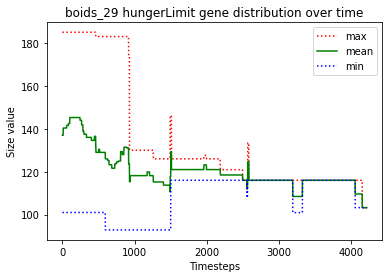





						BOIDS_30

predator_3 just gave birth to predator_10
predator_10 just gave birth to predator_11
predator_7 just gave birth to predator_12
predator_0 just gave birth to predator_13
predator_2 just gave birth to predator_14
predator_5 just gave birth to predator_15
predator_1 just gave birth to predator_16
predator_2 just gave birth to predator_17
predator_17 starved to death
predator_2 starved to death
predator_5 ate the carcass of predator_17_carcass
predator_4 ate the carcass of predator_2_carcass
predator_4 just gave birth to predator_18
predator_15 starved to death
predator_0 ate the carcass of predator_15_carcass
predator_0 just gave birth to predator_19
predator_13 starved to death
predator_19 just gave birth to predator_20
predator_7 starved to death
predator_5 starved to death
predator_19 ate the carcass of predator_13_carcass
predator_1 starved to death
predator_6 ate the carcass of predator_7_carcass
predator_16 starved to death
predator_6 ate the carcass of predator_

predator_56 ate the carcass of predator_65_carcass
predator_56 ate the carcass of predator_67_carcass
predator_60 starved to death
predator_64 just gave birth to predator_68
predator_68 starved to death
predator_64 starved to death
predator_63 ate the carcass of predator_64_carcass
predator_63 ate the carcass of predator_68_carcass
predator_63 ate the carcass of predator_60_carcass
predator_63 starved to death
predator_56 ate the carcass of predator_63_carcass
predator_66 starved to death
predator_56 just gave birth to predator_69
predator_61 ate the carcass of predator_66_carcass
predator_56 just gave birth to predator_70
predator_70 just gave birth to predator_71
predator_71 starved to death
predator_61 ate the carcass of predator_71_carcass
predator_70 starved to death
predator_61 just gave birth to predator_72
predator_72 ate the carcass of predator_70_carcass
predator_61 just gave birth to predator_73
predator_72 just gave birth to predator_74
predator_72 just gave birth to predat

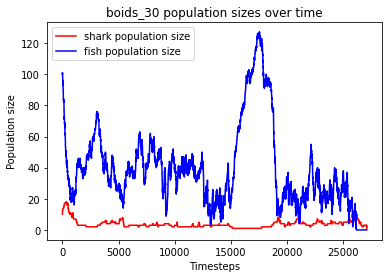

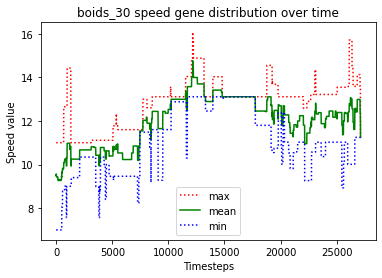

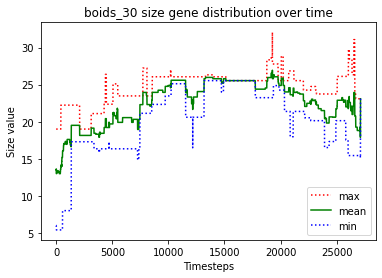

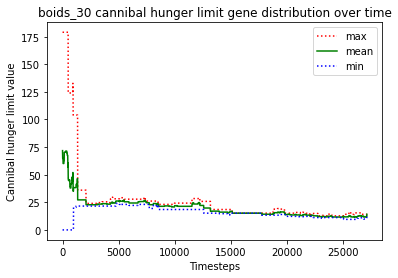

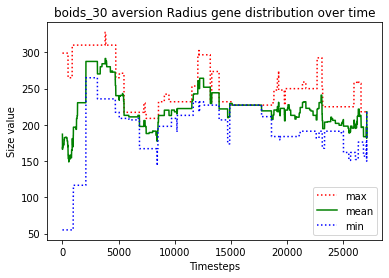

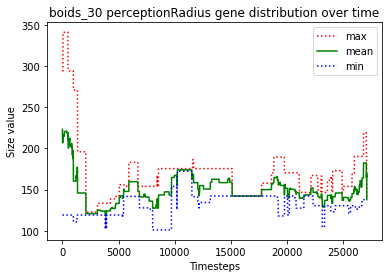

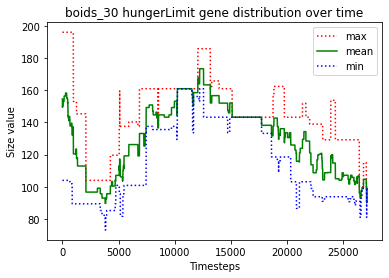





						BOIDS_31

predator_2 just gave birth to predator_10
predator_4 just gave birth to predator_11
predator_4 just gave birth to predator_12
predator_2 just gave birth to predator_13
predator_10 just gave birth to predator_14
predator_13 starved to death
predator_6 just gave birth to predator_15
predator_14 just gave birth to predator_16
predator_15 killed predator_9
predator_1 ate the carcass of predator_13_carcass
predator_2 starved to death
predator_5 just gave birth to predator_17
predator_14 starved to death
predator_5 ate the carcass of predator_2_carcass
predator_16 starved to death
predator_10 starved to death
predator_17 ate the carcass of predator_10_carcass
predator_1 ate the carcass of predator_16_carcass
predator_3 just gave birth to predator_18
predator_1 ate the carcass of predator_14_carcass
predator_4 starved to death
predator_11 ate the carcass of predator_4_carcass
predator_15 killed predator_3
predator_12 starved to death
predator_6 ate the carcass of predator_

predator_63 starved to death
predator_61 ate the carcass of predator_63_carcass
predator_64 just gave birth to predator_68
predator_53 starved to death
predator_61 starved to death
predator_48 ate the carcass of predator_53_carcass
predator_48 ate the carcass of predator_61_carcass
predator_64 just gave birth to predator_69
predator_68 just gave birth to predator_70
predator_70 just gave birth to predator_71
predator_69 just gave birth to predator_72
predator_69 starved to death
predator_72 starved to death
predator_70 ate the carcass of predator_72_carcass
predator_70 just gave birth to predator_73
predator_71 ate the carcass of predator_69_carcass
predator_68 just gave birth to predator_74
predator_70 starved to death
predator_73 starved to death
predator_48 just gave birth to predator_75
predator_68 ate the carcass of predator_73_carcass
predator_74 just gave birth to predator_76
predator_74 ate the carcass of predator_70_carcass
predator_74 just gave birth to predator_77
predator_4

predator_120 just gave birth to predator_126
predator_116 just gave birth to predator_127
predator_127 just gave birth to predator_128
predator_126 just gave birth to predator_129
predator_127 ate the carcass of predator_95_carcass
predator_128 just gave birth to predator_130
predator_120 just gave birth to predator_131
predator_130 just gave birth to predator_132
predator_126 just gave birth to predator_133
predator_126 just gave birth to predator_134
predator_130 starved to death
predator_126 just gave birth to predator_135
predator_132 starved to death
predator_120 starved to death
predator_127 ate the carcass of predator_130_carcass
predator_134 starved to death
predator_129 starved to death
predator_116 ate the carcass of predator_132_carcass
predator_127 ate the carcass of predator_129_carcass
predator_114 ate the carcass of predator_134_carcass
predator_135 starved to death
predator_133 starved to death
predator_131 starved to death
predator_126 just gave birth to predator_136
p

predator_168 just gave birth to predator_185
predator_116 just gave birth to predator_186
predator_116 killed predator_186
predator_185 just gave birth to predator_187
predator_178 just gave birth to predator_188
predator_178 just gave birth to predator_189
predator_188 killed predator_189
predator_183 killed predator_184
predator_185 starved to death
predator_183 ate the carcass of predator_185_carcass
predator_187 starved to death
predator_178 ate the carcass of predator_187_carcass
predator_116 starved to death
predator_178 ate the carcass of predator_116_carcass
predator_188 starved to death
predator_168 ate the carcass of predator_188_carcass
predator_183 just gave birth to predator_190
predator_168 just gave birth to predator_191
predator_190 just gave birth to predator_192
predator_191 just gave birth to predator_193
predator_193 starved to death
predator_191 starved to death
predator_190 ate the carcass of predator_191_carcass
predator_192 ate the carcass of predator_193_carcas

predator_237 just gave birth to predator_247
predator_241 killed predator_247
predator_244 just gave birth to predator_248
predator_244 killed predator_248
predator_225 just gave birth to predator_249
predator_241 killed predator_249
predator_246 starved to death
predator_225 ate the carcass of predator_246_carcass
predator_241 just gave birth to predator_250
predator_250 killed predator_237
predator_241 just gave birth to predator_251
predator_244 just gave birth to predator_252
predator_250 starved to death
predator_252 ate the carcass of predator_250_carcass
predator_244 just gave birth to predator_253
predator_244 killed predator_252
predator_251 just gave birth to predator_254
predator_254 starved to death
predator_251 starved to death
predator_253 ate the carcass of predator_251_carcass
predator_244 ate the carcass of predator_254_carcass
predator_241 just gave birth to predator_255
predator_241 starved to death
predator_255 ate the carcass of predator_241_carcass
predator_253 ju

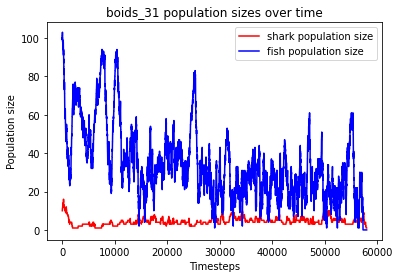

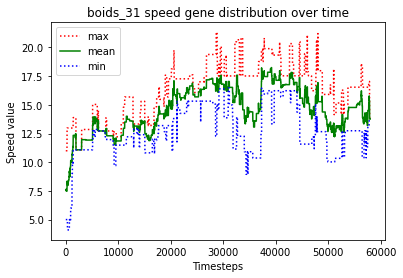

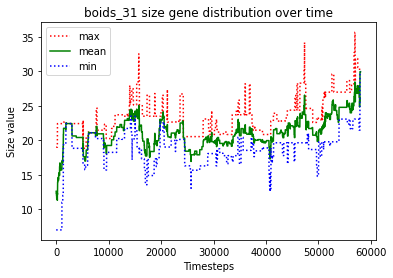

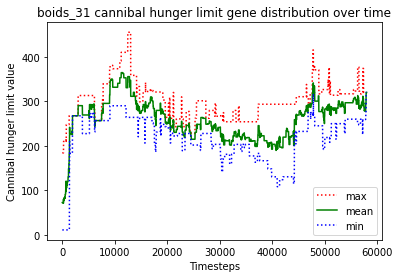

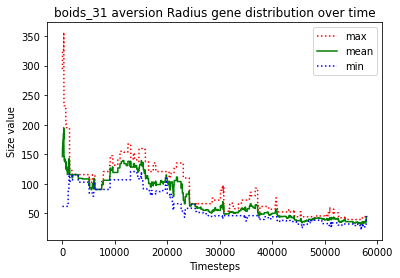

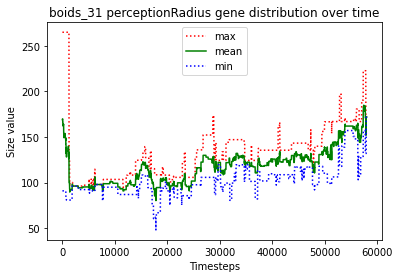

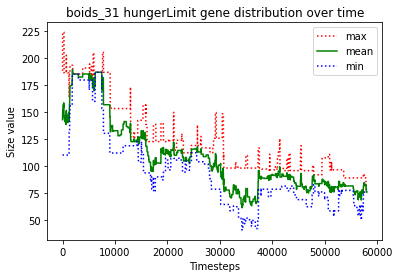





						BOIDS_32

predator_8 just gave birth to predator_10
predator_1 just gave birth to predator_11
predator_11 just gave birth to predator_12
predator_10 starved to death
predator_4 ate the carcass of predator_10_carcass
predator_8 just gave birth to predator_13
predator_8 just gave birth to predator_14
predator_9 just gave birth to predator_15
predator_11 starved to death
predator_0 ate the carcass of predator_11_carcass
predator_12 just gave birth to predator_16
predator_16 starved to death
predator_12 starved to death
predator_3 ate the carcass of predator_12_carcass
predator_8 ate the carcass of predator_16_carcass
predator_0 just gave birth to predator_17
predator_14 starved to death
predator_8 starved to death
predator_3 ate the carcass of predator_14_carcass
predator_7 ate the carcass of predator_8_carcass
predator_1 starved to death
predator_6 ate the carcass of predator_1_carcass
predator_13 starved to death
predator_2 ate the carcass of predator_13_carcass
predator_2 jus

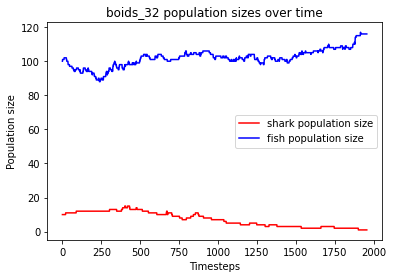

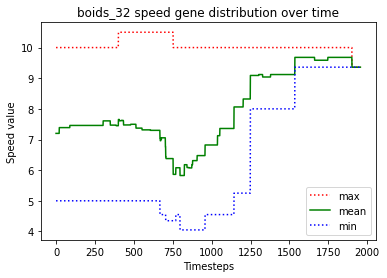

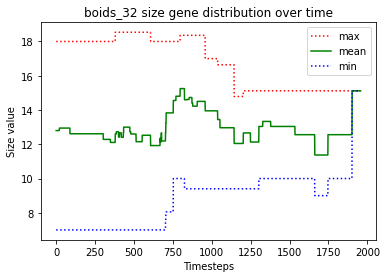

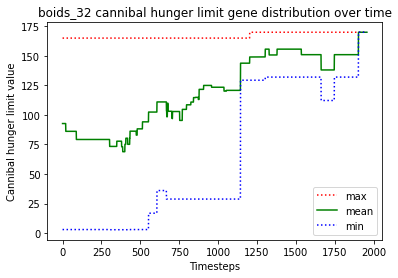

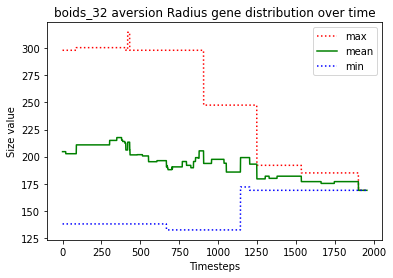

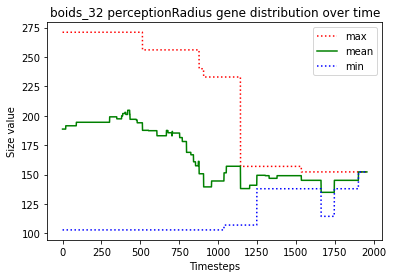

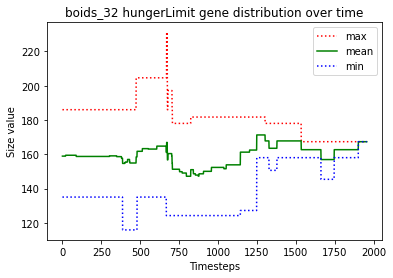





						BOIDS_33

predator_3 just gave birth to predator_10
predator_2 just gave birth to predator_11
predator_6 just gave birth to predator_12
predator_2 starved to death
predator_8 ate the carcass of predator_2_carcass
predator_3 starved to death
predator_8 just gave birth to predator_13
predator_6 starved to death
predator_12 starved to death
predator_4 ate the carcass of predator_12_carcass
predator_1 ate the carcass of predator_3_carcass
predator_0 ate the carcass of predator_6_carcass
predator_4 just gave birth to predator_14
predator_9 just gave birth to predator_15
predator_11 starved to death
predator_0 just gave birth to predator_16
predator_10 starved to death
predator_13 ate the carcass of predator_11_carcass
predator_8 just gave birth to predator_17
predator_13 ate the carcass of predator_10_carcass
predator_9 starved to death
predator_4 ate the carcass of predator_9_carcass
predator_16 starved to death
predator_0 ate the carcass of predator_16_carcass
predator_15 starve

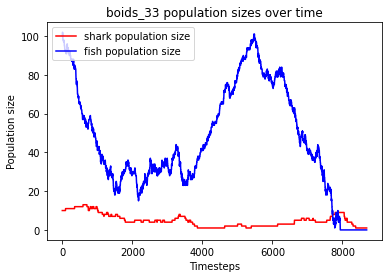

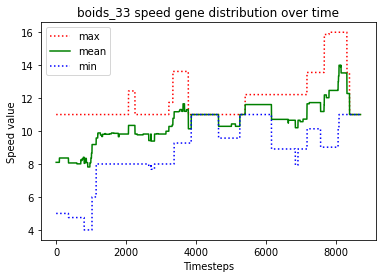

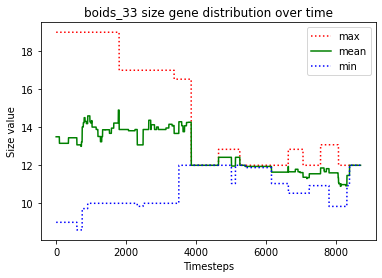

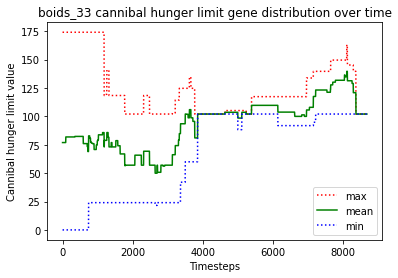

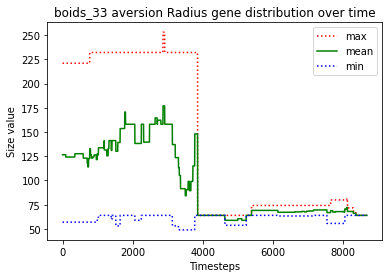

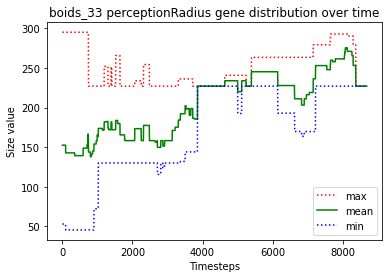

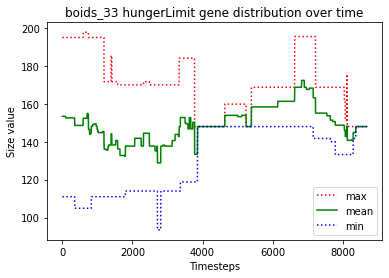





						BOIDS_34

predator_6 just gave birth to predator_10
predator_0 just gave birth to predator_11
predator_9 just gave birth to predator_12
predator_11 just gave birth to predator_13
predator_11 starved to death
predator_13 starved to death
predator_4 ate the carcass of predator_11_carcass
predator_4 ate the carcass of predator_13_carcass
predator_0 starved to death
predator_5 ate the carcass of predator_0_carcass
predator_4 just gave birth to predator_14
predator_2 just gave birth to predator_15
predator_6 just gave birth to predator_16
predator_14 just gave birth to predator_17
predator_12 killed predator_5
predator_6 starved to death
predator_16 starved to death
predator_4 ate the carcass of predator_16_carcass
predator_1 ate the carcass of predator_6_carcass
predator_9 just gave birth to predator_18
predator_8 just gave birth to predator_19
predator_17 starved to death
predator_14 starved to death
predator_9 starved to death
predator_18 starved to death
predator_1 ate the car

predator_62 starved to death
predator_69 ate the carcass of predator_62_carcass
predator_68 killed predator_69
predator_66 killed predator_49
predator_70 starved to death
predator_68 just gave birth to predator_71
predator_71 starved to death
predator_66 starved to death
predator_68 just gave birth to predator_72
predator_68 ate the carcass of predator_66_carcass
predator_72 starved to death
predator_68 ate the carcass of predator_71_carcass
predator_68 ate the carcass of predator_72_carcass
predator_58 ate the carcass of predator_70_carcass
predator_68 just gave birth to predator_73
predator_58 just gave birth to predator_74
predator_73 just gave birth to predator_75
predator_68 just gave birth to predator_76
predator_76 just gave birth to predator_77
predator_77 just gave birth to predator_78
predator_76 killed predator_74
predator_76 just gave birth to predator_79
predator_78 starved to death
predator_77 just gave birth to predator_80
predator_58 ate the carcass of predator_78_carca

predator_131 starved to death
predator_119 ate the carcass of predator_131_carcass
predator_125 starved to death
predator_128 starved to death
predator_130 ate the carcass of predator_128_carcass
predator_120 starved to death
predator_119 just gave birth to predator_132
predator_116 just gave birth to predator_133
predator_132 starved to death
predator_127 ate the carcass of predator_125_carcass
predator_130 ate the carcass of predator_132_carcass
predator_133 just gave birth to predator_134
predator_127 ate the carcass of predator_120_carcass
predator_119 starved to death
predator_127 ate the carcass of predator_119_carcass
predator_116 just gave birth to predator_135
predator_116 starved to death
predator_135 starved to death
predator_130 ate the carcass of predator_116_carcass
predator_134 ate the carcass of predator_135_carcass
predator_133 starved to death
predator_134 ate the carcass of predator_133_carcass
predator_130 just gave birth to predator_136
predator_134 just gave birth

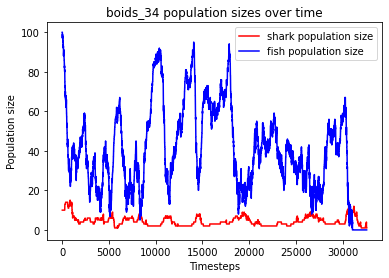

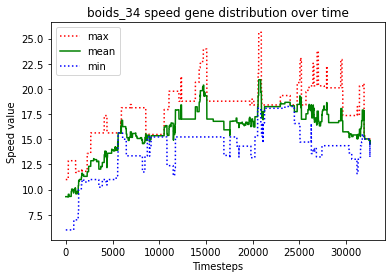

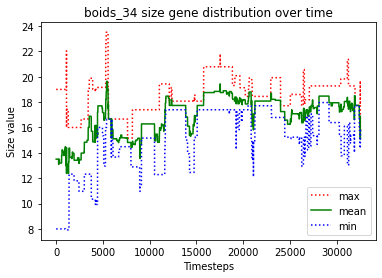

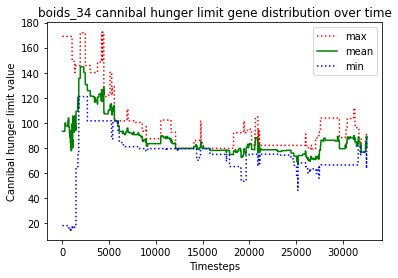

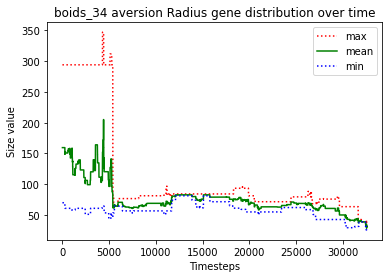

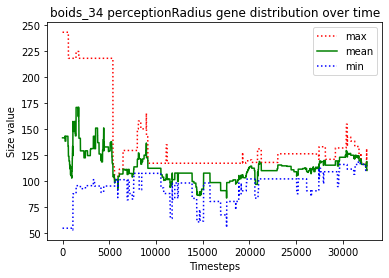

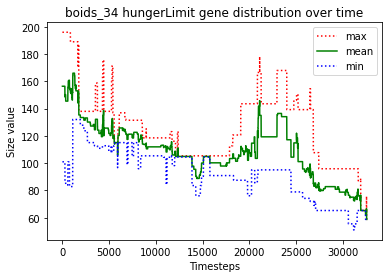





						BOIDS_35

predator_7 just gave birth to predator_10
predator_8 just gave birth to predator_11
predator_7 just gave birth to predator_12
predator_5 just gave birth to predator_13
predator_10 just gave birth to predator_14
predator_5 just gave birth to predator_15
predator_3 just gave birth to predator_16
predator_6 just gave birth to predator_17
predator_14 starved to death
predator_10 starved to death
predator_15 just gave birth to predator_18
predator_0 ate the carcass of predator_10_carcass
predator_5 ate the carcass of predator_14_carcass
predator_15 starved to death
predator_5 ate the carcass of predator_15_carcass
predator_18 starved to death
predator_13 starved to death
predator_16 ate the carcass of predator_13_carcass
predator_3 just gave birth to predator_19
predator_5 ate the carcass of predator_18_carcass
predator_3 starved to death
predator_16 ate the carcass of predator_3_carcass
predator_19 starved to death
predator_7 ate the carcass of predator_19_carcass
preda

predator_62 just gave birth to predator_73
predator_67 ate the carcass of predator_59_carcass
predator_69 just gave birth to predator_74
predator_66 just gave birth to predator_75
predator_69 starved to death
predator_57 ate the carcass of predator_69_carcass
predator_37 starved to death
predator_54 ate the carcass of predator_37_carcass
predator_62 just gave birth to predator_76
predator_74 just gave birth to predator_77
predator_70 starved to death
predator_74 starved to death
predator_77 starved to death
predator_66 ate the carcass of predator_77_carcass
predator_75 ate the carcass of predator_70_carcass
predator_72 just gave birth to predator_78
predator_57 just gave birth to predator_79
predator_75 ate the carcass of predator_74_carcass
predator_54 just gave birth to predator_80
predator_57 just gave birth to predator_81
predator_68 starved to death
predator_79 ate the carcass of predator_68_carcass
predator_62 killed predator_76
predator_78 just gave birth to predator_82
predator

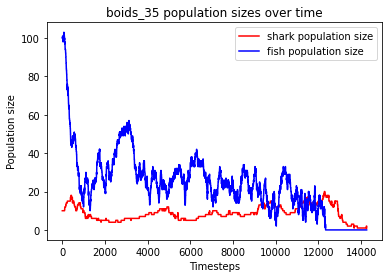

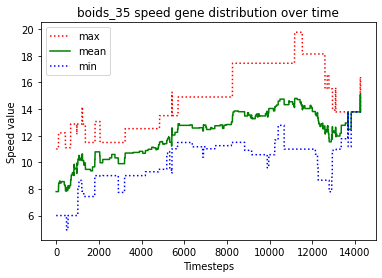

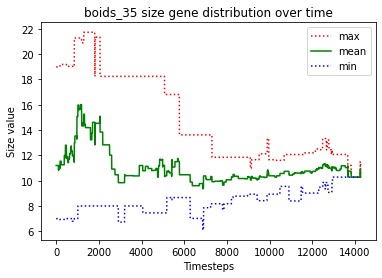

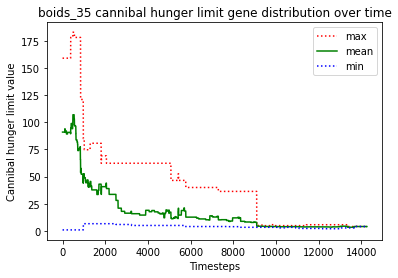

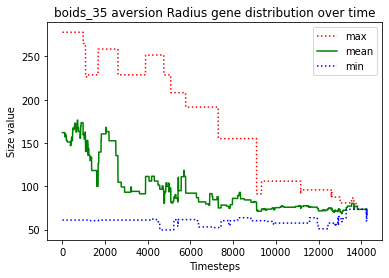

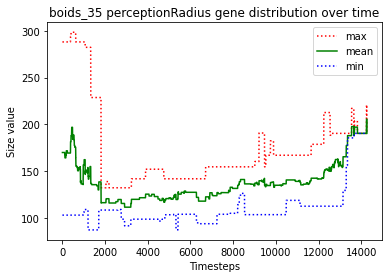

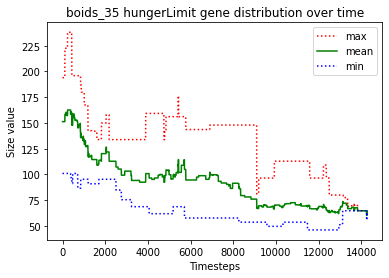





						BOIDS_36

predator_6 just gave birth to predator_10
predator_1 just gave birth to predator_11
predator_7 just gave birth to predator_12
predator_6 just gave birth to predator_13
predator_5 just gave birth to predator_14
predator_6 starved to death
predator_10 ate the carcass of predator_6_carcass
predator_13 starved to death
predator_1 starved to death
predator_4 ate the carcass of predator_1_carcass
predator_8 ate the carcass of predator_13_carcass
predator_7 starved to death
predator_12 ate the carcass of predator_7_carcass
predator_11 starved to death
predator_0 just gave birth to predator_15
predator_14 ate the carcass of predator_11_carcass
predator_5 starved to death
predator_4 ate the carcass of predator_5_carcass
predator_15 starved to death
predator_12 starved to death
predator_14 ate the carcass of predator_15_carcass
predator_0 starved to death
predator_14 ate the carcass of predator_12_carcass
predator_14 ate the carcass of predator_0_carcass
predator_10 starved t

Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\Users\Danie\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "D:\Users\Danie\Anaconda3\lib\tkinter\__init__.py", line 749, in callit
    func(*args)
  File "<ipython-input-9-d4a43ab7493a>", line 114, in movePredators
    predator.move(canvas)
  File "<ipython-input-7-21b94166b97e>", line 64, in move
    canvas.delete(self.name)
  File "D:\Users\Danie\Anaconda3\lib\tkinter\__init__.py", line 2514, in delete
    self.tk.call((self._w, 'delete') + args)
KeyboardInterrupt
Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\Users\Danie\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "D:\Users\Danie\Anaconda3\lib\tkinter\__init__.py", line 749, in callit
    func(*args)
  File "<ipython-input-8-fe7f2190eae1>", line 167, in moveFish
    fish.move(canvas)
  File "<ipython-input-4-b8347f64a4e0>", line 45, i





						BOIDS_37



Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\Users\Danie\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "D:\Users\Danie\Anaconda3\lib\tkinter\__init__.py", line 749, in callit
    func(*args)
  File "<ipython-input-9-d4a43ab7493a>", line 114, in movePredators
    predator.move(canvas)
  File "<ipython-input-7-21b94166b97e>", line 65, in move
    self.draw(canvas)
  File "<ipython-input-7-21b94166b97e>", line 46, in draw
    canvas.create_polygon(point1b+point2b+point3b,fill=self.color,tags=self.name)
  File "D:\Users\Danie\Anaconda3\lib\tkinter\__init__.py", line 2498, in create_polygon
    return self._create('polygon', args, kw)
  File "D:\Users\Danie\Anaconda3\lib\tkinter\__init__.py", line 2480, in _create
    *(args + self._options(cnf, kw))))
KeyboardInterrupt
Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\Users\Danie\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call_





						BOIDS_38



Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\Users\Danie\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "D:\Users\Danie\Anaconda3\lib\tkinter\__init__.py", line 749, in callit
    func(*args)
  File "<ipython-input-8-fe7f2190eae1>", line 167, in moveFish
    fish.move(canvas)
  File "<ipython-input-4-b8347f64a4e0>", line 45, in move
    canvas.delete(self.name)
  File "D:\Users\Danie\Anaconda3\lib\tkinter\__init__.py", line 2514, in delete
    self.tk.call((self._w, 'delete') + args)
KeyboardInterrupt
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\Users\Danie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-325adc3649c4>", line 40, in <module>
    do_one_experiment(num_boids, perception_radius, minimum_radius, aversion_radius, num_preds, simulation_speed, max_timesteps, swarm_behaviour, run_name)
  File "<ipython-input-13-325adc3649c4>", line 30, in do_one_experiment
    window.mainloop()
  File "D:\Users\Danie\Anaconda3\lib\tkinter\__init__.py", line 1283, in mainloop
    self.tk.mainloop(n)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Users\Danie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the abov

TypeError: object of type 'NoneType' has no len()

In [13]:
#### CONSTANTS ####
simulation_speed = 15
max_timesteps = 100000

### NUMBER OF AGENTS
#number of boids
num_boids = 100
#number of predators
num_preds = 10

### FISH BEHAVIOUR
#radius in which the fish swarm behaviour kicks in
perception_radius = 35
#minimum radius between each fish
minimum_radius = 25
#radius in which aversion behaviour kicks in
aversion_radius = 90

#### MAIN EXPERIMENT FUNCTION ####
def do_one_experiment(num_boids, perception_radius, minimum_radius, aversion_radius, num_preds, simulation_speed, max_timesteps, swarm_behavour, run_name):
    print(color.BOLD+f"\n\n\n\n\t\t\t\t\t\t{run_name.upper()}\n"+color.END)
    window = tk.Tk()
    canvas = initialise(window)
    count = Counter(max_timesteps) # run for 1000 time steps
    fishList = addFish(canvas, num_boids) ### Custom now taking num_boids as a parameter to be tuned
    predList = addPredators(canvas, num_preds) ### Custom adding preadtors
    moveFish(canvas,False, fishList, perception_radius, minimum_radius, aversion_radius, predList, simulation_speed, len(fishList), swarm_behaviour) ### Custom now taking perception and minimum radius as parameters to be tuned
    movePredators(canvas,window,count,predList, fishList, [], [], simulation_speed, len(predList), ([],[],[]), ([],[],[]), ([],[],[]), ([],[],[]), ([],[],[]), ([],[],[]), ([],[]), run_name, None, None) ### Custom moving predators
    writeTrackers(canvas, fishList, predList,count)
    window.mainloop()
    
    
#### running all experiments ####
# running with and without swarm behavour
for swarm_behaviour in (True, False):
    #running n experiments for each
    for i in range(num_of_experiments_for_each):
        run_name = ""
        run_name += f'boids_{i}' if swarm_behaviour else f'solo_{i}'
        do_one_experiment(num_boids, perception_radius, minimum_radius, aversion_radius, num_preds, simulation_speed, max_timesteps, swarm_behaviour, run_name)

# Inspecting totals from the experiments

## loading the stats from experiments

In [ ]:
#loading the data for boids
boids_timesteps_passed=[]
boids_fish_extinct_timestep=[]
boids_shark_extinct_timestep=[]

boids_minMeanMax_speed=[]
boids_minMeanMax_size =[]
boids_minMeanMax_aversionRadius =[]
boids_minMeanMax_perceptionRadius =[]
boids_minMeanMax_hungerLimit =[]
boids_minMeanMax_canibalHunger =[]

boids_populationSizes=[]

for i in range(num_of_experiments_for_each):
    boids_timesteps_passed.append(pd.read_pickle(f"./boids_{i}/timesteps_passed.pickle"))
    boids_shark_extinct_timestep.append(pd.read_pickle(f"./boids_{i}/shark_extinct_timestep.pickle"))
    boids_fish_extinct_timestep.append(pd.read_pickle(f"./boids_{i}/fish_extinct_timestep.pickle"))

    boids_minMeanMax_speed.append(pd.read_pickle(f"./boids_{i}/minMeanMax_speed.pickle"))
    boids_minMeanMax_size.append(pd.read_pickle(f"./boids_{i}/minMeanMax_size.pickle"))
    boids_minMeanMax_aversionRadius.append(pd.read_pickle(f"./boids_{i}/minMeanMax_aversionRadius.pickle"))
    boids_minMeanMax_perceptionRadius.append(pd.read_pickle(f"./boids_{i}/minMeanMax_perceptionRadius.pickle"))
    boids_minMeanMax_hungerLimit.append(pd.read_pickle(f"./boids_{i}/minMeanMax_hungerLimit.pickle"))
    boids_minMeanMax_canibalHunger.append(pd.read_pickle(f"./boids_{i}/minMeanMax_canibalHunger.pickle"))
    
    boids_populationSizes.append(pd.read_pickle(f"./boids_{i}/populationSizes.pickle"))


    
    
    
#loading the data for solo
solo_timesteps_passed=[]
solo_fish_extinct_timestep=[]
solo_shark_extinct_timestep=[]

solo_minMeanMax_speed=[]
solo_minMeanMax_size =[]
solo_minMeanMax_aversionRadius =[]
solo_minMeanMax_perceptionRadius =[]
solo_minMeanMax_hungerLimit =[]
solo_minMeanMax_canibalHunger =[]

solo_populationSizes=[]

for i in range(num_of_experiments_for_each):
    solo_timesteps_passed.append(pd.read_pickle(f"./solo_{i}/timesteps_passed.pickle"))
    solo_shark_extinct_timestep.append(pd.read_pickle(f"./solo_{i}/shark_extinct_timestep.pickle"))
    solo_fish_extinct_timestep.append(pd.read_pickle(f"./solo_{i}/fish_extinct_timestep.pickle"))

    solo_minMeanMax_speed.append(pd.read_pickle(f"./solo_{i}/minMeanMax_speed.pickle"))
    solo_minMeanMax_size.append(pd.read_pickle(f"./solo_{i}/minMeanMax_size.pickle"))
    solo_minMeanMax_aversionRadius.append(pd.read_pickle(f"./solo_{i}/minMeanMax_aversionRadius.pickle"))
    solo_minMeanMax_perceptionRadius.append(pd.read_pickle(f"./solo_{i}/minMeanMax_perceptionRadius.pickle"))
    solo_minMeanMax_hungerLimit.append(pd.read_pickle(f"./solo_{i}/minMeanMax_hungerLimit.pickle"))
    solo_minMeanMax_canibalHunger.append(pd.read_pickle(f"./solo_{i}/minMeanMax_canibalHunger.pickle"))
    
    
    solo_populationSizes.append(pd.read_pickle(f"./solo_{i}/populationSizes.pickle"))

In [ ]:
#making the directories if it doesn't already exist
if not os.path.exists('_all_solo/plots'):
    os.makedirs('_all_solo/plots')
if not os.path.exists('_all_boids/plots'):
    os.makedirs('_all_boids/plots')
if not os.path.exists('__boids_vs_solo/plots'):
    os.makedirs('__boids_vs_solo/plots')

## Inspecting population sizes over all experiments

### Solo population sizes

In [ ]:
#getting the pred and fish popsizes
temp=pd.DataFrame(data = solo_populationSizes, columns = ["pred","fish"])
preds_popsizes = pd.DataFrame(data = temp["pred"].to_list()).replace(0, np.nan)
fish_popsizes = pd.DataFrame(data = temp["fish"].to_list())

In [ ]:
# getting min/max/mean of all columns
min_fish = fish_popsizes.min()
max_fish = fish_popsizes.max()
mean_fish = fish_popsizes.mean()

min_shark = preds_popsizes.min()
max_shark = preds_popsizes.max()
mean_shark = preds_popsizes.mean()

In [ ]:
#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_solo mean population sizes over time")
plt.xlabel("Timesteps")
plt.ylabel("Population size")
# plt.plot(max_shark, color='lime', linestyle='-', lw=0.4, label='max shark population size')
plt.plot(mean_shark, color='red', linestyle='-', label='mean shark population size')
# plt.plot(min_shark, color='magenta', linestyle='-', lw=0.4, label='min shark population size')

# plt.plot(max_fish, color='navy', linestyle=':', lw=0.2, label='max fish population size')
plt.plot(mean_fish, color='blue', linestyle='-', lw=0.6, label='mean fish population size')
# plt.plot(min_fish, color='darkolivegreen', linestyle=':', lw=0.2 label='min fish population size')

plt.legend()
plt.show()
fig.savefig('_all_solo/plots/_fish_vs_sharks_populations.png')
plt.close()

In [ ]:
#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_solo population sizes over time with ranges")
plt.xlabel("Timesteps")
plt.ylabel("Population size")

# plt.plot(max_fish, color='navy', linestyle=':', lw=0.2, label='max fish population size')
plt.plot(mean_fish, color='blue', linestyle='-', lw=0.6, label='mean fish population size')
# plt.plot(min_fish, color='darkolivegreen', linestyle=':', lw=0.2 label='min fish population size')
plt.fill_between(list(range(len(mean_fish))),min_fish, max_fish, color="cyan", alpha=.5, label='range of fish population sizes')

# plt.plot(max_shark, color='lime', linestyle='-', lw=0.4, label='max shark population size')
plt.plot(mean_shark, color='red', linestyle='-', label='mean shark population size')
# plt.plot(min_shark, color='magenta', linestyle='-', lw=0.4, label='min shark population size')
plt.fill_between(list(range(len(mean_fish))),min_shark, max_shark, color="orange", alpha=.5, label='range of shark population sizes')



plt.legend()
plt.show()
fig.savefig('_all_solo/plots/_fish_vs_sharks_populations_with_ranges.png')
plt.close()

In [ ]:
#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_solo shark population distribution")
plt.xlabel("Timesteps")
plt.ylabel("Shark population size")
plt.plot(max_shark, color='r', linestyle=':', lw=0.5, label='max shark population size')
plt.plot(mean_shark, color='g', linestyle='-', lw=0.6, label='mean shark population size')
plt.plot(min_shark, color='b', linestyle=':', lw=0.5, label='min shark population size')

plt.legend()
plt.show()
fig.savefig('_all_solo/plots/sharks_populations.png')
plt.close()

In [ ]:
#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_solo fish population distribution")
plt.xlabel("Timesteps")
plt.ylabel("Population size")


plt.plot(max_fish, color='r', linestyle=':', lw=0.5, label='max fish population size')
plt.plot(mean_fish, color='g', linestyle='-', lw=0.6, label='mean fish population size')
plt.plot(min_fish, color='b', linestyle=':', lw=0.5, label='min fish population size')

plt.legend()
plt.show()
fig.savefig('_all_solo/plots/fish_populations.png')
plt.close()

## Inspecting extinctions

In [ ]:
#inspecting times of extinction

fish_never_went_extinct = solo_fish_extinct_timestep.count(None)
fish_no_none=solo_fish_extinct_timestep.copy()
while None in fish_no_none: fish_no_none.remove(None)

print("SOLO EXPERIMENT FISH EXTINCTION")
print("Minimum timesteps until fish went extinct is:",min(fish_no_none))
print("Mean timesteps until fish went extinct is:",round(np.mean(fish_no_none),2))
print("Max timesteps until fish went extinct is:",max(fish_no_none))
print("Median timesteps until fish went extinct is: ",round(np.median(fish_no_none),2))
print(f"Also, there were {fish_never_went_extinct} runs where fish never went extinct" if fish_never_went_extinct>0 else "Fish went extinct in every run" )




sharks_never_went_extinct = solo_shark_extinct_timestep.count(None)
sharks_no_none=solo_shark_extinct_timestep.copy()
while None in sharks_no_none: sharks_no_none.remove(None)

print("\nSOLO EXPERIMENT SHARK EXTINCTION")
print("Minimum timesteps until sharks went extinct is:",min(sharks_no_none))
print("Mean timesteps until sharks went extinct is:",np.mean(sharks_no_none))
print("Max timesteps until sharks went extinct is:",max(sharks_no_none))
print("Median timesteps until sharks went extinct is: ",round(np.median(sharks_no_none),2))
print(f"Also, there were {sharks_never_went_extinct} runs where sharks never went extinct" if sharks_never_went_extinct>0 else "Sharks went extinct in every run" )

In [ ]:
# REFERENCE : https://stackoverflow.com/questions/23461713/obtaining-values-used-in-boxplot-using-python-and-matplotlib

# function for annotating the box plots
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i].replace("\n", ": ")
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['mean'] = round(bp['means'][i].get_ydata()[0],2)
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

In [ ]:
# box plot of extinctions
fig=plt.figure()
bp=plt.boxplot([sharks_no_none, fish_no_none], labels=["shark extinctions","fish extinctions"], showmeans=True, patch_artist=True)
i=0
for box in bp['boxes']:
    if i%2==1:
        box.set(color='blue', alpha=0.2) 
    else:
        box.set(color='red', alpha=0.2)
    i+=1

plt.ylabel("timestep of extinction")
plt.title("all_solo box plot of extinctions")
plt.show()
fig.savefig("_all_solo/plots/box_all_extinctions.png")

In [ ]:
#just plotting without patch artist so below function works
bp=plt.boxplot([sharks_no_none, fish_no_none], labels=["solo\nshark extinctions","solo\nfish extinctions"], showmeans=True)
plt.close()
#getting the dataframe annotating the box plot
temp=get_box_plot_data(["solo\nshark extinctions","solo\nfish extinctions"], bp)
temp["max"]=[max(sharks_no_none),max(fish_no_none)]
temp["min"]=[min(sharks_no_none),min(fish_no_none)]
temp["number of runs without extinction"]=[solo_shark_extinct_timestep.count(None),solo_fish_extinct_timestep.count(None)]
temp

In [ ]:
#Getting percentage of runs where sharks went extinct before fish
sharks_extinct_before_fish_counter=0
for i in range (num_of_experiments_for_each):
    if(solo_fish_extinct_timestep[i]==None and solo_shark_extinct_timestep[i]!=None):
        sharks_extinct_before_fish_counter+=1
        
fig = plt.figure()
counts=[sharks_extinct_before_fish_counter,num_of_experiments_for_each-sharks_extinct_before_fish_counter]
plt.pie(counts, labels = ["Sharks went\n extinct first", "Fish went extinct\n before sharks"], autopct='%1.2f%%')
plt.title("Proportion of runs where sharks went exinct \nwhilst there was still a population of prey fish")
plt.xlabel(f"In {str(sharks_extinct_before_fish_counter)}/{str(num_of_experiments_for_each)} ({str(round(sharks_extinct_before_fish_counter/num_of_experiments_for_each*100,2))}%) of runs the sharks went extinct whilst fish weren't extinct")
plt.show()
fig.savefig("_all_solo/plots/pie_shark_before_fish.png")
plt.close()

In [ ]:
fig = plt.figure(figsize=(18,4))
ax=sns.histplot(data=sharks_no_none, bins=range(0,100001,5000), color = 'r')
ax.set_title("all_solo histogram of shark extinctions")
ax.set_xlabel("Timestep of shark extinction")
ax.set_xticks(range(0,100001,5000))
fig.savefig('_all_solo/plots/shark_extinctions.png')
plt.show()
plt.close()

In [ ]:
fig = plt.figure(figsize=(18,4))
ax=sns.histplot(data=fish_no_none, bins=range(0,100001,5000), color = 'b')
ax.set_title("all_solo histogram of fish extinctions")
ax.set_xlabel("Timestep of fish extinction")
ax.set_xticks(range(0,100001,5000))
fig.savefig('_all_solo/plots/fish_extinctions.png')
plt.show()
plt.close()

In [ ]:
#plotting on top of each other
fig = plt.figure(figsize=(18,4))
plt.hist([fish_no_none, sharks_no_none], color=['b','r'], ec="k",alpha=0.7, bins=range(0,100001,5000))
plt.xticks(range(0,100001,5000))

handles = [Rectangle((0,0),1,1,color=c,ec="k", alpha=0.7) for c in ['b','r']]
labels=["fish extinctions","shark extinctions"]
plt.legend(handles, labels)

plt.title("all_solo histogram of fish vs shark extinctions")
plt.xlabel("timestep of extinction")

fig.savefig('_all_solo/plots/_all_extinctions.png')
plt.show()
plt.close()

### Boids population sizes

In [ ]:
#getting the pred and fish popsizes
temp=pd.DataFrame(data = boids_populationSizes, columns = ["pred","fish"])
preds_popsizes = pd.DataFrame(data = temp["pred"].to_list()).replace(0, np.nan)
fish_popsizes = pd.DataFrame(data = temp["fish"].to_list())

In [ ]:
# getting min/max/mean of all columns
min_fish = fish_popsizes.min()
max_fish = fish_popsizes.max()
mean_fish = fish_popsizes.mean()

min_shark = preds_popsizes.min()
max_shark = preds_popsizes.max()
mean_shark = preds_popsizes.mean()

In [ ]:
#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_boids mean population sizes over time")
plt.xlabel("Timesteps")
plt.ylabel("Population size")
# plt.plot(max_shark, color='lime', linestyle='-', lw=0.4, label='max shark population size')
plt.plot(mean_shark, color='red', linestyle='-', label='mean shark population size')
# plt.plot(min_shark, color='magenta', linestyle='-', lw=0.4, label='min shark population size')

# plt.plot(max_fish, color='navy', linestyle=':', lw=0.2, label='max fish population size')
plt.plot(mean_fish, color='blue', linestyle='-', lw=0.6, label='mean fish population size')
# plt.plot(min_fish, color='darkolivegreen', linestyle=':', lw=0.2 label='min fish population size')

plt.legend()
plt.show()
fig.savefig('_all_boids/plots/_fish_vs_sharks_populations.png')
plt.close()

In [ ]:
#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_boids population sizes over time with ranges")
plt.xlabel("Timesteps")
plt.ylabel("Population size")

# plt.plot(max_fish, color='navy', linestyle=':', lw=0.2, label='max fish population size')
plt.plot(mean_fish, color='blue', linestyle='-', lw=0.6, label='mean fish population size')
# plt.plot(min_fish, color='darkolivegreen', linestyle=':', lw=0.2 label='min fish population size')
plt.fill_between(list(range(len(mean_fish))),min_fish, max_fish, color="cyan", alpha=.5, label='range of fish population sizes')

# plt.plot(max_shark, color='lime', linestyle='-', lw=0.4, label='max shark population size')
plt.plot(mean_shark, color='red', linestyle='-', label='mean shark population size')
# plt.plot(min_shark, color='magenta', linestyle='-', lw=0.4, label='min shark population size')
plt.fill_between(list(range(len(mean_fish))),min_shark, max_shark, color="orange", alpha=.5, label='range of shark population sizes')



plt.legend()
plt.show()
fig.savefig('_all_boids/plots/_fish_vs_sharks_populations_with_ranges.png')
plt.close()

In [ ]:
#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_boids shark population distribution")
plt.xlabel("Timesteps")
plt.ylabel("Shark population size")
plt.plot(max_shark, color='r', linestyle=':', lw=0.5, label='max shark population size')
plt.plot(mean_shark, color='g', linestyle='-', lw=0.6, label='mean shark population size')
plt.plot(min_shark, color='b', linestyle=':', lw=0.5, label='min shark population size')

plt.legend()
plt.show()
fig.savefig('_all_boids/plots/sharks_populations.png')
plt.close()

In [ ]:
#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_boids fish population distribution")
plt.xlabel("Timesteps")
plt.ylabel("Population size")


plt.plot(max_fish, color='r', linestyle=':', lw=0.5, label='max fish population size')
plt.plot(mean_fish, color='g', linestyle='-', lw=0.6, label='mean fish population size')
plt.plot(min_fish, color='b', linestyle=':', lw=0.5, label='min fish population size')

plt.legend()
plt.show()
fig.savefig('_all_boids/plots/fish_populations.png')
plt.close()

### Boids extinctions

In [ ]:
#inspecting times of extinction

fish_never_went_extinct = boids_fish_extinct_timestep.count(None)
fish_no_none=boids_fish_extinct_timestep.copy()
while None in fish_no_none: fish_no_none.remove(None)

print("BOIDS EXPERIMENT FISH EXTINCTION")
print("Minimum timesteps until fish went extinct is:",min(fish_no_none))
print("Mean timesteps until fish went extinct is:",round(np.mean(fish_no_none), 2))
print("Max timesteps until fish went extinct is:",max(fish_no_none))
print("Median timesteps until fish went extinct is: ",round(np.median(fish_no_none),2))
print(f"Also, there were {fish_never_went_extinct} runs where fish never went extinct" if fish_never_went_extinct>0 else "Fish went extinct in every run" )




sharks_never_went_extinct = boids_shark_extinct_timestep.count(None)
sharks_no_none=boids_shark_extinct_timestep.copy()
while None in sharks_no_none: sharks_no_none.remove(None)

print("\nBOIDS EXPERIMENT SHARK EXTINCTION")
print("Minimum timesteps until sharks went extinct is:",min(sharks_no_none))
print("Mean timesteps until sharks went extinct is:",round(np.mean(sharks_no_none),2))
print("Max timesteps until sharks went extinct is:",max(sharks_no_none))
print("Median timesteps until sharks went extinct is: ",round(np.median(sharks_no_none),2))
print(f"Also, there were {sharks_never_went_extinct} runs where sharks never went extinct" if sharks_never_went_extinct>0 else "Sharks went extinct in every run" )

In [ ]:
# box plot of extinctions
fig=plt.figure()
bp=plt.boxplot([sharks_no_none, fish_no_none], labels=["shark extinctions","fish extinctions"], showmeans=True, patch_artist=True)

i=0
for box in bp['boxes']:
    if i%2==1:
        box.set(color='blue', alpha=0.2) 
    else:
        box.set(color='red', alpha=0.2)
    i+=1

plt.ylabel("timestep of extinction")
plt.title("all_boids box plot of extinctions")
plt.show()
fig.savefig("_all_boids/plots/box_all_extinctions.png")

In [ ]:
#just plotting without patch artist so below function works
bp=plt.boxplot([sharks_no_none, fish_no_none], labels=["boids\nshark extinctions","boids\nfish extinctions"], showmeans=True)
plt.close()
#getting the dataframe annotating the box plot
temp=get_box_plot_data(["boids\nshark extinctions","boids\nfish extinctions"], bp)
temp["max"]=[max(sharks_no_none),max(fish_no_none)]
temp["min"]=[min(sharks_no_none),min(fish_no_none)]
temp["number of runs without extinction"]=[boids_shark_extinct_timestep.count(None),boids_fish_extinct_timestep.count(None)]
temp

In [ ]:
#Getting percentage of runs where sharks went extinct before fish
sharks_extinct_before_fish_counter=0
for i in range (num_of_experiments_for_each):
    if(boids_fish_extinct_timestep[i]==None and boids_shark_extinct_timestep[i]!=None):
        sharks_extinct_before_fish_counter+=1
        
fig = plt.figure()
counts=[sharks_extinct_before_fish_counter,num_of_experiments_for_each-sharks_extinct_before_fish_counter]
plt.pie(counts, labels = ["Sharks went \nextinct first", "Fish went extinct \nbefore sharks"], autopct='%1.2f%%')
plt.title("Proportion of runs where sharks went exinct \nwhilst there was still a population of prey fish")
plt.xlabel(f"In {str(sharks_extinct_before_fish_counter)}/{str(num_of_experiments_for_each)} ({str(round(sharks_extinct_before_fish_counter/num_of_experiments_for_each*100,2))}%) of runs the sharks went extinct whilst fish weren't extinct")
plt.show()
fig.savefig("_all_boids/plots/pie_shark_before_fish.png")
plt.close()

In [ ]:
fig = plt.figure(figsize=(18,4))
ax=sns.histplot(data=sharks_no_none, bins=range(0,100001,5000), color = 'r')
ax.set_title("all_boids histogram of shark extinctions")
ax.set_xlabel("Timestep of shark extinction")
ax.set_xticks(range(0,100001,5000))
fig.savefig('_all_boids/plots/shark_extinctions.png')
plt.show()
plt.close()

In [ ]:
fig = plt.figure(figsize=(18,4))
ax=sns.histplot(data=fish_no_none, bins=range(0,100001,5000), color = 'b')
ax.set_title("all_boids histogram of fish extinctions")
ax.set_xlabel("Timestep of fish extinction")
ax.set_xticks(range(0,100001,5000))
fig.savefig('_all_boids/plots/fish_extinctions.png')
plt.show()
plt.close()

In [ ]:
#plotting on top of each other
fig = plt.figure(figsize=(18,4))
plt.hist([fish_no_none, sharks_no_none], color=['b','r'], ec="k",alpha=0.7, bins=range(0,100001,5000))
plt.xticks(range(0,100001,5000))

handles = [Rectangle((0,0),1,1,color=c,ec="k", alpha=0.7) for c in ['b','r']]
labels=["fish extinctions","shark extinctions"]
plt.legend(handles, labels)

plt.title("all_boids histogram of fish vs shark extinctions")
plt.xlabel("timestep of extinction")

fig.savefig('_all_boids/plots/_all_extinctions.png')
plt.show()
plt.close()

## Inspecting mean genetic distribution over all experiments
### Solo fish

In [ ]:
#getting the mean value for speed gene
temp=pd.DataFrame(data = solo_minMeanMax_speed)
mean_speed = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)

# getting min/max/mean of the mean speed for all columns
min_mean_speed = mean_speed.min()
mean_mean_speed = mean_speed.mean()
max_mean_speed = mean_speed.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_solo experiments mean speed gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Speed value")
plt.plot(max_mean_speed, ':r', label='max mean')
plt.plot(mean_mean_speed, '-g', label='mean mean')
plt.plot(min_mean_speed, ':b', label='min mean')

plt.legend()
plt.show()
fig.savefig('_all_solo/plots/speed.png')
plt.close()

In [ ]:
#getting the mean value for size gene
temp=pd.DataFrame(data = solo_minMeanMax_size)
mean_size = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)

# getting min/max/mean of the mean size for all columns
min_mean_size = mean_size.min()
mean_mean_size = mean_size.mean()
max_mean_size = mean_size.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_solo experiments mean size gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Size value")
plt.plot(max_mean_size, ':r', label='max mean')
plt.plot(mean_mean_size, '-g', label='mean mean')
plt.plot(min_mean_size, ':b', label='min mean')

plt.legend()
plt.show()
fig.savefig('_all_solo/plots/size.png')
plt.close()

In [ ]:
#getting the mean value for aversionRadius gene
temp=pd.DataFrame(data = solo_minMeanMax_aversionRadius)
mean_aversionRadius = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)

# getting min/max/mean of the mean aversionRadius for all columns
min_mean_aversionRadius = mean_aversionRadius.min()
mean_mean_aversionRadius = mean_aversionRadius.mean()
max_mean_aversionRadius = mean_aversionRadius.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_solo experiments mean aversionRadius gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Aversion Radius value")
plt.plot(max_mean_aversionRadius, ':r', label='max mean')
plt.plot(mean_mean_aversionRadius, '-g', label='mean mean')
plt.plot(min_mean_aversionRadius, ':b', label='min mean')

plt.legend()
plt.show()
fig.savefig('_all_solo/plots/aversionRadius.png')
plt.close()

In [ ]:
#getting the mean value for perceptionRadius gene
temp=pd.DataFrame(data = solo_minMeanMax_perceptionRadius)
mean_perceptionRadius = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)

# getting min/max/mean of the mean perceptionRadius for all columns
min_mean_perceptionRadius = mean_perceptionRadius.min()
mean_mean_perceptionRadius = mean_perceptionRadius.mean()
max_mean_perceptionRadius = mean_perceptionRadius.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_solo experiments mean perceptionRadius gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Perception Radius value")
plt.plot(max_mean_perceptionRadius, ':r', label='max mean')
plt.plot(mean_mean_perceptionRadius, '-g', label='mean mean')
plt.plot(min_mean_perceptionRadius, ':b', label='min mean')

plt.legend()
plt.show()
fig.savefig('_all_solo/plots/perceptionRadius.png')
plt.close()

In [ ]:
#getting the mean value for hungerLimit gene
temp=pd.DataFrame(data = solo_minMeanMax_hungerLimit)
mean_hungerLimit = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)

# getting min/max/mean of the mean hungerLimit for all columns
min_mean_hungerLimit = mean_hungerLimit.min()
mean_mean_hungerLimit = mean_hungerLimit.mean()
max_mean_hungerLimit = mean_hungerLimit.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_solo experiments mean hungerLimit gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Hunger Limit value")
plt.plot(max_mean_hungerLimit, ':r', label='max mean')
plt.plot(mean_mean_hungerLimit, '-g', label='mean mean')
plt.plot(min_mean_hungerLimit, ':b', label='min mean')

plt.legend()
plt.show()
fig.savefig('_all_solo/plots/hungerLimit.png')
plt.close()

In [ ]:
#getting the mean value for canibalHunger gene
temp=pd.DataFrame(data = solo_minMeanMax_canibalHunger)
mean_canibalHunger = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)

# getting min/max/mean of the mean canibalHunger for all columns
min_mean_canibalHunger = mean_canibalHunger.min()
mean_mean_canibalHunger = mean_canibalHunger.mean()
max_mean_canibalHunger = mean_canibalHunger.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_solo experiments mean cannibalHunger gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Cannibal Hunger value")
plt.plot(max_mean_canibalHunger, ':r', label='max mean')
plt.plot(mean_mean_canibalHunger, '-g', label='mean mean')
plt.plot(min_mean_canibalHunger, ':b', label='min mean')

plt.legend()
plt.show()
fig.savefig('_all_solo/plots/canibalHunger.png')
plt.close()

### Boids fish

In [ ]:
#getting the mean value for speed gene
temp=pd.DataFrame(data = boids_minMeanMax_speed)
mean_speed = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)

# getting min/max/mean of the mean speed for all columns
min_mean_speed = mean_speed.min()
mean_mean_speed = mean_speed.mean()
max_mean_speed = mean_speed.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_boids experiments mean speed gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Speed value")
plt.plot(max_mean_speed, ':r', label='max mean')
plt.plot(mean_mean_speed, '-g', label='mean mean')
plt.plot(min_mean_speed, ':b', label='min mean')

plt.legend()
plt.show()
fig.savefig('_all_boids/plots/speed.png')
plt.close()

In [ ]:
#getting the mean value for size gene
temp=pd.DataFrame(data = boids_minMeanMax_size)
mean_size = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)

# getting min/max/mean of the mean size for all columns
min_mean_size = mean_size.min()
mean_mean_size = mean_size.mean()
max_mean_size = mean_size.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_boids experiments mean size gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Size value")
plt.plot(max_mean_size, ':r', label='max mean')
plt.plot(mean_mean_size, '-g', label='mean mean')
plt.plot(min_mean_size, ':b', label='min mean')

plt.legend()
plt.show()
fig.savefig('_all_boids/plots/size.png')
plt.close()

In [ ]:
#getting the mean value for aversionRadius gene
temp=pd.DataFrame(data = boids_minMeanMax_aversionRadius)
mean_aversionRadius = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)

# getting min/max/mean of the mean aversionRadius for all columns
min_mean_aversionRadius = mean_aversionRadius.min()
mean_mean_aversionRadius = mean_aversionRadius.mean()
max_mean_aversionRadius = mean_aversionRadius.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_boids experiments mean aversionRadius gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Aversion Radius value")
plt.plot(max_mean_aversionRadius, ':r', label='max mean')
plt.plot(mean_mean_aversionRadius, '-g', label='mean mean')
plt.plot(min_mean_aversionRadius, ':b', label='min mean')

plt.legend()
plt.show()
fig.savefig('_all_boids/plots/aversionRadius.png')
plt.close()

In [ ]:
#getting the mean value for perceptionRadius gene
temp=pd.DataFrame(data = boids_minMeanMax_perceptionRadius)
mean_perceptionRadius = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)

# getting min/max/mean of the mean perceptionRadius for all columns
min_mean_perceptionRadius = mean_perceptionRadius.min()
mean_mean_perceptionRadius = mean_perceptionRadius.mean()
max_mean_perceptionRadius = mean_perceptionRadius.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_boids experiments mean perceptionRadius gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Perception Radius value")
plt.plot(max_mean_perceptionRadius, ':r', label='max mean')
plt.plot(mean_mean_perceptionRadius, '-g', label='mean mean')
plt.plot(min_mean_perceptionRadius, ':b', label='min mean')

plt.legend()
plt.show()
fig.savefig('_all_boids/plots/perceptionRadius.png')
plt.close()

In [ ]:
#getting the mean value for hungerLimit gene
temp=pd.DataFrame(data = boids_minMeanMax_hungerLimit)
mean_hungerLimit = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)

# getting min/max/mean of the mean hungerLimit for all columns
min_mean_hungerLimit = mean_hungerLimit.min()
mean_mean_hungerLimit = mean_hungerLimit.mean()
max_mean_hungerLimit = mean_hungerLimit.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_boids experiments mean hungerLimit gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Hunger Limit value")
plt.plot(max_mean_hungerLimit, ':r', label='max mean')
plt.plot(mean_mean_hungerLimit, '-g', label='mean mean')
plt.plot(min_mean_hungerLimit, ':b', label='min mean')

plt.legend()
plt.show()
fig.savefig('_all_boids/plots/hungerLimit.png')
plt.close()

In [ ]:
#getting the mean value for canibalHunger gene
temp=pd.DataFrame(data = boids_minMeanMax_canibalHunger)
mean_canibalHunger = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)

# getting min/max/mean of the mean canibalHunger for all columns
min_mean_canibalHunger = mean_canibalHunger.min()
mean_mean_canibalHunger = mean_canibalHunger.mean()
max_mean_canibalHunger = mean_canibalHunger.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_boids experiments mean cannibalHunger gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Cannibal Hunger value")
plt.plot(max_mean_canibalHunger, ':r', label='max mean')
plt.plot(mean_mean_canibalHunger, '-g', label='mean mean')
plt.plot(min_mean_canibalHunger, ':b', label='min mean')

plt.legend()
plt.show()
fig.savefig('_all_boids/plots/canibalHunger.png')
plt.close()

# Boids Versus Solo Comparison Charts
## Comparing populations

In [ ]:
#getting the pred and fish popsizes

#for boids
temp=pd.DataFrame(data = boids_populationSizes, columns = ["pred","fish"])
boids_preds_popsizes = pd.DataFrame(data = temp["pred"].to_list()).replace(0, np.nan)
boids_fish_popsizes = pd.DataFrame(data = temp["fish"].to_list())# getting min/max/mean of all columns

boids_min_fish = boids_fish_popsizes.min()
boids_mean_fish = boids_fish_popsizes.mean()
boids_max_fish = boids_fish_popsizes.max()

boids_min_shark = boids_preds_popsizes.min()
boids_mean_shark = boids_preds_popsizes.mean()
boids_max_shark = boids_preds_popsizes.max()




#for solo
temp=pd.DataFrame(data = solo_populationSizes, columns = ["pred","fish"])
solo_preds_popsizes = pd.DataFrame(data = temp["pred"].to_list()).replace(0, np.nan)
solo_fish_popsizes = pd.DataFrame(data = temp["fish"].to_list())# getting min/max/mean of all columns

solo_min_fish = solo_fish_popsizes.min()
solo_mean_fish = solo_fish_popsizes.mean()
solo_max_fish = solo_fish_popsizes.max()

solo_min_shark = solo_preds_popsizes.min()
solo_mean_shark = solo_preds_popsizes.mean()
solo_max_shark = solo_preds_popsizes.max()

### Comparing fish populations

In [ ]:
#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("boids vs solo experiment mean fish populations")
plt.xlabel("Timesteps")
plt.ylabel("Population size")

plt.plot(solo_mean_fish, color='forestgreen', linestyle='-', lw=0.6, label='solo experiment mean fish population size')

plt.plot(boids_mean_fish, color='purple', linestyle='-', lw=0.6, label='boids experiment mean fish population size')

plt.legend()
plt.show()
fig.savefig('__boids_vs_solo/plots/_fish_mean_populations.png')
plt.close()

In [ ]:
#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("boids vs solo experiment fish population ranges")
plt.xlabel("Timesteps")
plt.ylabel("Population size")

plt.plot(solo_mean_fish, color='forestgreen', linestyle='-', lw=0.6, label='solo experiment mean fish population size')
plt.fill_between(list(range(len(solo_mean_fish))),solo_min_fish, solo_max_fish, color="lime", alpha=.5, label='range of solo experiment boids population sizes')

plt.plot(boids_mean_fish, color='purple', linestyle='-', lw=0.6, label='boids experiment mean fish population size')
plt.fill_between(list(range(len(boids_mean_fish))),boids_min_fish, boids_max_fish, color="magenta", alpha=.5, label='range of boids experiment fish population sizes')
plt.legend()
plt.show()
fig.savefig('__boids_vs_solo/plots/_fish_mean_populations_with_ranges.png')
plt.close()

In [ ]:
#T-Test, checking the significant difference
t, p = ttest_ind(boids_mean_fish, solo_mean_fish)
print("T-Test on mean fish population sizes between boids and solo")
print("t = " + str(round(t,3)))#+" (higher abs score = groups are different; lower score = groups are similar)")
print("p = " + str(round(p,3)))#+" (probability that results happened by chance; lower the better)")

### Comparing shark populations 

In [ ]:
#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("boids vs solo experiment mean shark populations")
plt.xlabel("Timesteps")
plt.ylabel("Population size")

plt.plot(solo_mean_shark, color='forestgreen', linestyle='-', lw=0.6, label='solo experiment mean shark population size')

plt.plot(boids_mean_shark, color='purple', linestyle='-', lw=0.6, label='boids experiment mean shark population size')

plt.legend()
plt.show()
fig.savefig('__boids_vs_solo/plots/_shark_mean_populations.png')
plt.close()

In [ ]:
#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("boids vs solo experiment shark population ranges")
plt.xlabel("Timesteps")
plt.ylabel("Population size")

plt.plot(solo_mean_shark, color='forestgreen', linestyle='-', lw=0.6, label='solo experiment mean shark population size')
plt.fill_between(list(range(len(solo_mean_shark))),solo_min_shark, solo_max_shark, color="lime", alpha=.5, label='range of solo experiment shark population sizes')

plt.plot(boids_mean_shark, color='purple', linestyle='-', lw=0.6, label='boids experiment mean shark population size')
plt.fill_between(list(range(len(boids_mean_shark))),boids_min_shark, boids_max_shark, color="magenta", alpha=.5, label='range of boids experiment shark population sizes')

plt.legend()
plt.show()
fig.savefig('__boids_vs_solo/plots/_shark_mean_populations_with_ranges.png')
plt.close()

In [ ]:
#T-Test, checking the significant difference
t, p = ttest_ind(boids_mean_shark, solo_mean_shark)
print("T-Test on mean shark population sizes between boids and solo")
print("t = " + str(round(t,3)))#+" (higher abs score = groups are different; lower score = groups are similar)")
print("p = " + str(round(p,3)))#+" (probability that results happened by chance; lower the better)")

## Comparing extinction rates

In [ ]:
#getting the solo and boid experiment fish and shark extinction timesteps

# SOLO
solo_fish_never_went_extinct = solo_fish_extinct_timestep.count(None)
solo_fish_no_none=solo_fish_extinct_timestep.copy()
while None in solo_fish_no_none: solo_fish_no_none.remove(None)

solo_sharks_never_went_extinct = solo_shark_extinct_timestep.count(None)
solo_sharks_no_none=solo_shark_extinct_timestep.copy()
while None in solo_sharks_no_none: solo_sharks_no_none.remove(None)
    
    
    
# BOIDS
boids_fish_never_went_extinct = boids_fish_extinct_timestep.count(None)
boids_fish_no_none=boids_fish_extinct_timestep.copy()
while None in boids_fish_no_none: boids_fish_no_none.remove(None)

boids_sharks_never_went_extinct = boids_shark_extinct_timestep.count(None)
boids_sharks_no_none=boids_shark_extinct_timestep.copy()
while None in boids_sharks_no_none: boids_sharks_no_none.remove(None)

In [ ]:
# box plot of extinctions
fig=plt.figure(figsize=(7,5))
bp=plt.boxplot([solo_sharks_no_none, solo_fish_no_none, boids_sharks_no_none, boids_fish_no_none], labels=["solo\nshark extinctions","solo\nfish extinctions", "boids\nshark extinctions","boids\nfish extinctions"], showmeans=True, patch_artist=True)

i=0
for box in bp['boxes']:
    if i%2==1:
        box.set(color='blue', alpha=0.2) 
    else:
        box.set(color='red', alpha=0.2)
    i+=1

plt.ylabel("timestep of extinction")
plt.title("boids vs solo box plot of extinctions")
plt.show()
fig.savefig("__boids_vs_solo/plots/box_all_extinctions.png")

In [ ]:
#just plotting without patch artist so below function works
bp=plt.boxplot([solo_sharks_no_none, solo_fish_no_none, boids_sharks_no_none, boids_fish_no_none], labels=["solo\nshark extinctions","solo\nfish extinctions", "boids\nshark extinctions","boids\nfish extinctions"], showmeans=True)
plt.close()
#getting the dataframe annotating the box plot
temp=get_box_plot_data(["solo\nshark extinctions","solo\nfish extinctions","boids\nshark extinctions","boids\nfish extinctions"], bp)
temp["max"]=[max(solo_sharks_no_none),max(solo_fish_no_none),max(boids_sharks_no_none),max(boids_fish_no_none)]
temp["min"]=[min(solo_sharks_no_none),min(solo_fish_no_none),min(boids_sharks_no_none),min(boids_fish_no_none)]
temp["number of runs without extinction"]=[solo_shark_extinct_timestep.count(None),solo_fish_extinct_timestep.count(None),boids_shark_extinct_timestep.count(None),boids_fish_extinct_timestep.count(None)]
temp

In [ ]:
fig = plt.figure(figsize=(18,4))
plt.hist([solo_fish_no_none, boids_fish_no_none], color=['forestgreen','purple'], ec="k",alpha=0.7, bins=range(0,100001,5000))
plt.xticks(range(0,100001,5000))

handles = [Rectangle((0,0),1,1,color=c,ec="k", alpha=0.7) for c in ['forestgreen','purple']]
labels=["solo fish extinctions","boids fish extinctions"]
plt.legend(handles, labels)

plt.title("boids vs solo experiment histogram of fish extinctions")
plt.xlabel("timestep of extinction")

fig.savefig('__boids_vs_solo/plots/fish_extinctions.png')
plt.show()
plt.close()

In [ ]:
#T-Test, checking the significant difference
t, p = ttest_ind(boids_fish_no_none, solo_fish_no_none)
print("T-Test on fish extinctions between boids and solo")
print("t = " + str(round(t,3)))#+" (higher abs score = groups are different; lower score = groups are similar)")
print("p = " + str(round(p,3)))#+" (probability that results happened by chance; lower the better)")

In [ ]:
fig = plt.figure(figsize=(18,4))
plt.hist([solo_sharks_no_none, boids_sharks_no_none], color=['forestgreen','purple'], ec="k",alpha=0.7, bins=range(0,100001,5000))
plt.xticks(range(0,100001,5000))

handles = [Rectangle((0,0),1,1,color=c,ec="k", alpha=0.7) for c in ['forestgreen','purple']]
labels=["solo sharks extinctions","boids sharks extinctions"]
plt.legend(handles, labels)

plt.title("boids vs solo experiment histogram of sharks extinctions")
plt.xlabel("timestep of extinction")

fig.savefig('__boids_vs_solo/plots/sharks_extinctions.png')
plt.show()
plt.close()

In [ ]:
#T-Test, checking the significant difference
t, p = ttest_ind(boids_sharks_no_none,solo_sharks_no_none)
print("T-Test on shark extinctions between boids and solo")
print("t = " + str(round(t,3)))#+" (higher abs score = groups are different; lower score = groups are similar)")
print("p = " + str(round(p,3)))#+" (probability that results happened by chance; lower the better)")

In [ ]:
fig = plt.figure()
plt.title("Boids vs solo experiment number of experiments with living sharks")
plt.xlabel("timestep")
plt.ylabel("Count of experiments with living sharks")
plt.plot(boids_preds_popsizes.count(), color='purple', label = "boids experiments")
plt.plot(solo_preds_popsizes.count(), color='forestgreen', label = "solo experiments")
plt.legend()
plt.show()
fig.savefig('__boids_vs_solo/plots/_count_experiments_with_life.png')
plt.close()

In [ ]:
#T-Test, checking the significant difference
t, p = ttest_ind(boids_preds_popsizes.count(), solo_preds_popsizes.count())
print("T-Test on run time of experiments between boids and solo")
print("t = " + str(round(t,3)))#+" (higher abs score = groups are different; lower score = groups are similar)")
print("p = " + str(round(p,3)))#+" (probability that results happened by chance; lower the better)")

## Comparing genes

### speed

In [ ]:
#getting the SOLO speed values
temp=pd.DataFrame(data = solo_minMeanMax_speed)
solo_mean_speed = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)
solo_min_mean_speed = solo_mean_speed.min()
solo_mean_mean_speed = solo_mean_speed.mean()
solo_max_mean_speed = solo_mean_speed.max()

#getting the BOIDS speed values
temp=pd.DataFrame(data = boids_minMeanMax_speed)
boids_mean_speed = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)
boids_min_mean_speed = boids_mean_speed.min()
boids_mean_mean_speed = boids_mean_speed.mean()
boids_max_mean_speed = boids_mean_speed.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("Solo vs boids experiments mean speed gene over time")
plt.xlabel("Timesteps")
plt.ylabel("Speed value")

plt.plot(boids_mean_mean_speed, label='boids mean mean', color='purple')
plt.plot(solo_mean_mean_speed, label='solo mean mean', color='forestgreen')

plt.legend()
plt.show()
fig.savefig('__boids_vs_solo/plots/speed.png')
plt.close()

In [ ]:
#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("Solo vs boids experiments mean speed gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Speed value")

plt.plot(boids_mean_mean_speed, label='boids mean mean speed gene value', color='purple')
plt.plot(solo_mean_mean_speed, label='solo mean mean speed gene value', color='forestgreen')

plt.fill_between(list(range(len(boids_mean_mean_speed))),boids_min_mean_speed, boids_max_mean_speed, color="magenta", alpha=.5, label='range of boids mean speed gene values')
plt.fill_between(list(range(len(solo_mean_mean_speed))),solo_min_mean_speed, solo_max_mean_speed, color="lime", alpha=.5, label='range of solo mean speed gene values')

plt.legend()
plt.show()
fig.savefig('__boids_vs_solo/plots/speed_with_ranges.png')
plt.close()

In [ ]:
#T-Test, checking the significant difference
t, p = ttest_ind(boids_mean_mean_speed, solo_mean_mean_speed)
print("T-Test on speed gene mean values between boids and solo")
print("t = " + str(round(t,3)))#+" (higher abs score = groups are different; lower score = groups are similar)")
print("p = " + str(round(p,3)))#+" (probability that results happened by chance; lower the better)")

### size

In [ ]:
#getting the SOLO size values
temp=pd.DataFrame(data = solo_minMeanMax_size)
solo_mean_size = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)
solo_min_mean_size = solo_mean_size.min()
solo_mean_mean_size = solo_mean_size.mean()
solo_max_mean_size = solo_mean_size.max()

#getting the BOIDS size values
temp=pd.DataFrame(data = boids_minMeanMax_size)
boids_mean_size = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)
boids_min_mean_size = boids_mean_size.min()
boids_mean_mean_size = boids_mean_size.mean()
boids_max_mean_size = boids_mean_size.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("Solo vs boids experiments mean size gene over time")
plt.xlabel("Timesteps")
plt.ylabel("Size value")

plt.plot(boids_mean_mean_size, label='boids mean mean', color='purple')
plt.plot(solo_mean_mean_size, label='solo mean mean', color='forestgreen')

plt.legend()
plt.show()
fig.savefig('__boids_vs_solo/plots/size.png')
plt.close()

In [ ]:
#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("Solo vs boids experiments mean size gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Size value")

plt.plot(boids_mean_mean_size, label='boids mean mean size gene value', color='purple')
plt.plot(solo_mean_mean_size, label='solo mean mean size gene value', color='forestgreen')

plt.fill_between(list(range(len(boids_mean_mean_size))),boids_min_mean_size, boids_max_mean_size, color="magenta", alpha=.5, label='range of boids mean size gene values')
plt.fill_between(list(range(len(solo_mean_mean_size))),solo_min_mean_size, solo_max_mean_size, color="lime", alpha=.5, label='range of solo mean size gene values')

plt.legend()
plt.show()
fig.savefig('__boids_vs_solo/plots/size_with_ranges.png')
plt.close()

In [ ]:
#T-Test, checking the significant difference
t, p = ttest_ind(boids_mean_mean_size, solo_mean_mean_size)
print("T-Test on size gene mean values between boids and solo")
print("t = " + str(round(t,3)))#+" (higher abs score = groups are different; lower score = groups are similar)")
print("p = " + str(round(p,3)))#+" (probability that results happened by chance; lower the better)")

### Aversion radius

In [ ]:
#getting the SOLO aversionRadius values
temp=pd.DataFrame(data = solo_minMeanMax_aversionRadius)
solo_mean_aversionRadius = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)
solo_min_mean_aversionRadius = solo_mean_aversionRadius.min()
solo_mean_mean_aversionRadius = solo_mean_aversionRadius.mean()
solo_max_mean_aversionRadius = solo_mean_aversionRadius.max()

#getting the BOIDS aversionRadius values
temp=pd.DataFrame(data = boids_minMeanMax_aversionRadius)
boids_mean_aversionRadius = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)
boids_min_mean_aversionRadius = boids_mean_aversionRadius.min()
boids_mean_mean_aversionRadius = boids_mean_aversionRadius.mean()
boids_max_mean_aversionRadius = boids_mean_aversionRadius.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("Solo vs boids experiments mean Aversion Radius gene over time")
plt.xlabel("Timesteps")
plt.ylabel("Aversion Radius value")

plt.plot(boids_mean_mean_aversionRadius, label='boids mean mean', color='purple')
plt.plot(solo_mean_mean_aversionRadius, label='solo mean mean', color='forestgreen')

plt.legend()
plt.show()
fig.savefig('__boids_vs_solo/plots/aversionRadius.png')
plt.close()

In [ ]:
#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("Solo vs boids experiments mean Aversion Radius gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Aversion Radius value")

plt.plot(boids_mean_mean_aversionRadius, label='boids mean mean Aversion Radius gene value', color='purple')
plt.plot(solo_mean_mean_aversionRadius, label='solo mean mean Aversion Radius gene value', color='forestgreen')

plt.fill_between(list(range(len(boids_mean_mean_aversionRadius))),boids_min_mean_aversionRadius, boids_max_mean_aversionRadius, color="magenta", alpha=.5, label='range of boids mean aversionRadius gene values')
plt.fill_between(list(range(len(solo_mean_mean_aversionRadius))),solo_min_mean_aversionRadius, solo_max_mean_aversionRadius, color="lime", alpha=.5, label='range of solo mean aversionRadius gene values')

plt.legend()
plt.show()
fig.savefig('__boids_vs_solo/plots/aversionRadius_with_ranges.png')
plt.close()

In [ ]:
#T-Test, checking the significant difference
t, p = ttest_ind(boids_mean_mean_aversionRadius, solo_mean_mean_aversionRadius)
print("T-Test on aversionRadius gene mean values between boids and solo")
print("t = " + str(round(t,3)))#+" (higher abs score = groups are different; lower score = groups are similar)")
print("p = " + str(round(p,3)))#+" (probability that results happened by chance; lower the better)")

### Perception Radius

In [ ]:
#getting the SOLO perceptionRadius values
temp=pd.DataFrame(data = solo_minMeanMax_perceptionRadius)
solo_mean_perceptionRadius = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)
solo_min_mean_perceptionRadius = solo_mean_perceptionRadius.min()
solo_mean_mean_perceptionRadius = solo_mean_perceptionRadius.mean()
solo_max_mean_perceptionRadius = solo_mean_perceptionRadius.max()

#getting the BOIDS perceptionRadius values
temp=pd.DataFrame(data = boids_minMeanMax_perceptionRadius)
boids_mean_perceptionRadius = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)
boids_min_mean_perceptionRadius = boids_mean_perceptionRadius.min()
boids_mean_mean_perceptionRadius = boids_mean_perceptionRadius.mean()
boids_max_mean_perceptionRadius = boids_mean_perceptionRadius.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("Solo vs boids experiments mean Perception Radius gene over time")
plt.xlabel("Timesteps")
plt.ylabel("Perception Radius value")

plt.plot(boids_mean_mean_perceptionRadius, label='boids mean mean', color='purple')
plt.plot(solo_mean_mean_perceptionRadius, label='solo mean mean', color='forestgreen')

plt.legend()
plt.show()
fig.savefig('__boids_vs_solo/plots/perceptionRadius.png')
plt.close()

In [ ]:
#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("Solo vs boids experiments mean Perception Radius gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Perception Radius value")

plt.plot(boids_mean_mean_perceptionRadius, label='boids mean mean Perception Radius gene value', color='purple')
plt.plot(solo_mean_mean_perceptionRadius, label='solo mean mean Perception Radius gene value', color='forestgreen')

plt.fill_between(list(range(len(boids_mean_mean_perceptionRadius))),boids_min_mean_perceptionRadius, boids_max_mean_perceptionRadius, color="magenta", alpha=.5, label='range of boids mean perceptionRadius gene values')
plt.fill_between(list(range(len(solo_mean_mean_perceptionRadius))),solo_min_mean_perceptionRadius, solo_max_mean_perceptionRadius, color="lime", alpha=.5, label='range of solo mean perceptionRadius gene values')

plt.legend()
plt.show()
fig.savefig('__boids_vs_solo/plots/perceptionRadius_with_ranges.png')
plt.close()

In [ ]:
#T-Test, checking the significant difference
t, p = ttest_ind(boids_mean_mean_perceptionRadius, solo_mean_mean_perceptionRadius)
print("T-Test on perceptionRadius gene mean values between boids and solo")
print("t = " + str(round(t,3)))#+" (higher abs score = groups are different; lower score = groups are similar)")
print("p = " + str(round(p,3)))#+" (probability that results happened by chance; lower the better)")

### Hunger Limit

In [ ]:
#getting the SOLO hungerLimit values
temp=pd.DataFrame(data = solo_minMeanMax_hungerLimit)
solo_mean_hungerLimit = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)
solo_min_mean_hungerLimit = solo_mean_hungerLimit.min()
solo_mean_mean_hungerLimit = solo_mean_hungerLimit.mean()
solo_max_mean_hungerLimit = solo_mean_hungerLimit.max()

#getting the BOIDS hungerLimit values
temp=pd.DataFrame(data = boids_minMeanMax_hungerLimit)
boids_mean_hungerLimit = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)
boids_min_mean_hungerLimit = boids_mean_hungerLimit.min()
boids_mean_mean_hungerLimit = boids_mean_hungerLimit.mean()
boids_max_mean_hungerLimit = boids_mean_hungerLimit.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("Solo vs boids experiments mean Hunger Limit gene over time")
plt.xlabel("Timesteps")
plt.ylabel("Hunger Limit value")

plt.plot(boids_mean_mean_hungerLimit, label='boids mean mean', color='purple')
plt.plot(solo_mean_mean_hungerLimit, label='solo mean mean', color='forestgreen')

plt.legend()
plt.show()
fig.savefig('__boids_vs_solo/plots/hungerLimit.png')
plt.close()

In [ ]:
#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("Solo vs boids experiments mean Hunger Limit gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Hunger Limit value")

plt.plot(boids_mean_mean_hungerLimit, label='boids mean mean Hunger Limit gene value', color='purple')
plt.plot(solo_mean_mean_hungerLimit, label='solo mean mean Hunger Limit gene value', color='forestgreen')

plt.fill_between(list(range(len(boids_mean_mean_hungerLimit))),boids_min_mean_hungerLimit, boids_max_mean_hungerLimit, color="magenta", alpha=.5, label='range of boids mean hungerLimit gene values')
plt.fill_between(list(range(len(solo_mean_mean_hungerLimit))),solo_min_mean_hungerLimit, solo_max_mean_hungerLimit, color="lime", alpha=.5, label='range of solo mean hungerLimit gene values')

plt.legend()
plt.show()
fig.savefig('__boids_vs_solo/plots/hungerLimit_with_ranges.png')
plt.close()

In [ ]:
#T-Test, checking the significant difference
t, p = ttest_ind(boids_mean_mean_hungerLimit, solo_mean_mean_hungerLimit)
print("T-Test on hungerLimit gene mean values between boids and solo")
print("t = " + str(round(t,3)))#+" (higher abs score = groups are different; lower score = groups are similar)")
print("p = " + str(round(p,3)))#+" (probability that results happened by chance; lower the better)")

### Cannibal Hunger

In [ ]:
#getting the SOLO canibalHunger values
temp=pd.DataFrame(data = solo_minMeanMax_canibalHunger)
solo_mean_canibalHunger = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)
solo_min_mean_canibalHunger = solo_mean_canibalHunger.min()
solo_mean_mean_canibalHunger = solo_mean_canibalHunger.mean()
solo_max_mean_canibalHunger = solo_mean_canibalHunger.max()

#getting the BOIDS canibalHunger values
temp=pd.DataFrame(data = boids_minMeanMax_canibalHunger)
boids_mean_canibalHunger = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)
boids_min_mean_canibalHunger = boids_mean_canibalHunger.min()
boids_mean_mean_canibalHunger = boids_mean_canibalHunger.mean()
boids_max_mean_canibalHunger = boids_mean_canibalHunger.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("Solo vs boids experiments mean Cannibal Hunger gene over time")
plt.xlabel("Timesteps")
plt.ylabel("Cannibal Hunger value")

plt.plot(boids_mean_mean_canibalHunger, label='boids mean mean', color='purple')
plt.plot(solo_mean_mean_canibalHunger, label='solo mean mean', color='forestgreen')

plt.legend()
plt.show()
fig.savefig('__boids_vs_solo/plots/cannibalHunger.png')
plt.close()

In [ ]:
#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("Solo vs boids experiments mean Cannibal Hunger gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Cannibal Hunger value")

plt.plot(boids_mean_mean_canibalHunger, label='boids mean mean Cannibal Hunger gene value', color='purple')
plt.plot(solo_mean_mean_canibalHunger, label='solo mean mean Cannibal Hunger gene value', color='forestgreen')

plt.fill_between(list(range(len(boids_mean_mean_canibalHunger))),boids_min_mean_canibalHunger, boids_max_mean_canibalHunger, color="magenta", alpha=.5, label='range of boids mean canibalHunger gene values')
plt.fill_between(list(range(len(solo_mean_mean_canibalHunger))),solo_min_mean_canibalHunger, solo_max_mean_canibalHunger, color="lime", alpha=.5, label='range of solo mean canibalHunger gene values')

plt.legend()
plt.show()
fig.savefig('__boids_vs_solo/plots/cannibalHunger_with_ranges.png')
plt.close()

In [ ]:
#T-Test, checking the significant difference
t, p = ttest_ind(boids_mean_mean_canibalHunger, solo_mean_mean_canibalHunger)
print("T-Test on cannibalHunger gene mean values between boids and solo")
print("t = " + str(round(t,3)))#+" (higher abs score = groups are different; lower score = groups are similar)")
print("p = " + str(round(p,3)))#+" (probability that results happened by chance; lower the better)")

# TODO:

1.  Start writing the report
    a. Look at the lecture slides where he describes what he wants
    b. Read the mark scheme / coursework desc pdf
    c. Do mini literature review for 3 pieces of related literature
    d. Start writing